# **Hate Crime Prediction**

## **0. Import Modules** 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import os
print(os.getcwd())

c:\Users\Legion 5 Pro\OneDrive\Documents\CP_Project_V2\source_code


#### **You can use the following code in case the venu env doesn't work**
- Simply put, just force to use your global environment instead
- `Note`: If you use venu env from our depedencies folder, simply comment the following code below...

In [3]:
# import os
# os.chdir("C:/Users/Legion 5 Pro/OneDrive/Documents/CP_Project_V2")

<!-- ### **Study ว่า dataset เอาไปใช้ predict อะไรได้บ้าง**
- predict crime type -- classification
- predict จำนวน -- regression
- Geoup เป็น map ทำ map โชว crime -->

## **1. Load Dataset**

In [4]:
df = pd.read_csv('../datasets/hate_crime.csv')
df.head()

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
1,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
2,45,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-White,Individual,M,S
3,46,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,1,Intimidation,1.0,Residence/Home,Anti-White,Individual,S,S
4,47,1991,AR0670000,Sevier,NaN,County,AR,Arkansas,West South Central,South,...,White,Not Specified,1,Intimidation,1.0,School/College,Anti-Black or African American,Individual,S,S


In [5]:
df['total_offender_count'].value_counts()

total_offender_count
1     125052
0      89447
2      22429
3       9078
4       3811
5       1786
6        838
7        329
8        277
10       216
9        124
15       108
12        70
20        54
11        52
13        22
30        21
25        12
16        10
14         8
50         8
18         5
22         4
17         2
40         2
35         2
99         2
26         1
29         1
75         1
21         1
23         1
60         1
36         1
Name: count, dtype: int64

In [6]:
# Check columns
df.columns

Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias'],
      dtype='object')

In [7]:
df['data_year'].unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253776 entries, 0 to 253775
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   incident_id                   253776 non-null  int64  
 1   data_year                     253776 non-null  int64  
 2   ori                           253776 non-null  object 
 3   pug_agency_name               253776 non-null  object 
 4   pub_agency_unit               7595 non-null    object 
 5   agency_type_name              253776 non-null  object 
 6   state_abbr                    253776 non-null  object 
 7   state_name                    253776 non-null  object 
 8   division_name                 253776 non-null  object 
 9   region_name                   253776 non-null  object 
 10  population_group_code         253109 non-null  object 
 11  population_group_description  253109 non-null  object 
 12  incident_date                 253776 non-nul

In [9]:
# Check shape
df.shape

(253776, 28)

In [10]:
# Define custom check missing values (columns on)
def check_missing_columns(df):
    index = 0
    for col in df:
        missing_count = df[col].isna().sum()
        if missing_count > 0:
            index += 1
            print(f"{col}: {missing_count}")
    print(f"\nTotal Missing Columns: {index}")

In [11]:
check_missing_columns(df)

pub_agency_unit: 246181
population_group_code: 667
population_group_description: 667
adult_victim_count: 171076
juvenile_victim_count: 173713
adult_offender_count: 180557
juvenile_offender_count: 180564
total_individual_victims: 5125

Total Missing Columns: 8


In [12]:
df.describe()

,incident_id,data_year,adult_victim_count,juvenile_victim_count,total_offender_count,adult_offender_count,juvenile_offender_count,victim_count,total_individual_victims
count,2.537760e+05,253776.000000,82700.000000,80063.000000,253776.000000,73219.000000,73212.000000,253776.000000,248651.000000
mean,4.045290e+05,2007.711320,0.749456,0.107216,0.949542,0.623090,0.128804,1.016645,0.989777
std,5.626399e+05,9.798864,1.089989,0.499702,1.298449,0.808085,0.531138,0.249848,1.131179
min,2.000000e+00,1991.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.347575e+04,1999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.269305e+05,2007.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.945972e+05,2017.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.522894e+06,2023.000000,146.000000,60.000000,99.000000,60.000000,20.000000,5.000000,147.000000


In [13]:
df.columns

Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias'],
      dtype='object')

## **2. Explonatory Data Analysis (EDA)**

#### **Check data_year**

In [14]:
df['data_year'].dtype

dtype('int64')

In [15]:
df['data_year'].unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [16]:
df['data_year'].isna().sum()

np.int64(0)

<Figure size 1200x700 with 0 Axes>

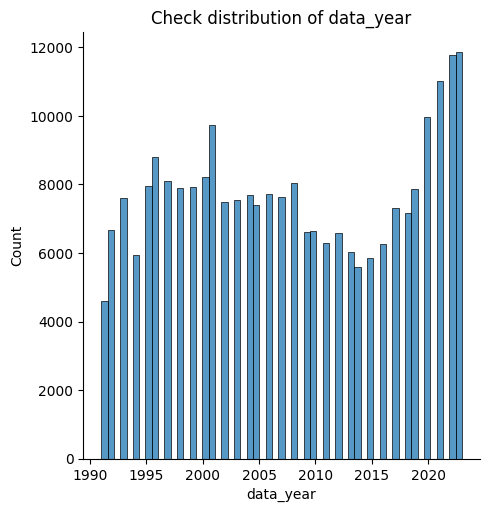

Likely skewed to the left: Modern years have higher chance for crime


In [17]:
# Check distribution 
plt.figure(figsize=(12,7))

sns.displot(df, x='data_year')

plt.title('Check distribution of data_year')
plt.show()

print('Likely skewed to the left: Modern years have higher chance for crime')

In [18]:
# Check skewness 
from scipy.stats import skew

skew_value = skew(df['data_year'])
print('-'*30)
print(f"Skewness of data_year: {round(skew_value, 4)}")
print('-'*30)
print('The skewness is being around 0.0244 which is very closed to zero')
print('This suggests that the distribution is highly normal')

------------------------------
Skewness of data_year: 0.0244
------------------------------
The skewness is being around 0.0244 which is very closed to zero
This suggests that the distribution is highly normal


In [19]:
df.columns

Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias'],
      dtype='object')

#### **Check ori and state**

In [20]:
df['ori'].dtype

dtype('O')

In [21]:
df['ori'].unique()

array(['AR0350100', 'AR0600300', 'AR0670000', ..., 'WV0440000',
       'WVWSP1100', 'WY0060300'], dtype=object)

In [22]:
df['ori'].isna().sum()

np.int64(0)

C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_34356\3816221670.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ori.index, y=top_ori.values, palette="viridis")


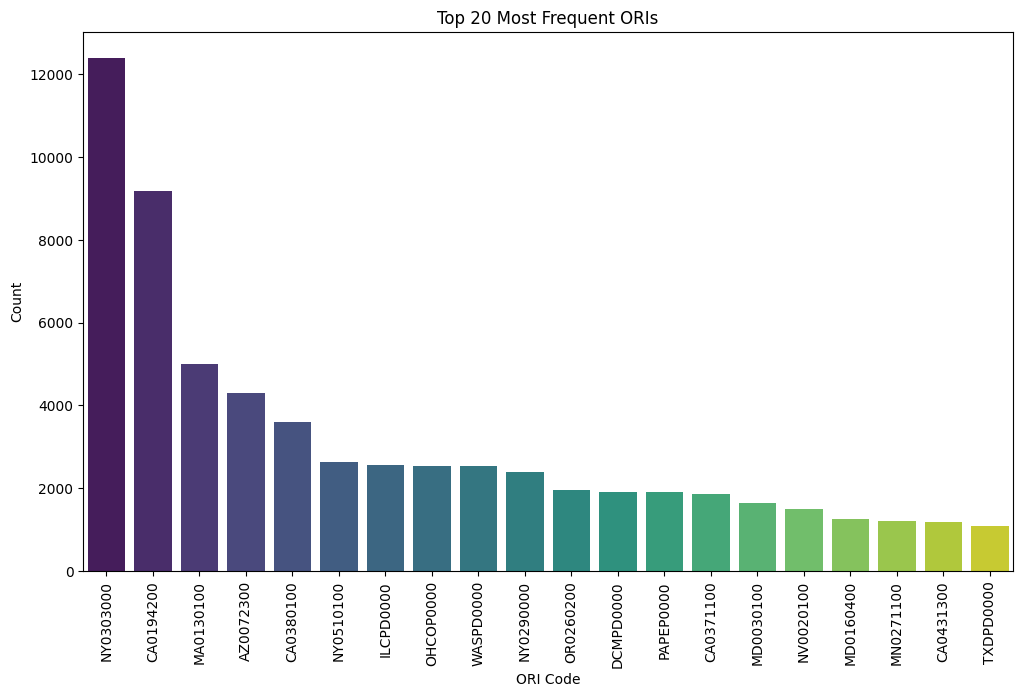

In [23]:
# Check distribution
# Count occurrences of each ORI
top_ori = df['ori'].value_counts().head(20)  # Get top 20 most common ORI

# Plot bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x=top_ori.index, y=top_ori.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("ORI Code")
plt.ylabel("Count")
plt.title("Top 20 Most Frequent ORIs")
plt.show()

C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_34356\3591222749.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette="magma")


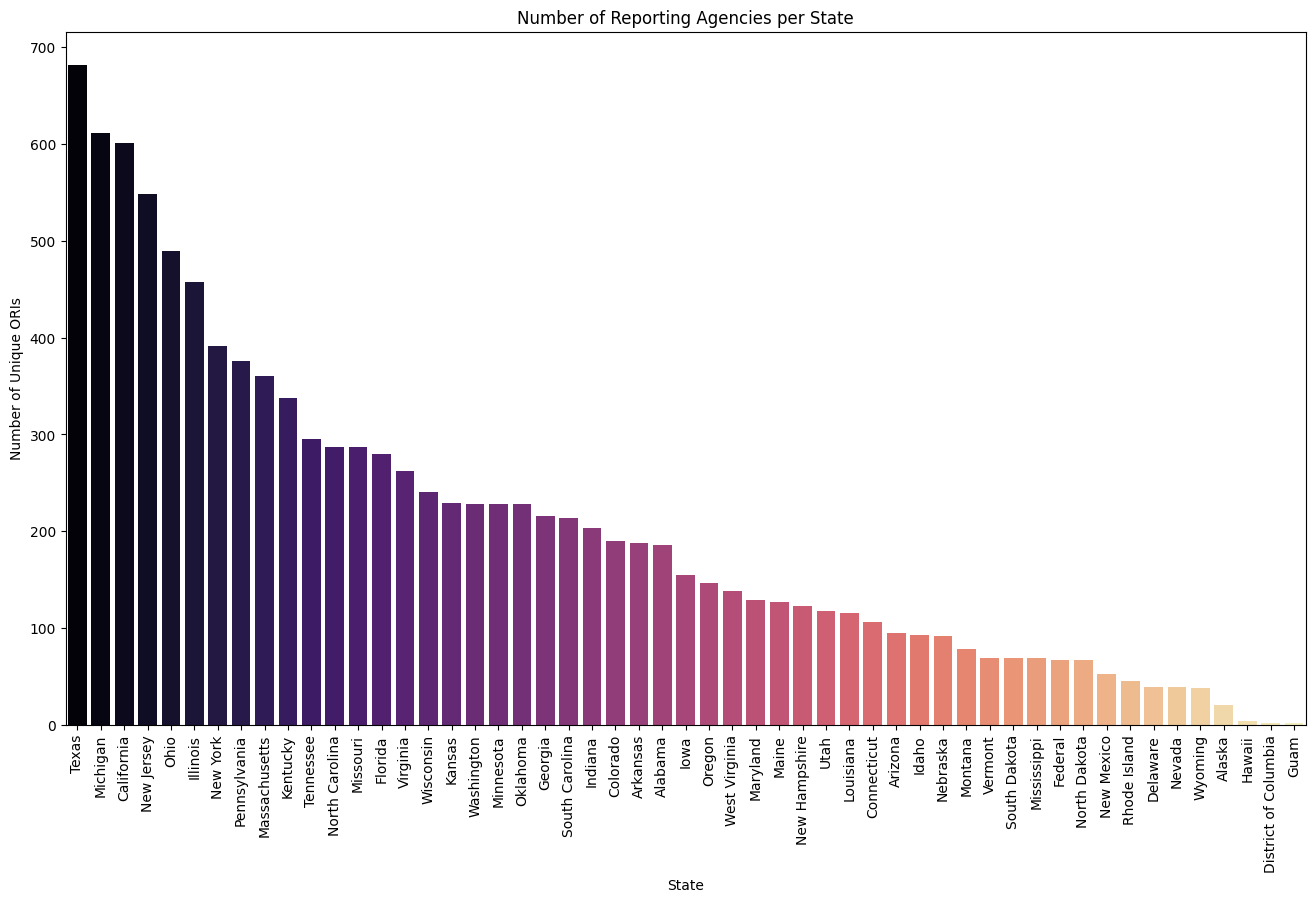

Larger states with more cities/towns tend to have more ORIs
States with more ORIs tend to have more granular crime reporting, but this does not mean they have the most crimes.


In [24]:
# Try grouping ori by state
state_counts = df.groupby("state_name")["ori"].nunique().sort_values(ascending=False)

plt.figure(figsize=(16, 9))
sns.barplot(x=state_counts.index, y=state_counts.values, palette="magma")
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Number of Unique ORIs")
plt.title("Number of Reporting Agencies per State")
plt.show() 

print('Larger states with more cities/towns tend to have more ORIs')
print('States with more ORIs tend to have more granular crime reporting, but this does not mean they have the most crimes.')

C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_34356\3665486666.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_crime_counts.index, y=state_crime_counts.values, palette="magma")


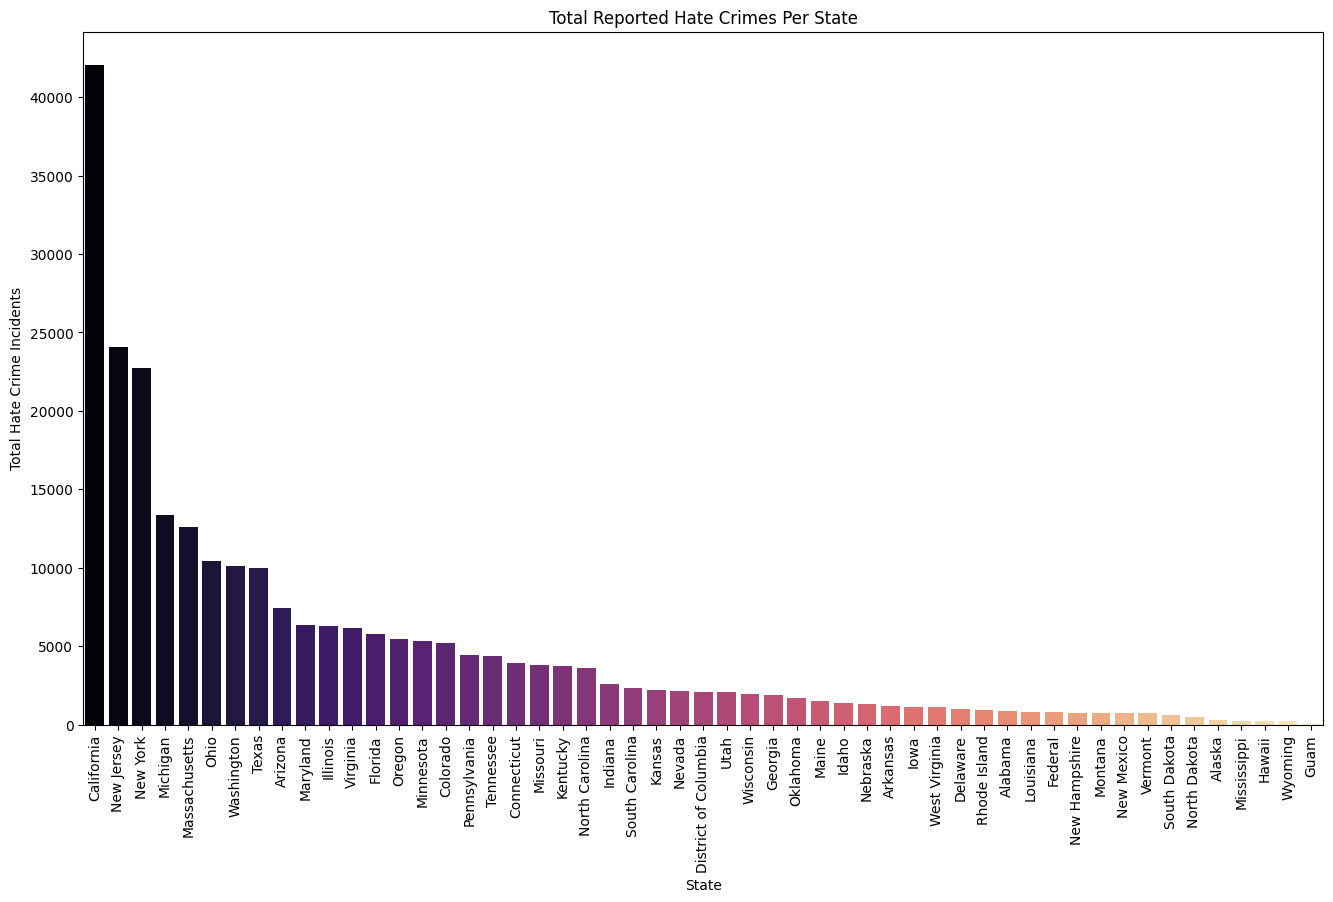

California has the most crime detected.
California is the most populous state in the U.S., so it might have more reported crimes overall.


In [25]:
# Check total hate crime per state grouped by total incident
state_crime_counts = df.groupby("state_name")["incident_id"].count().sort_values(ascending=False)

# Plot
plt.figure(figsize=(16, 9))
sns.barplot(x=state_crime_counts.index, y=state_crime_counts.values, palette="magma")
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Total Hate Crime Incidents")
plt.title("Total Reported Hate Crimes Per State")
plt.show()

print('California has the most crime detected.')
print('California is the most populous state in the U.S., so it might have more reported crimes overall.')

In [26]:
# Count crime types per state
crime_types = df.groupby(["state_name", "offense_name"])["incident_id"].count().reset_index()

# Get top crime types
top_crime_types = crime_types.sort_values(by="incident_id", ascending=False).groupby("state_name").head(1)


print('Most common hate crime type in California → "Destruction/Damage/Vandalism of Property" (12,598 cases!)')
print('Destruction/Vandalism is dominant in multiple states (California, New York, Maryland, Texas, Virginia, etc.).\n')
top_crime_types  # Show the most common hate crime type in each state

Most common hate crime type in California → "Destruction/Damage/Vandalism of Property" (12,598 cases!)
Destruction/Vandalism is dominant in multiple states (California, New York, Maryland, Texas, Virginia, etc.).



,state_name,offense_name,incident_id
239,California,Destruction/Damage/Vandalism of Property,12598
1772,New Jersey,Intimidation,12475
1856,New York,Destruction/Damage/Vandalism of Property,9690
1380,Michigan,Intimidation,4349
1267,Massachusetts,Intimidation,4192
1166,Maryland,Destruction/Damage/Vandalism of Property,3634
2098,Ohio,Intimidation,3619
2927,Washington,Intimidation,3466
2571,Texas,Destruction/Damage/Vandalism of Property,2508
2791,Virginia,Destruction/Damage/Vandalism of Property,2444


In [27]:
df.columns

Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias'],
      dtype='object')

#### **Check pug_agency_name**

In [28]:
df['pug_agency_name'].dtype

dtype('O')

In [29]:
df['pug_agency_name'].unique()

array(['Pine Bluff', 'North Little Rock', 'Sevier', ...,
       'Ohio Valley Drug and Violent Crime Task Force',
       'Berkeley Springs', 'Moorcroft'], dtype=object)

In [30]:
df['pug_agency_name'].isna().sum()

np.int64(0)

In [31]:
df['pug_agency_name'].head()

0           Pine Bluff
1           Pine Bluff
2    North Little Rock
3    North Little Rock
4               Sevier
Name: pug_agency_name, dtype: object

C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_34356\3350046672.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agency_counts.values, y=agency_counts.index, palette="viridis")


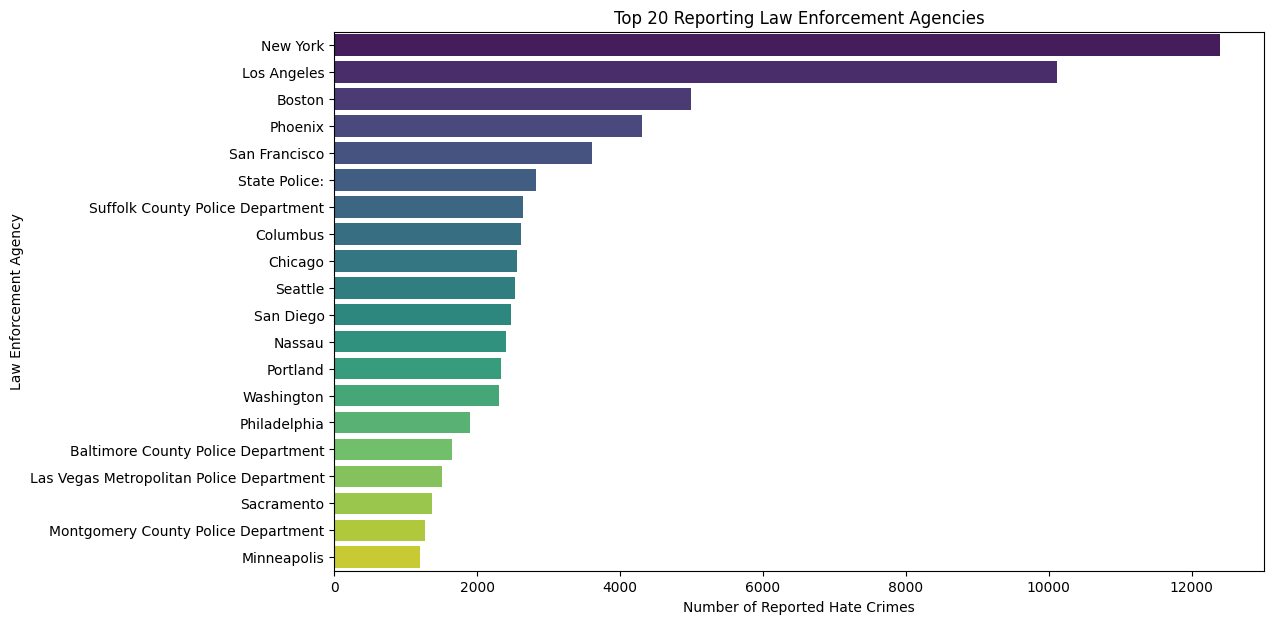

New York has the top number of reporting hate crime via law enforement agencies


In [32]:
# Check distribution
# Check the distribution of 'pug_agency_name' (Law Enforcement Agency Names)

# Count occurrences of each agency
agency_counts = df["pug_agency_name"].value_counts().head(20)  # Top 20 most common agencies

# Plot the distribution
plt.figure(figsize=(12, 7))
sns.barplot(x=agency_counts.values, y=agency_counts.index, palette="viridis")
plt.xlabel("Number of Reported Hate Crimes")
plt.ylabel("Law Enforcement Agency")
plt.title("Top 20 Reporting Law Enforcement Agencies")
plt.show()

print('New York has the top number of reporting hate crime via law enforement agencies')

In [33]:
df.columns

Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias'],
      dtype='object')

#### **Check pub_agency_unit**

In [34]:
df['pub_agency_unit'].dtype

dtype('O')

In [35]:
df['pub_agency_unit'].unique()

array([nan, 'Boulder', 'Urbana', 'Montgomery County', 'College Park',
       'Anne Arundel County', 'Carroll County', 'Cecil County',
       'Charles County', 'Frederick County', 'Harford County',
       "Queen Anne's County", 'Wicomico County', 'Worcester County',
       'Baltimore County', "Prince George's County", 'Twin Cities',
       'Albany', 'Binghamton', 'Cortland', 'Buffalo State College',
       'Morrisville', 'Old Westbury', 'Oswego', 'Potsdam', 'Stony Brook',
       'New Paltz', 'Purchase', 'Dutchess County', 'Orange County',
       'Oswego County', 'Sullivan County', 'Ulster County',
       'Wayne County', 'Delhi', 'Geneseo', 'Polytechnic Institute',
       'Columbus', 'Crook County', 'Curry County', 'Jackson County',
       'Lincoln County', 'Linn County', 'Marion County', 'Chester County',
       'Lancaster County', 'Monroe County', 'Washington County',
       'Westmoreland County', 'Blair County', 'Smyth County',
       'Wythe County', 'Milwaukee', 'East Bay', 'Fullerto

In [36]:
agency_unit_counts = df["pub_agency_unit"].value_counts().head(20)  # Top 20 most common agency units
agency_unit_counts

pub_agency_unit
Ann Arbor            159
New Castle County    139
Los Angeles          132
College Park         125
All Campuses         118
Columbus             114
Amherst              114
University Park      102
Montgomery County    102
Stony Brook          101
Bloomington          100
Sussex County         93
Twin Cities           90
Kent County           87
New Brunswick         85
Carroll County        85
Berkeley              80
Buffalo               80
Austin                76
Cumberland County     71
Name: count, dtype: int64

C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_34356\1034682908.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agency_unit_counts.values, y=agency_unit_counts.index, palette="magma")


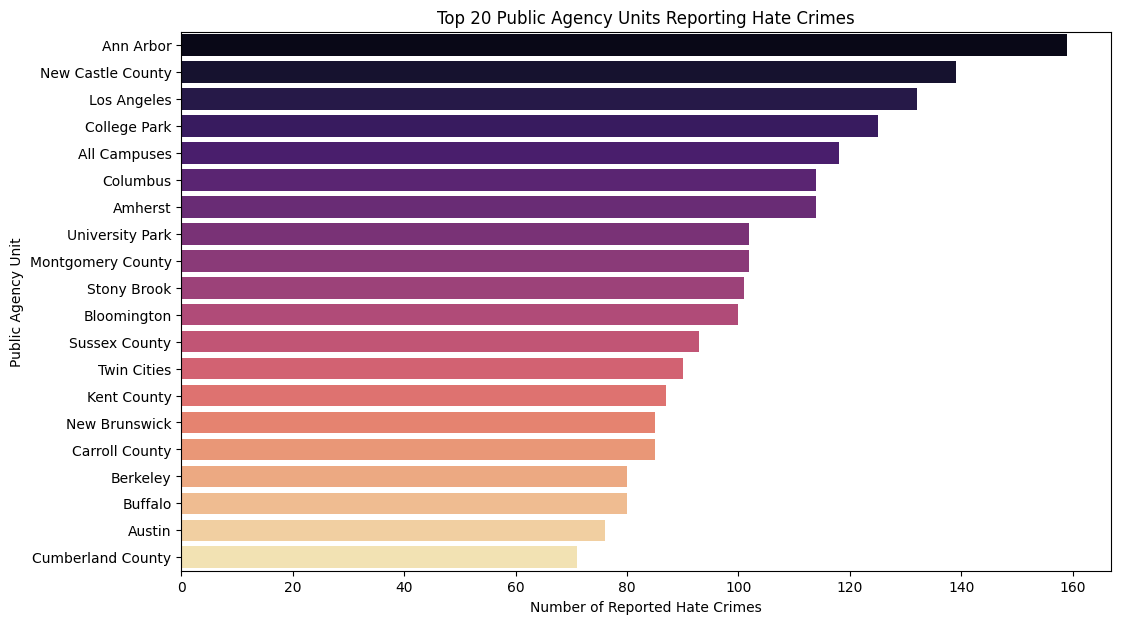

Top reporting public agencies include:
1. Ann Arbor (highest reported hate crimes!) → Diverse Student Population → Higher diversity sometimes leads to more reported bias-motivated incidents.  Strong Local Policies → Ann Arbor is known for progressive policies and a well-documented crime reporting system.
2. New Castle County & Los Angeles → Large urban areas with higher reported incidents.
3. College Towns (e.g., College Park, University Park, Stony Brook, Bloomington) → Many universities are in this list, meaning hate crimes in academic settings might be a significant factor.
4. Counties & Urban Centers → Many counties like Montgomery, Carroll, Kent, and Sussex also appear, showing that hate crimes are not just in major cities.


In [37]:
# Check distribution
plt.figure(figsize=(12, 7))
sns.barplot(x=agency_unit_counts.values, y=agency_unit_counts.index, palette="magma")
plt.xlabel("Number of Reported Hate Crimes")
plt.ylabel("Public Agency Unit")
plt.title("Top 20 Public Agency Units Reporting Hate Crimes")
plt.show()

print('Top reporting public agencies include:\n1. Ann Arbor (highest reported hate crimes!) → Diverse Student Population → Higher diversity sometimes leads to more reported bias-motivated incidents.  Strong Local Policies → Ann Arbor is known for progressive policies and a well-documented crime reporting system.\n2. New Castle County & Los Angeles → Large urban areas with higher reported incidents.\n3. College Towns (e.g., College Park, University Park, Stony Brook, Bloomington) → Many universities are in this list, meaning hate crimes in academic settings might be a significant factor.\n4. Counties & Urban Centers → Many counties like Montgomery, Carroll, Kent, and Sussex also appear, showing that hate crimes are not just in major cities.')

##### **Count the most common crime types reported by agencies unit**

In [38]:
# Get top 20 public agency units
top_agency_units = df["pub_agency_unit"].value_counts().head(20).index

# Filter dataset to include only these top agencies
filtered_df = df[df["pub_agency_unit"].isin(top_agency_units)]

# Count the most common crime types reported by these agencies
crime_by_agency = filtered_df.groupby(["pub_agency_unit", "offense_name"])["incident_id"].count().reset_index()

# Get top crime types for each agency
top_crime_per_agency = crime_by_agency.sort_values(by="incident_id", ascending=False).groupby("pub_agency_unit").head(1)

# Display the result
top_crime_per_agency

,pub_agency_unit,offense_name,incident_id
17,Ann Arbor,Destruction/Damage/Vandalism of Property,96
63,College Park,Destruction/Damage/Vandalism of Property,90
117,Montgomery County,Destruction/Damage/Vandalism of Property,90
11,Amherst,Destruction/Damage/Vandalism of Property,89
1,All Campuses,Destruction/Damage/Vandalism of Property,68
147,Stony Brook,Intimidation,65
48,Buffalo,Destruction/Damage/Vandalism of Property,62
53,Carroll County,Destruction/Damage/Vandalism of Property,62
159,Twin Cities,Destruction/Damage/Vandalism of Property,62
125,New Brunswick,Intimidation,53


##### **Count the top bias moltivation reported by agencies unit**

In [39]:
# Count bias motivations (e.g., race, religion, LGBTQ+) per agency
bias_by_agency = filtered_df.groupby(["pub_agency_unit", "bias_desc"])["incident_id"].count().reset_index()

# Get top bias motivation for each agency
top_bias_per_agency = bias_by_agency.sort_values(by="incident_id", ascending=False).groupby("pub_agency_unit").head(1)

# Display the result
print('Most of bias moltivations are racist like Anti-Black and Anti-Jewish')
top_bias_per_agency

Most of bias moltivations are racist like Anti-Black and Anti-Jewish


,pub_agency_unit,bias_desc,incident_id
201,New Castle County,Anti-Black or African American,75
32,Ann Arbor,Anti-Black or African American,56
227,Sussex County,Anti-Black or African American,52
150,Kent County,Anti-Black or African American,51
178,Montgomery County,Anti-Black or African American,51
257,University Park,Anti-Black or African American,47
96,Carroll County,Anti-Black or African American,44
139,Cumberland County,Anti-Black or African American,41
216,Stony Brook,Anti-Black or African American,37
16,Amherst,Anti-Black or African American,36


In [40]:
df.columns

Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias'],
      dtype='object')

#### **Check agency_type_name**

In [41]:
df['agency_type_name'].dtype

dtype('O')

In [42]:
df['agency_type_name'].value_counts()

agency_type_name
City                     202135
County                    36551
University or College      8456
State Police               3421
Other                      1759
Federal                     823
Other State Agency          504
Tribal                      127
Name: count, dtype: int64

In [43]:
df['agency_type_name'].unique()

array(['City', 'County', 'Other State Agency', 'University or College',
       'State Police', 'Other', 'Tribal', 'Federal'], dtype=object)

C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_34356\1508835289.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agency_type_counts.values, y=agency_type_counts.index, palette="plasma")


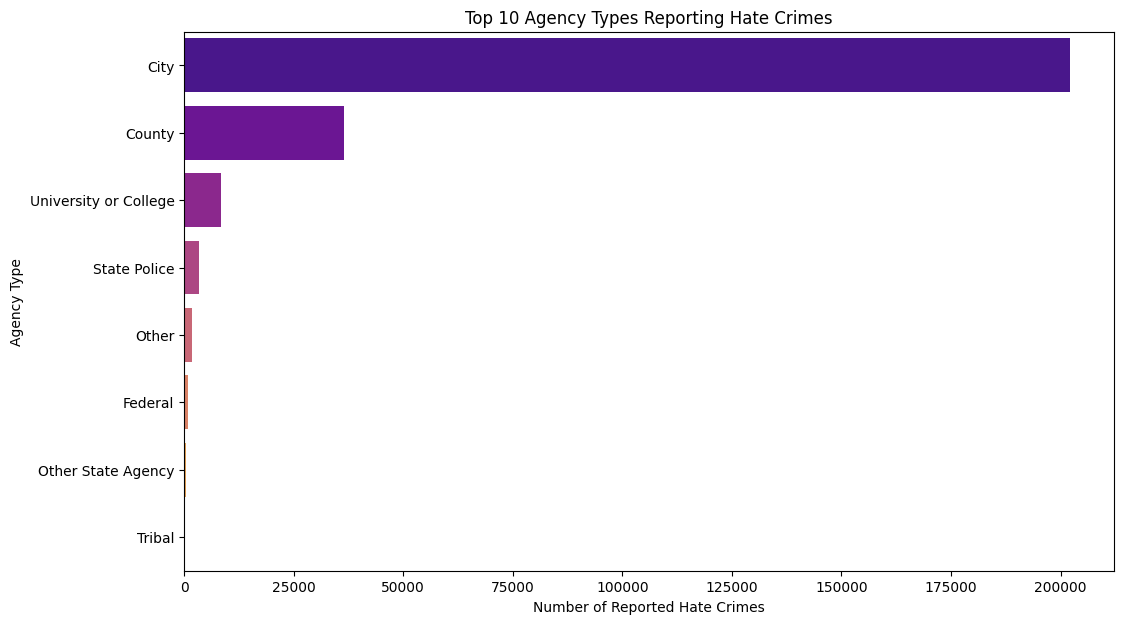

City Police Departments report the most hate crimes → Likely because cities have higher population density & more incidents.


In [44]:
# Count occurrences of each agency type
agency_type_counts = df["agency_type_name"].value_counts().head(10)  # Top 10 agency types

# Check distribution
plt.figure(figsize=(12, 7))

sns.barplot(x=agency_type_counts.values, y=agency_type_counts.index, palette="plasma")
plt.xlabel("Number of Reported Hate Crimes")
plt.ylabel("Agency Type")
plt.title("Top 10 Agency Types Reporting Hate Crimes")

plt.show()
print('City Police Departments report the most hate crimes → Likely because cities have higher population density & more incidents.')

In [45]:
# Compare Hate Crime Types Across Different Agency Types

# Count most common crime types for each agency type
crime_by_agency_type = df.groupby(["agency_type_name", "offense_name"])["incident_id"].count().reset_index()

# Get top crime type per agency type
top_crime_per_agency_type = crime_by_agency_type.sort_values(by="incident_id", ascending=False).groupby("agency_type_name").head(1)

# Display the result
top_crime_per_agency_type

,agency_type_name,offense_name,incident_id
277,City,Intimidation,61115
464,County,Destruction/Damage/Vandalism of Property,12539
795,University or College,Destruction/Damage/Vandalism of Property,4289
709,State Police,Destruction/Damage/Vandalism of Property,966
611,Other,Destruction/Damage/Vandalism of Property,659
585,Federal,Intimidation,330
651,Other State Agency,Destruction/Damage/Vandalism of Property,230
765,Tribal,Intimidation,33


In [46]:
# Most Common Bias Motivations (Race, Religion, LGBTQ) per Agency Type

# Count bias motivations for each agency type
bias_by_agency_type = df.groupby(["agency_type_name", "bias_desc"])["incident_id"].count().reset_index()

# Get top bias motivation per agency type
top_bias_per_agency_type = bias_by_agency_type.sort_values(by="incident_id", ascending=False).groupby("agency_type_name").head(1)

# Display the result
top_bias_per_agency_type

,agency_type_name,bias_desc,incident_id
94,City,Anti-Black or African American,66193
391,County,Anti-Black or African American,13245
721,University or College,Anti-Black or African American,2734
639,State Police,Anti-Black or African American,1375
551,Other,Anti-Black or African American,527
497,Federal,Anti-Black or African American,266
597,Other State Agency,Anti-Black or African American,171
688,Tribal,Anti-American Indian or Alaska Native,34


In [47]:
# Check if Certain Agencies Report Disproportionately High or Low Crimes

# Count total hate crimes per agency type
agency_type_totals = df.groupby("agency_type_name")["incident_id"].count().reset_index()

# Rename the column 'incident_id' to 'incident_id_count'
agency_type_totals = agency_type_totals.rename(columns={"incident_id": "incident_id_count"})

# Normalize by percentage to see distribution
agency_type_totals["percentage"] = (agency_type_totals["incident_id_count"] / agency_type_totals["incident_id_count"].sum()) * 100

# Display the result
agency_type_totals

,agency_type_name,incident_id_count,percentage
0,City,202135,79.650952
1,County,36551,14.402859
2,Federal,823,0.324302
3,Other,1759,0.693131
4,Other State Agency,504,0.198600
5,State Police,3421,1.348039
6,Tribal,127,0.050044
7,University or College,8456,3.332072


In [48]:
df.columns

Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias'],
      dtype='object')

#### **Check state abbr**

In [49]:
df['state_abbr'].dtype

dtype('O')

In [50]:
df['state_abbr'].unique()

array(['AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'GA', 'IA', 'ID', 'IL',
       'KS', 'MA', 'MD', 'MN', 'MO', 'MS', 'NJ', 'NV', 'NY', 'OH', 'OK',
       'OR', 'PA', 'TN', 'TX', 'VA', 'WA', 'WI', 'AL', 'FL', 'IN', 'KY',
       'LA', 'ME', 'MI', 'NC', 'ND', 'RI', 'SC', 'UT', 'WY', 'AK', 'MT',
       'NM', 'SD', 'VT', 'NH', 'NB', 'WV', 'GM', 'FS', 'HI'], dtype=object)

In [51]:
df['state_abbr'].isna().sum()

np.int64(0)

C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_34356\2006769020.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_abbr_counts.index, y=state_abbr_counts.values, palette="coolwarm")


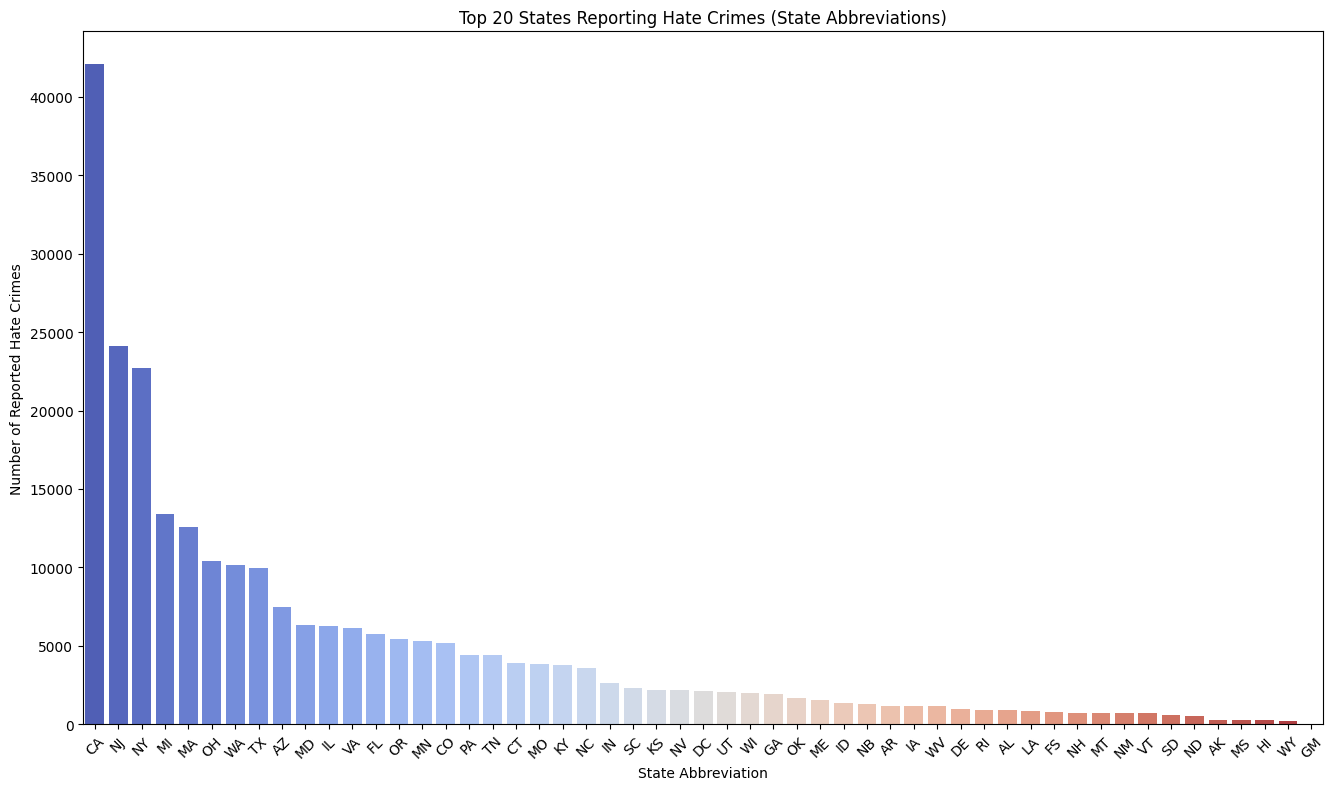

This is the same result as total reported hate crime per state that we plotted before due to being abbreviation word from the actual state


In [52]:
# Check distribution
# Count occurrences of each state abbreviation
state_abbr_counts = df["state_abbr"].value_counts()  # Top 20 states by reported hate crimes

# Plot the distribution of state abbreviations reporting hate crimes
plt.figure(figsize=(16, 9))

sns.barplot(x=state_abbr_counts.index, y=state_abbr_counts.values, palette="coolwarm")
plt.xlabel("State Abbreviation")
plt.ylabel("Number of Reported Hate Crimes")
plt.title("Top 20 States Reporting Hate Crimes (State Abbreviations)")
plt.xticks(rotation=45)

plt.show()
print('This is the same result as total reported hate crime per state that we plotted before due to being abbreviation word from the actual state')

In [53]:
df.columns

Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias'],
      dtype='object')

#### **Check division_name**

In [54]:
df['division_name'].dtype

dtype('O')

In [55]:
df['division_name'].value_counts()

division_name
Pacific               58182
Middle Atlantic       51258
East North Central    34687
South Atlantic        30389
New England           20460
Mountain              19985
West North Central    14959
West South Central    13682
East South Central     9329
Other                   820
U.S. Territories         25
Name: count, dtype: int64

In [56]:
df['division_name'].isna().sum()

np.int64(0)

C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_34356\3886282386.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=division_counts.values, y=division_counts.index, palette="coolwarm")


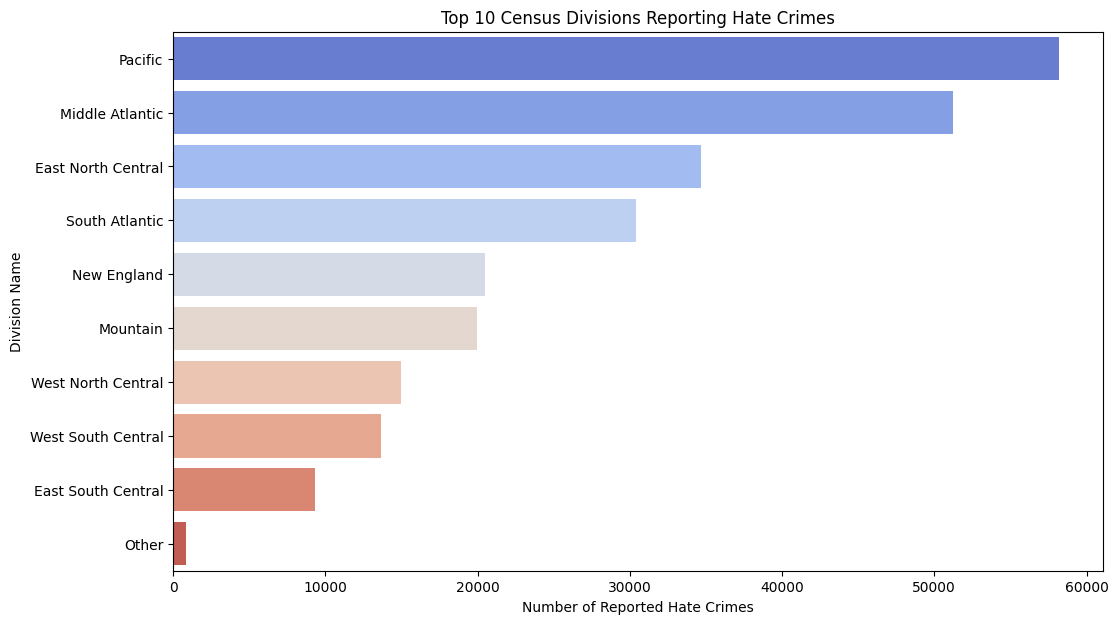

Pacific Division reports the most hate crimes → Likely due to California, which had the highest state-level reports.
Note: California is in the Pacific census division, the geographical regions defined by the U.S. just like Central Region and Northeastern Region in Thailand


In [57]:
# Check distribution
# Count occurrences of each division name
division_counts = df["division_name"].value_counts().head(10)  # Top 10 divisions by reported hate crimes

# Plot the distribution of hate crimes per division
plt.figure(figsize=(12, 7))

sns.barplot(x=division_counts.values, y=division_counts.index, palette="coolwarm")
plt.xlabel("Number of Reported Hate Crimes")
plt.ylabel("Division Name")
plt.title("Top 10 Census Divisions Reporting Hate Crimes")

plt.show()
print('Pacific Division reports the most hate crimes → Likely due to California, which had the highest state-level reports.')
print('Note: California is in the Pacific census division, the geographical regions defined by the U.S. just like Central Region and Northeastern Region in Thailand')

In [58]:
# Compare Most Common Hate Crime Types in Each Division

# Count most common crime types for each division
crime_by_division = df.groupby(["division_name", "offense_name"])["incident_id"].count().reset_index()

# Get top crime type per division
top_crime_per_division = crime_by_division.sort_values(by="incident_id", ascending=False).groupby("division_name").head(1)

# Display the result
top_crime_per_division

,division_name,offense_name,incident_id
391,Middle Atlantic,Intimidation,20143
845,Pacific,Destruction/Damage/Vandalism of Property,16561
1023,South Atlantic,Destruction/Damage/Vandalism of Property,10691
127,East North Central,Intimidation,10531
680,New England,Intimidation,6793
539,Mountain,Intimidation,5112
1209,West North Central,Intimidation,4091
1305,West South Central,Destruction/Damage/Vandalism of Property,3230
285,East South Central,Intimidation,2423
745,Other,Intimidation,329


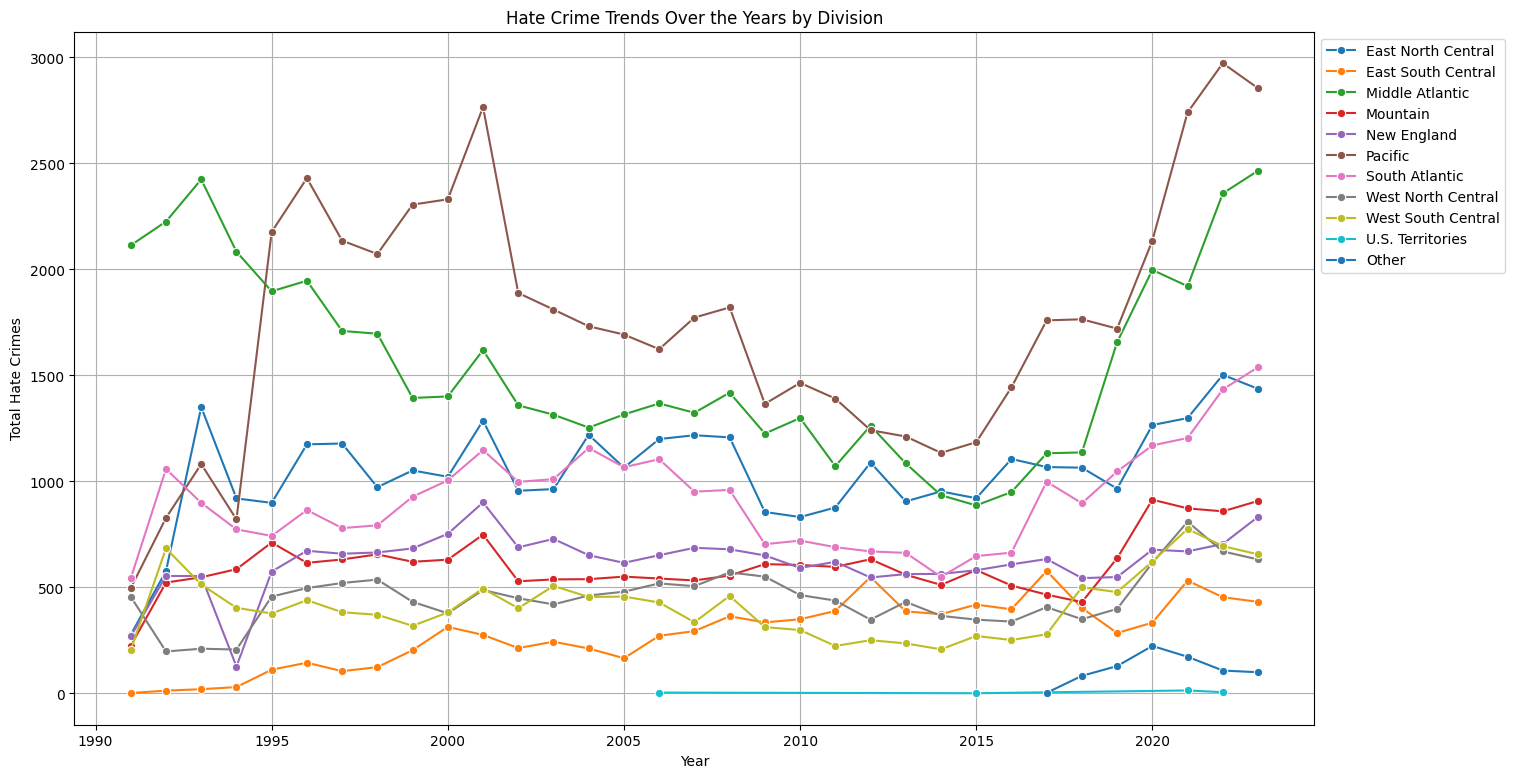

Pacific & Middle Atlantic divisions show consistently higher hate crime reports.
Sharp increases post-2015, suggesting changes in social dynamics or improved reporting.


In [59]:
# Trends Over Time: Hate Crime Changes in Each Division

# Aggregate crime trends per division over years
crime_trend_by_division = df.groupby(["data_year", "division_name"])["incident_id"].count().reset_index()

# Plot trends over time
plt.figure(figsize=(16, 9))

sns.lineplot(data=crime_trend_by_division, x="data_year", y="incident_id", hue="division_name", marker="o", palette="tab10")
plt.xlabel("Year")
plt.ylabel("Total Hate Crimes")
plt.title("Hate Crime Trends Over the Years by Division")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()

print('Pacific & Middle Atlantic divisions show consistently higher hate crime reports.')
print('Sharp increases post-2015, suggesting changes in social dynamics or improved reporting.')

In [60]:
df.columns

Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias'],
      dtype='object')

#### **Check region_name**

In [61]:
df['region_name'].dtype

dtype('O')

In [62]:
df['region_name'].value_counts()

region_name
West                78167
Northeast           71718
South               53400
Midwest             49646
Other                 820
U.S. Territories       25
Name: count, dtype: int64

In [63]:
df['region_name'].isna().sum()

np.int64(0)

C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_34356\966949114.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.values, y=region_counts.index, palette="coolwarm")


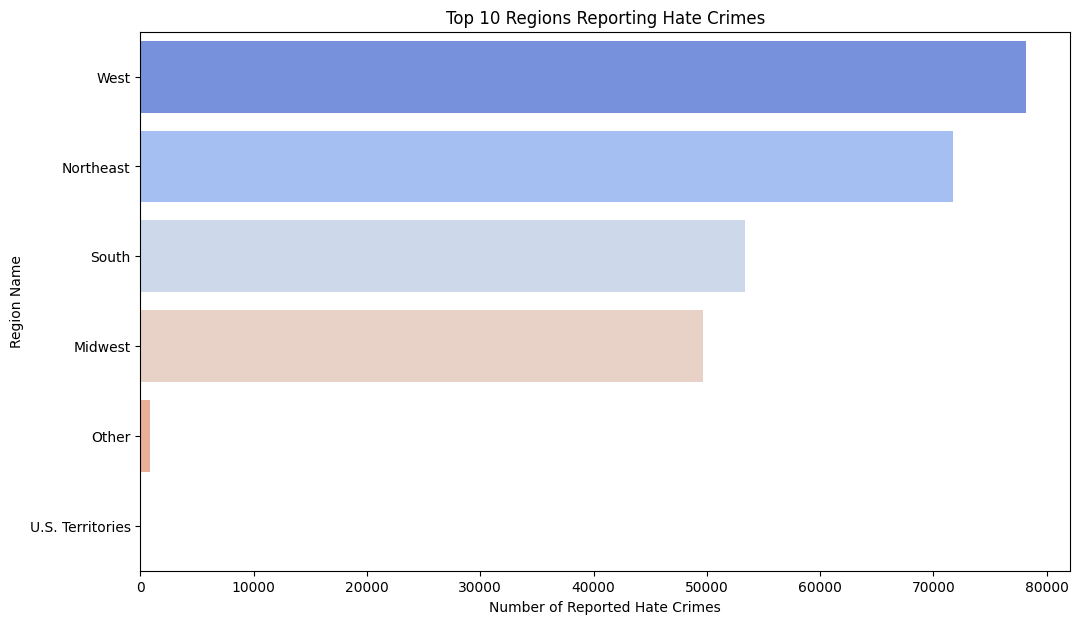

The West reports the most hate crimes → Likely driven by California’s high reporting numbers.
The Northeast follows closely → Includes states like New York and New Jersey, which have strict reporting requirements.


In [64]:
# Check distribution
# Count occurrences of each region name
region_counts = df["region_name"].value_counts().head(10)  # Top 10 regions by reported hate crimes

# Plot the distribution of hate crimes per region
plt.figure(figsize=(12, 7))

sns.barplot(x=region_counts.values, y=region_counts.index, palette="coolwarm")
plt.xlabel("Number of Reported Hate Crimes")
plt.ylabel("Region Name")
plt.title("Top 10 Regions Reporting Hate Crimes")

plt.show()
print('The West reports the most hate crimes → Likely driven by California’s high reporting numbers.')
print('The Northeast follows closely → Includes states like New York and New Jersey, which have strict reporting requirements.')

In [65]:
# Most Common Bias Motivations (Race, Religion, LGBTQ) in Each Region

# Count bias motivations per region
bias_by_region = df.groupby(["region_name", "bias_desc"])["incident_id"].count().reset_index()

# Get top bias motivation per region
top_bias_per_region = bias_by_region.sort_values(by="incident_id", ascending=False).groupby("region_name").head(1)

# Display the result
top_bias_per_region

,region_name,bias_desc,incident_id
663,West,Anti-Black or African American,23727
183,Northeast,Anti-Black or African American,22418
497,South,Anti-Black or African American,19471
21,Midwest,Anti-Black or African American,18648
419,Other,Anti-Black or African American,266
617,U.S. Territories,Anti-White,8


In [66]:
df.columns

Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias'],
      dtype='object')

#### **Check population_group_code and population_group_description**

In [67]:
df['population_group_code'].dtype

dtype('O')

In [68]:
df['population_group_code'].unique()

array(['3', '8D', '5', '6', '2', '1B', '1C', '9B', '4', '9A', '7', '8C',
       '1A', '9D', '9C', '8B', '8A', '8E', '9E', '0', nan], dtype=object)

In [69]:
df['population_group_code'].isna().sum()

np.int64(667)

In [70]:
df['population_group_description'].dtype

dtype('O')

In [71]:
df['population_group_description'].unique()

array(['Cities from 50,000 thru 99,999', 'Non-MSA counties under 10,000',
       'Cities from 10,000 thru 24,999', 'Cities from 2,500 thru 9,999',
       'Cities from 100,000 thru 249,999',
       'Cities from 500,000 thru 999,999',
       'Cities from 250,000 thru 499,999',
       'MSA counties from 25,000 thru 99,999',
       'Cities from 25,000 thru 49,999', 'MSA counties 100,000 or over',
       'Cities under 2,500', 'Non-MSA counties from 10,000 thru 24,999',
       'Cities 1,000,000 or over', 'MSA counties under 10,000',
       'MSA counties from 10,000 thru 24,999',
       'Non-MSA counties from 25,000 thru 99,999',
       'Non-MSA counties 100,000 or over', 'Non-MSA State Police',
       'MSA State Police',
       'Possessions (Puerto Rico, Guam, Virgin Islands, and American Samoa)',
       nan], dtype=object)

In [72]:
df['population_group_description'].isna().sum()

np.int64(667)

In [73]:
# Count occurrences of each population group (Code + Description)

# Count hate crimes per population group
population_group_counts = df.groupby(["population_group_code", "population_group_description"])["incident_id"].count().reset_index()

# Sort by highest reported hate crimes
population_group_counts = population_group_counts.sort_values(by="incident_id", ascending=False)

# Display the result
print('Biggest cities (1,000,000+ population) report the most hate crimes (36,210 cases).\n  - Large urban centers like New York, Los Angeles, and Chicago drive these numbers.\n  - More people = more reported incidents & better reporting infrastructure.\n')
population_group_counts

Biggest cities (1,000,000+ population) report the most hate crimes (36,210 cases).
  - Large urban centers like New York, Los Angeles, and Chicago drive these numbers.
  - More people = more reported incidents & better reporting infrastructure.



,population_group_code,population_group_description,incident_id
1,1A,"Cities 1,000,000 or over",36210
5,3,"Cities from 50,000 thru 99,999",28356
6,4,"Cities from 25,000 thru 49,999",28156
2,1B,"Cities from 500,000 thru 999,999",24915
7,5,"Cities from 10,000 thru 24,999",24756
4,2,"Cities from 100,000 thru 249,999",24338
15,9A,"MSA counties 100,000 or over",23190
3,1C,"Cities from 250,000 thru 499,999",17275
8,6,"Cities from 2,500 thru 9,999",15245
9,7,"Cities under 2,500",13438


In [74]:
# Compare Most Common Hate Crime Types in Different Population Groups

# Count most common crime types for each population group
crime_by_population_group = df.groupby(["population_group_description", "offense_name"])["incident_id"].count().reset_index()

# Get top crime type per population group
top_crime_per_population_group = crime_by_population_group.sort_values(by="incident_id", ascending=False).groupby("population_group_description").head(1)

# Display the result
print('Vandalism (Destruction/Damage of Property) is the most common hate crime in large cities (1M+ people).\n  - Biggest cities (New York, LA, Chicago) see more property-related hate crimes than violent offenses.\n  - Higher population density + diverse communities might lead to more bias-related vandalism (graffiti, destruction, etc.).\n')
top_crime_per_population_group

Vandalism (Destruction/Damage of Property) is the most common hate crime in large cities (1M+ people).
  - Biggest cities (New York, LA, Chicago) see more property-related hate crimes than violent offenses.
  - Higher population density + diverse communities might lead to more bias-related vandalism (graffiti, destruction, etc.).



,population_group_description,offense_name,incident_id
44,"Cities 1,000,000 or over",Destruction/Damage/Vandalism of Property,11245
1287,"MSA counties 100,000 or over",Destruction/Damage/Vandalism of Property,9597
654,"Cities from 25,000 thru 49,999",Intimidation,9458
935,"Cities from 50,000 thru 99,999",Intimidation,9003
200,"Cities from 10,000 thru 24,999",Intimidation,8552
1078,"Cities from 500,000 thru 999,999",Intimidation,8087
359,"Cities from 100,000 thru 249,999",Intimidation,6774
1166,"Cities under 2,500",Destruction/Damage/Vandalism of Property,5755
780,"Cities from 250,000 thru 499,999",Intimidation,4913
505,"Cities from 2,500 thru 9,999",Intimidation,4706


In [75]:
df.columns

Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias'],
      dtype='object')

In [76]:
# Categorize Hate Crimes into Violent vs. Non-Violent Categories

# Define violent and non-violent crime categories
violent_crimes = ["Aggravated Assault", "Simple Assault", "Murder", "Rape", "Robbery"]
non_violent_crimes = ["Destruction/Damage/Vandalism of Property", "Intimidation", "Theft", "Trespassing"]

# Create a new column classifying each offense as violent or non-violent
df["crime_type"] = df["offense_name"].apply(lambda x: "Violent" if x in violent_crimes else "Non-Violent" if x in non_violent_crimes else "Other")

# Count violent vs. non-violent hate crimes by population group
crime_type_by_population = df.groupby(["population_group_description", "crime_type"])["incident_id"].count().reset_index()

# Pivot for visualization
crime_type_pivot = crime_type_by_population.pivot(index="population_group_description", columns="crime_type", values="incident_id").fillna(0)

# Display the result
print('Non-Violent Crimes (Vandalism, Intimidation) are the most common across all city sizes.\n')
crime_type_pivot

Non-Violent Crimes (Vandalism, Intimidation) are the most common across all city sizes.



crime_type,Non-Violent,Other,Violent
population_group_description,,,
"Cities 1,000,000 or over",20066,1547,14597
"Cities from 10,000 thru 24,999",16074,2732,5950
"Cities from 100,000 thru 249,999",13408,2468,8462
"Cities from 2,500 thru 9,999",8957,2219,4069
"Cities from 25,000 thru 49,999",18234,2653,7269
"Cities from 250,000 thru 499,999",8882,1484,6909
"Cities from 50,000 thru 99,999",17468,2645,8243
"Cities from 500,000 thru 999,999",12967,1744,10204
"Cities under 2,500",9564,1274,2600


In [77]:
# Break Down Specific Violent Crime Types by Population Group

# Filter only violent crimes
violent_crime_types = df[df["crime_type"] == "Violent"]

# Count occurrences of each violent crime type per population group
violent_crime_by_population = violent_crime_types.groupby(["population_group_description", "offense_name"])["incident_id"].count().reset_index()

# Get top violent crime per population group
top_violent_crime_per_population = violent_crime_by_population.sort_values(by="incident_id", ascending=False).groupby("population_group_description").head(1)

# Display the result
print('"Simple Assault" is the most common violent hate crime across all city sizes.')
print('  - Largest cities (1M+ people) report the most Simple Assault cases (8,443).')
print('Violent hate crimes occur in all city sizes, not just big cities.')
print('  - Cities from 25K-49K still report 4,716 incidents of Simple Assault.')
top_violent_crime_per_population

"Simple Assault" is the most common violent hate crime across all city sizes.
  - Largest cities (1M+ people) report the most Simple Assault cases (8,443).
Violent hate crimes occur in all city sizes, not just big cities.
  - Cities from 25K-49K still report 4,716 incidents of Simple Assault.


,population_group_description,offense_name,incident_id
3,"Cities 1,000,000 or over",Simple Assault,8443
31,"Cities from 500,000 thru 999,999",Simple Assault,5931
27,"Cities from 50,000 thru 99,999",Simple Assault,5118
11,"Cities from 100,000 thru 249,999",Simple Assault,4902
19,"Cities from 25,000 thru 49,999",Simple Assault,4716
7,"Cities from 10,000 thru 24,999",Simple Assault,3917
23,"Cities from 250,000 thru 499,999",Simple Assault,3863
41,"MSA counties 100,000 or over",Simple Assault,3851
15,"Cities from 2,500 thru 9,999",Simple Assault,2749
35,"Cities under 2,500",Simple Assault,1886


In [78]:
df.columns

Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias', 'crime_type'],
      dtype='object')

#### **Check incident_date**

In [79]:
df['incident_date'].dtype

dtype('O')

In [80]:
df['incident_date'].unique()

array(['1991-07-04', '1991-12-24', '1991-07-10', ..., '2023-06-30',
       '2023-04-09', '2023-04-17'], dtype=object)

In [81]:
df['incident_date'].isna().sum()

np.int64(0)

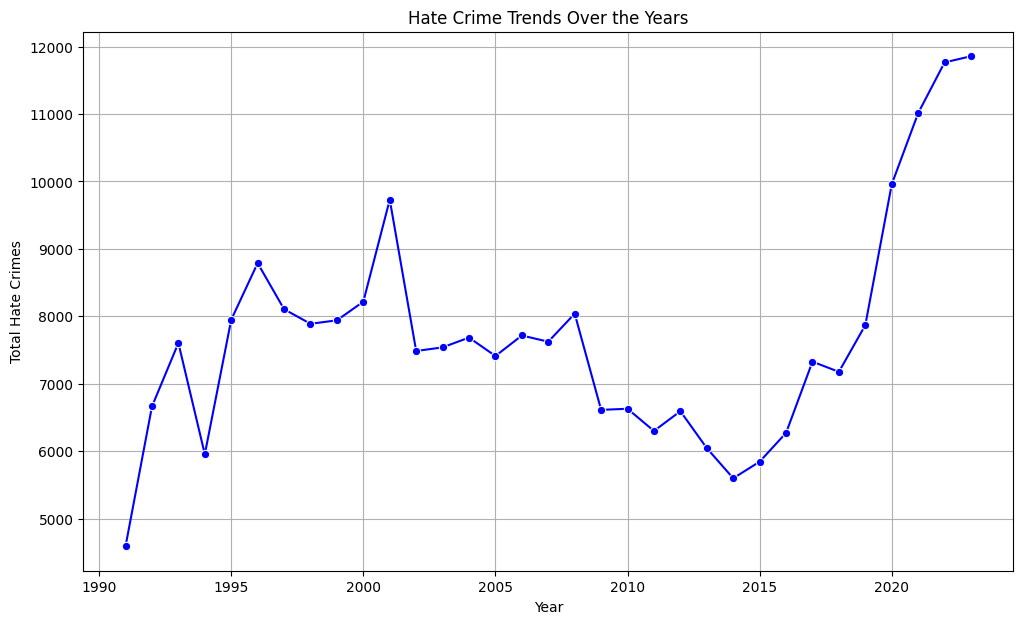

Sharp rise in the early 1990s
  - Hate crime reports spiked quickly between 1991-1993.

Post-2015 resurgence of hate crimes
  - A sharp increase from 2016-2020, reaching new highs.
  - This could be influenced by political climate, social unrest, or more active reporting.


In [82]:
# Check distribution
# Convert 'incident_date' to datetime format before extracting year
df["incident_date"] = pd.to_datetime(df["incident_date"])

# Extract year from the incident_date column
df["year"] = df["incident_date"].dt.year

# Count total hate crimes per year
yearly_trends = df.groupby("year")["incident_id"].count().reset_index()

# Plot trends over years
plt.figure(figsize=(12, 7))

sns.lineplot(data=yearly_trends, x="year", y="incident_id", marker="o", color="blue")
plt.xlabel("Year")
plt.ylabel("Total Hate Crimes")
plt.title("Hate Crime Trends Over the Years")
plt.grid(True)

plt.show()
print('Sharp rise in the early 1990s')
print('  - Hate crime reports spiked quickly between 1991-1993.\n')
print('Post-2015 resurgence of hate crimes')
print('  - A sharp increase from 2016-2020, reaching new highs.')
print('  - This could be influenced by political climate, social unrest, or more active reporting.')

### **Concern**
- ถ้าเอา year มาอาจจะเป็น time-series มาเอี่ยวด้วย
- มันจะดูเหมาะกว่ารึไหมว่า predict feature นี้ว่าปีันี้ crime ประเภทไร

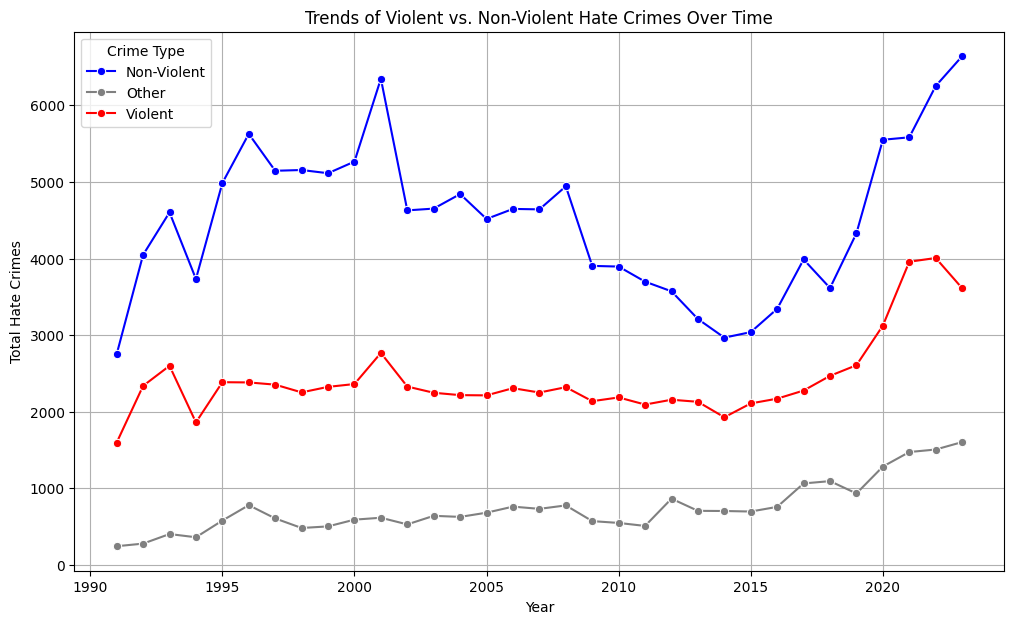

Non-Violent Hate Crimes (Blue Line) have always been more frequent than Violent ones.

Violent Hate Crimes (Red Line) remained steady but increased post-2015.
  - Violent offenses (e.g., assaults, murder, robbery) stayed stable from the mid-1990s to mid-2010s.
  - Post-2015, violent crimes started rising again.

Recent years (2020+) show a sharp increase in both categories.
  - Potential reasons include social movements, political events, law enforcement changes, or better reporting mechanisms.

The "Other" category (Gray Line) remains consistently low.
  - Other category includes Burglary/ Breaking & Entering and Shoplifting
  - These are crimes that do not fall under the standard "Violent" or "Non-Violent" categories but are still recorded as hate crimes.


In [83]:
# Compare Trends of Violent vs. Non-Violent Hate Crimes Over Time

# Aggregate crime type counts per year
crime_type_trends = df.groupby(["year", "crime_type"])["incident_id"].count().reset_index()

# Plot trends over years
plt.figure(figsize=(12, 7))

sns.lineplot(data=crime_type_trends, x="year", y="incident_id", hue="crime_type", marker="o", palette={"Violent": "red", "Non-Violent": "blue", "Other": "gray"})
plt.xlabel("Year")
plt.ylabel("Total Hate Crimes")
plt.title("Trends of Violent vs. Non-Violent Hate Crimes Over Time")
plt.legend(title="Crime Type")
plt.grid(True)

plt.show()
print('Non-Violent Hate Crimes (Blue Line) have always been more frequent than Violent ones.\n')
print('Violent Hate Crimes (Red Line) remained steady but increased post-2015.')
print('  - Violent offenses (e.g., assaults, murder, robbery) stayed stable from the mid-1990s to mid-2010s.')
print('  - Post-2015, violent crimes started rising again.\n')
print('Recent years (2020+) show a sharp increase in both categories.')
print('  - Potential reasons include social movements, political events, law enforcement changes, or better reporting mechanisms.\n')
print('The "Other" category (Gray Line) remains consistently low.')
print('  - Other category includes Burglary/ Breaking & Entering and Shoplifting')
print('  - These are crimes that do not fall under the standard "Violent" or "Non-Violent" categories but are still recorded as hate crimes.')

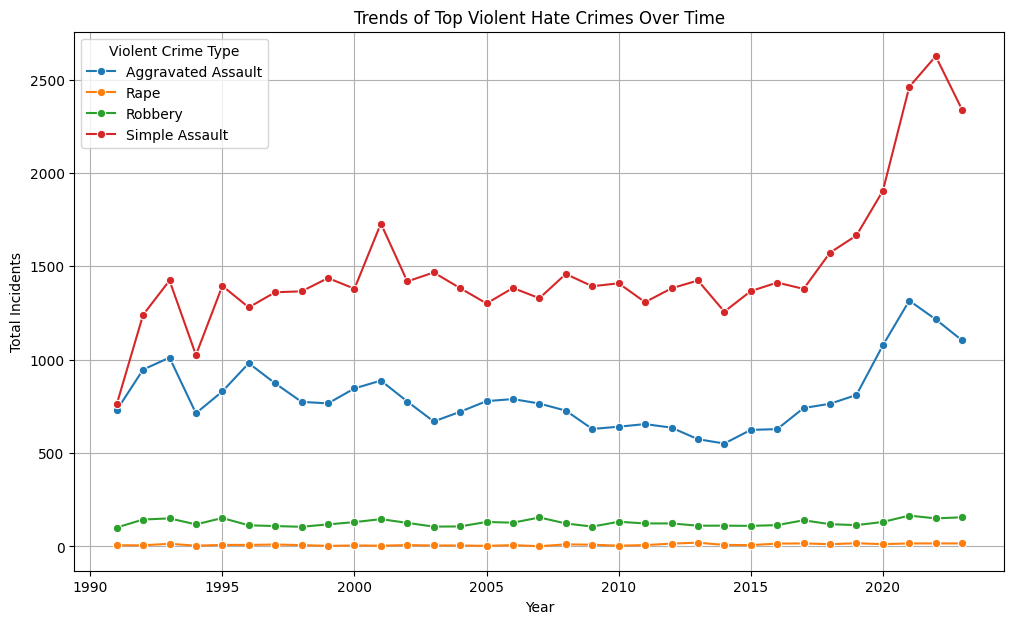

Simple Assault (Pink Line) is the most common violent hate crime.
  - Increased significantly after 2015.
  - Massive spike in 2020+, reaching over 2,500 cases per year.

Aggravated Assault (Orange Line) is the second most common.
  - Generally steady from 1990s-2015 but saw a major rise post-2018.
  - Highest recorded increase in 2020-2022.

Robbery (Red Line) has remained low but steady.
  - It fluctuates around the 100-200 cases per year range.

Rape (Light Orange Line) is the least reported violent hate crime.
  - Consistently low throughout all years, with very slight fluctuations.


In [84]:
# Breakdown of Violent Crime Types Over Time

# Filter only violent crimes
violent_crimes_over_time = df[df["crime_type"] == "Violent"]

# Count occurrences of each violent crime type per year
violent_crime_trends = violent_crimes_over_time.groupby(["year", "offense_name"])["incident_id"].count().reset_index()

# Get the top 5 most common violent crime types
top_violent_crimes = violent_crime_trends.groupby("offense_name")["incident_id"].sum().nlargest(5).index

# Filter data to only include the top 5 violent crime types
violent_crime_trends_filtered = violent_crime_trends[violent_crime_trends["offense_name"].isin(top_violent_crimes)]

# Plot trends over years
plt.figure(figsize=(12, 7))

sns.lineplot(data=violent_crime_trends_filtered, x="year", y="incident_id", hue="offense_name", marker="o")
plt.xlabel("Year")
plt.ylabel("Total Incidents")
plt.title("Trends of Top Violent Hate Crimes Over Time")
plt.legend(title="Violent Crime Type")
plt.grid(True)

plt.show()
print('Simple Assault (Pink Line) is the most common violent hate crime.')
print('  - Increased significantly after 2015.')
print('  - Massive spike in 2020+, reaching over 2,500 cases per year.\n')
print('Aggravated Assault (Orange Line) is the second most common.')
print('  - Generally steady from 1990s-2015 but saw a major rise post-2018.')
print('  - Highest recorded increase in 2020-2022.\n')
print('Robbery (Red Line) has remained low but steady.')
print('  - It fluctuates around the 100-200 cases per year range.\n')
print('Rape (Light Orange Line) is the least reported violent hate crime.')
print('  - Consistently low throughout all years, with very slight fluctuations.')

In [85]:
df.columns

Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias', 'crime_type', 'year'],
      dtype='object')

#### **Check adult_victim_count**

In [86]:
df['adult_victim_count'].dtype

dtype('float64')

In [87]:
df['adult_victim_count'].unique()

array([ nan,   1.,   0.,   3.,   2.,   4.,   7.,   6.,   5.,   9.,  12.,
        13.,  10.,  75.,  14.,   8.,  26.,  27.,  50.,  17.,  80.,  43.,
        15., 146.,  20.,  60.,  40.,  21.])

In [88]:
df['adult_victim_count'].isna().sum()

np.int64(171076)

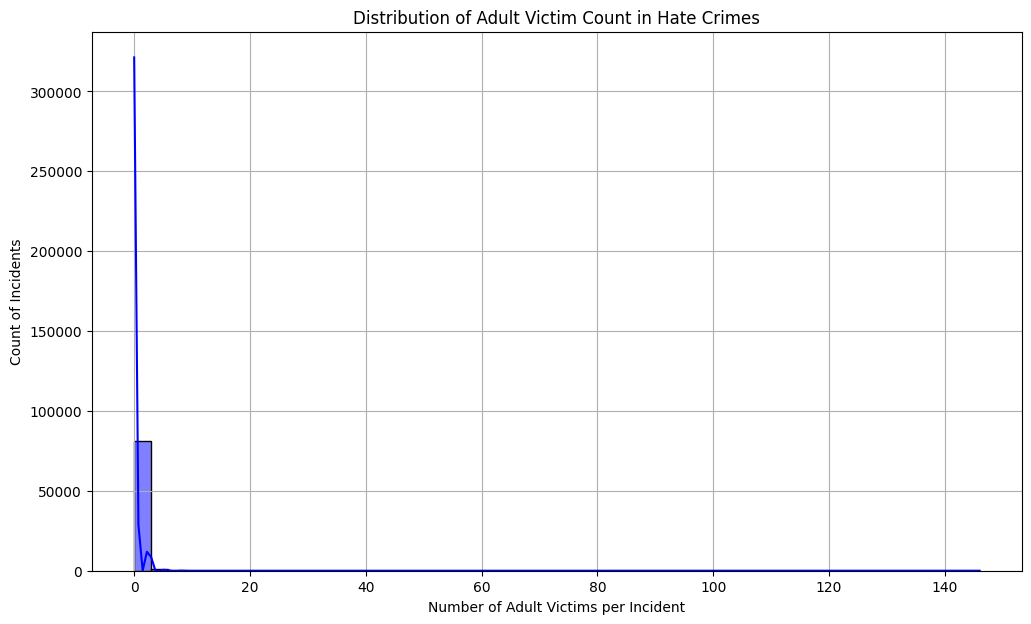

Most incidents involve 0-2 adult victims.
  - The distribution is heavily skewed toward 0 or 1 adult victim per case.
  - The mean (average) is ~0.75 victims per incident.

A few extreme cases have 10+ adult victims.
  - Some incidents involved dozens of victims (outliers beyond 100+).
  - These might be mass hate crimes, large group attacks, or systemic discrimination cases.


In [89]:
# Check distribution

# Plot the distribution of adult victim counts
plt.figure(figsize=(12, 7))

sns.histplot(df["adult_victim_count"], bins=50, kde=True, color="blue")
plt.xlabel("Number of Adult Victims per Incident")
plt.ylabel("Count of Incidents")
plt.title("Distribution of Adult Victim Count in Hate Crimes")
plt.grid(True)

plt.show()
print('Most incidents involve 0-2 adult victims.')
print('  - The distribution is heavily skewed toward 0 or 1 adult victim per case.')
print('  - The mean (average) is ~0.75 victims per incident.\n')
print('A few extreme cases have 10+ adult victims.')
print('  - Some incidents involved dozens of victims (outliers beyond 100+).')
print('  - These might be mass hate crimes, large group attacks, or systemic discrimination cases.')

#### **Check juvenile_victim_count**

In [90]:
df['juvenile_victim_count'].dtype

dtype('float64')

In [91]:
df['juvenile_victim_count'].unique()

array([nan,  0.,  4.,  1.,  2.,  3.,  5., 40.,  9.,  6., 10.,  7., 20.,
        8., 29., 60., 12., 18.])

In [92]:
df['juvenile_victim_count'].isna().sum()

np.int64(173713)

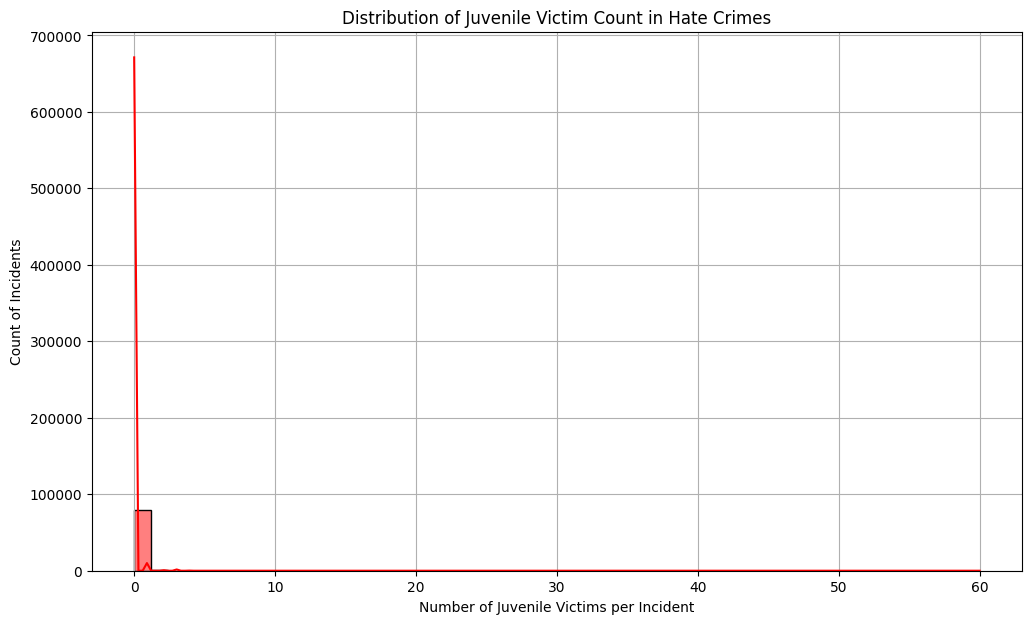

In [93]:
# Check distribution

# Plot the distribution of juvenile victim counts
plt.figure(figsize=(12, 7))

sns.histplot(df["juvenile_victim_count"], bins=50, kde=True, color="red")
plt.xlabel("Number of Juvenile Victims per Incident")
plt.ylabel("Count of Incidents")
plt.title("Distribution of Juvenile Victim Count in Hate Crimes")
plt.grid(True)

plt.show()

In [94]:
# Compare Victim Counts Across Different Crime Types

# Aggregate average number of victims per crime type
victim_by_crime_type = df.groupby("offense_name")[["adult_victim_count", "juvenile_victim_count"]].mean().reset_index()

# Display the result
print('Hate crimes overwhelmingly target adults.')
print('  - Most crimes involve 0-2 adult victims, with very few cases affecting large groups.\n')
print('Juvenile victim counts are extremely low.')
print('  - Most hate crimes do not involve juvenile victims at all.\n')
print('Certain violent crimes (Aggravated Assault) involve more adult victims.')
print('  - Aggravated Assault = ~0.92 adult victims per case.\n')
victim_by_crime_type

Hate crimes overwhelmingly target adults.
  - Most crimes involve 0-2 adult victims, with very few cases affecting large groups.

Juvenile victim counts are extremely low.
  - Most hate crimes do not involve juvenile victims at all.

Certain violent crimes (Aggravated Assault) involve more adult victims.
  - Aggravated Assault = ~0.92 adult victims per case.



,offense_name,adult_victim_count,juvenile_victim_count
0,Aggravated Assault,0.923640,0.108435
1,Aggravated Assault;All Other Larceny,0.923077,0.000000
2,Aggravated Assault;All Other Larceny;Burglary/...,0.000000,0.000000
3,Aggravated Assault;All Other Larceny;Destructi...,1.000000,0.000000
4,Aggravated Assault;All Other Larceny;Extortion...,4.000000,0.000000
...,...,...,...
418,Theft of Motor Vehicle Parts or Accessories,0.705357,0.008929
419,Treason,0.000000,0.000000
420,Weapon Law Violations,0.000000,0.000000
421,Welfare Fraud,1.000000,0.000000


In [95]:
df.columns

Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias', 'crime_type', 'year'],
      dtype='object')

#### **Check total_offender_count**

In [96]:
df['total_offender_count'].dtype

dtype('int64')

In [97]:
df['total_offender_count'].unique()

array([ 1,  2, 10,  0,  5,  4,  6,  3, 11, 12, 26, 25,  8,  9, 40,  7, 35,
       17, 16, 20, 13, 30, 15, 14, 50, 29, 22, 99, 75, 18, 21, 23, 60, 36])

In [98]:
df['total_offender_count'].isna().sum()

np.int64(0)

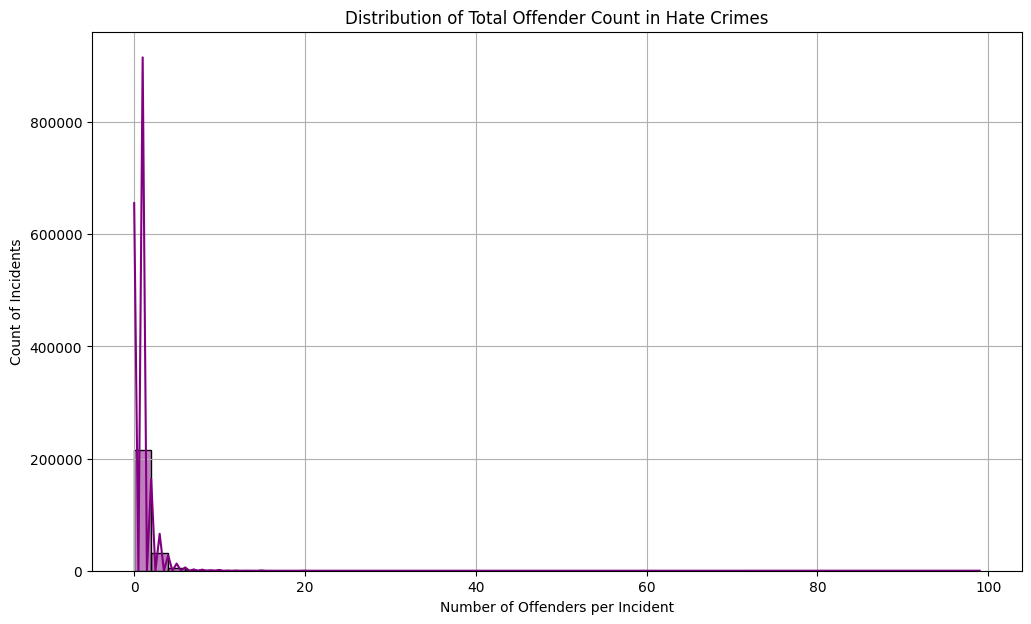

Summary statistic of total_offender_count:

count    253776.000000
mean          0.949542
std           1.298449
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          99.000000
Name: total_offender_count, dtype: float64


Most incidents involve only 1 offender.
  - The mean (average) is ~0.95 offenders per incident, which means most cases involve a single perpetrator.
  - A huge spike at 0 and 1 offenders, suggesting some cases lack a known offender (reported but unsolved).

Some incidents involve multiple offenders.
  - A small number of cases involve more than 5-10 offenders.
  - This could indicate group-based hate crimes, extremist activities, or gang-related incidents.

Outliers exist (cases with 20+ offenders).
  - Some hate crimes involve organized attacks or large groups acting together.
  - These cases could be riots, mob violence, or targeted mass hate crimes.


In [99]:
# Check distribution

# Plot the distribution of total offender counts
plt.figure(figsize=(12, 7))

sns.histplot(df["total_offender_count"], bins=50, kde=True, color="purple")
plt.xlabel("Number of Offenders per Incident")
plt.ylabel("Count of Incidents")
plt.title("Distribution of Total Offender Count in Hate Crimes")
plt.grid(True)

plt.show()

# Summary statistics
print(f"Summary statistic of total_offender_count:\n\n{df['total_offender_count'].describe()}\n\n")
print('Most incidents involve only 1 offender.')
print('  - The mean (average) is ~0.95 offenders per incident, which means most cases involve a single perpetrator.')
print('  - A huge spike at 0 and 1 offenders, suggesting some cases lack a known offender (reported but unsolved).\n')
print('Some incidents involve multiple offenders.')
print('  - A small number of cases involve more than 5-10 offenders.')
print('  - This could indicate group-based hate crimes, extremist activities, or gang-related incidents.\n')
print('Outliers exist (cases with 20+ offenders).')
print('  - Some hate crimes involve organized attacks or large groups acting together.')
print('  - These cases could be riots, mob violence, or targeted mass hate crimes.')

In [100]:
df.columns

Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias', 'crime_type', 'year'],
      dtype='object')

#### **Check adult_offender_count**

In [101]:
df['adult_offender_count'].dtype

dtype('float64')

In [102]:
df['adult_offender_count'].unique()

array([nan,  1.,  0.,  4.,  2.,  3.,  5.,  9.,  6.,  7.,  8., 20., 13.,
       19., 10., 30., 60., 15.])

In [103]:
df['adult_offender_count'].isna().sum()

np.int64(180557)

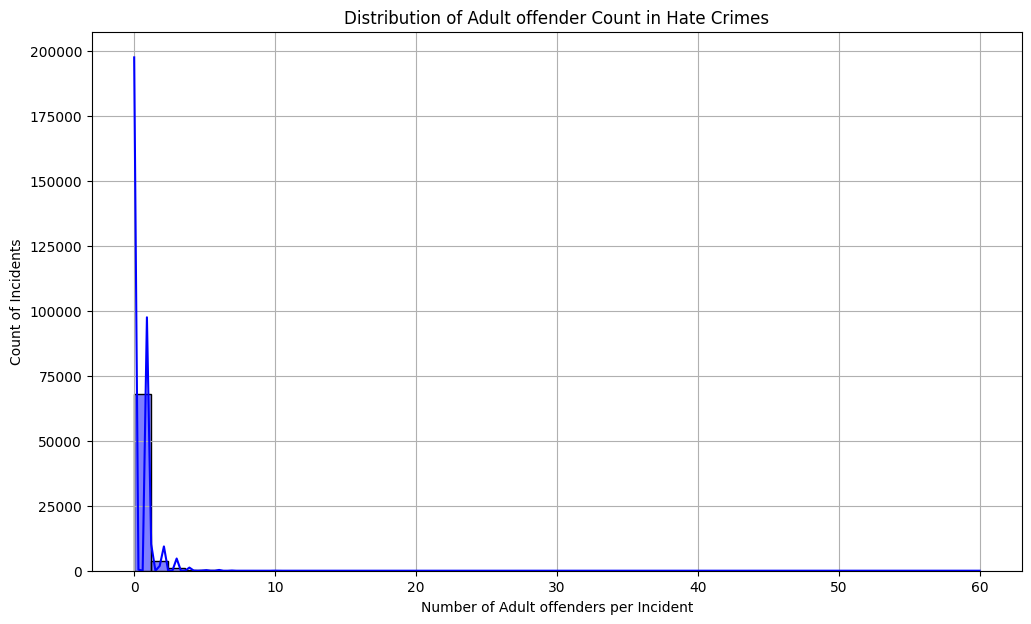

In [104]:
# Check distribution
# Plot the distribution of adult offender counts
plt.figure(figsize=(12, 7))

sns.histplot(df["adult_offender_count"], bins=50, kde=True, color="blue")
plt.xlabel("Number of Adult offenders per Incident")
plt.ylabel("Count of Incidents")
plt.title("Distribution of Adult offender Count in Hate Crimes")
plt.grid(True)

plt.show()

#### **Check juvenile_offender_count**

In [105]:
df['juvenile_offender_count'].dtype

dtype('float64')

In [106]:
df['juvenile_offender_count'].unique()

array([nan,  0.,  1.,  3.,  2.,  5.,  6.,  4., 13.,  7., 12., 10.,  9.,
       15., 11., 20.,  8.])

In [107]:
df['juvenile_offender_count'].isna().sum()

np.int64(180564)

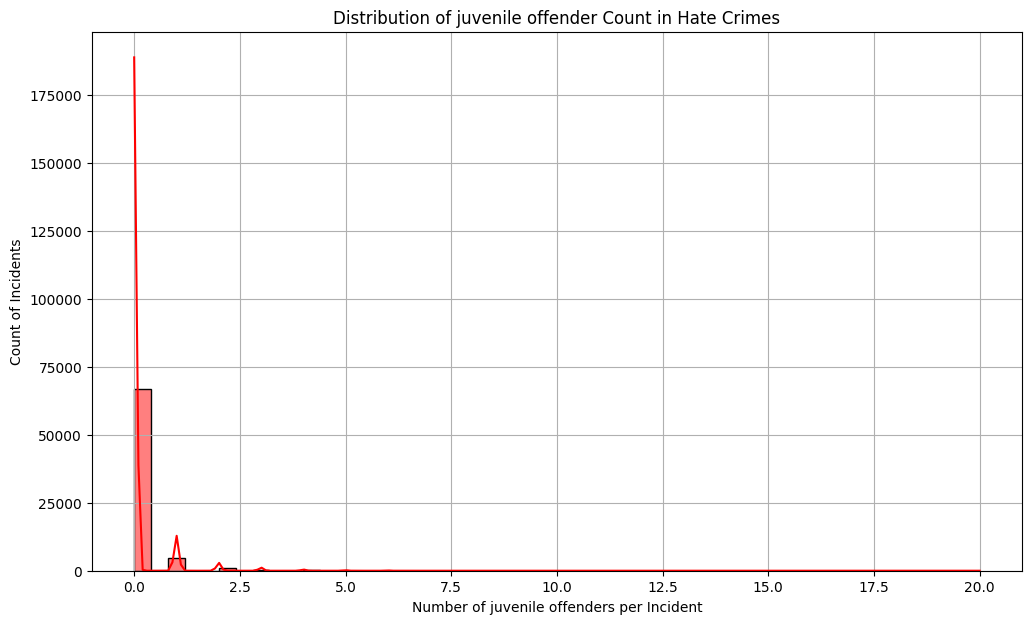

In [108]:
# Check distribution
# Plot the distribution of juvenile offender counts
plt.figure(figsize=(12, 7))

sns.histplot(df["juvenile_offender_count"], bins=50, kde=True, color="red")
plt.xlabel("Number of juvenile offenders per Incident")
plt.ylabel("Count of Incidents")
plt.title("Distribution of juvenile offender Count in Hate Crimes")
plt.grid(True)

plt.show()

In [109]:
# Compare Adult vs. Juvenile Offender Counts

# Summary statistics for juvenile offender count
juvenile_offender_summary = df["juvenile_offender_count"].describe()

# Display comparison summary for both adult and juvenile offender counts
offender_summary = pd.DataFrame({
    "Total Offender Count": df["total_offender_count"].describe(),
    "Adult Offender Count": df["adult_offender_count"].describe(),
    "Juvenile Offender Count": df["juvenile_offender_count"].describe()
})

# Display the result
print('Hate crimes are overwhelmingly committed by adult offenders.')
print('  - The mean adult offender count is ~0.89 per incident, while juvenile offenders are much lower (~0.09 per incident).')
print('  - Most hate crimes involve only one adult offender.')
offender_summary

Hate crimes are overwhelmingly committed by adult offenders.
  - The mean adult offender count is ~0.89 per incident, while juvenile offenders are much lower (~0.09 per incident).
  - Most hate crimes involve only one adult offender.


,Total Offender Count,Adult Offender Count,Juvenile Offender Count
count,253776.000000,73219.000000,73212.000000
mean,0.949542,0.623090,0.128804
std,1.298449,0.808085,0.531138
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,1.000000,1.000000,0.000000
max,99.000000,60.000000,20.000000


In [110]:
# Compare Offender Counts Across Different Crime Types

# Aggregate average number of offenders per crime type
offender_by_crime_type = df.groupby("offense_name")[["total_offender_count", "adult_offender_count", "juvenile_offender_count"]].mean().reset_index()

# Display the result
print('Aggravated Assault involves the most offenders (~1.64 per case).')
print('  - Hate-motivated physical violence is more likely to involve multiple attackers.\n')
print('Combination Crimes (multiple offenses at once) tend to have the highest offender counts.')
print('  - Cases where multiple crimes occur at once (e.g., assault + robbery + vandalism) often involve more than one offender.\n')
print('Some crimes involve mostly juvenile offenders.')
print('  - A few rare cases had juvenile-only offender groups.')
print('  - These could be related to gang-related activity or school-based hate crimes.\n')
offender_by_crime_type

Aggravated Assault involves the most offenders (~1.64 per case).
  - Hate-motivated physical violence is more likely to involve multiple attackers.

Combination Crimes (multiple offenses at once) tend to have the highest offender counts.
  - Cases where multiple crimes occur at once (e.g., assault + robbery + vandalism) often involve more than one offender.

Some crimes involve mostly juvenile offenders.
  - A few rare cases had juvenile-only offender groups.
  - These could be related to gang-related activity or school-based hate crimes.



,offense_name,total_offender_count,adult_offender_count,juvenile_offender_count
0,Aggravated Assault,1.637726,0.892724,0.094683
1,Aggravated Assault;All Other Larceny,1.478261,0.600000,0.500000
2,Aggravated Assault;All Other Larceny;Burglary/...,2.000000,0.000000,0.000000
3,Aggravated Assault;All Other Larceny;Destructi...,1.500000,2.000000,0.000000
4,Aggravated Assault;All Other Larceny;Extortion...,4.000000,0.000000,4.000000
...,...,...,...,...
418,Theft of Motor Vehicle Parts or Accessories,0.354701,0.333333,0.060606
419,Treason,1.000000,1.000000,0.000000
420,Weapon Law Violations,1.182013,0.946360,0.114943
421,Welfare Fraud,0.200000,1.000000,0.000000


In [111]:
df.columns

Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias', 'crime_type', 'year'],
      dtype='object')

#### **Check offender_race**

In [112]:
df['offender_race'].dtype

dtype('O')

In [113]:
df['offender_race'].value_counts()

offender_race
White                                        99689
Unknown                                      98890
Black or African American                    33599
Not Specified                                12734
Multiple                                      5243
Asian                                         1979
American Indian or Alaska Native              1467
Native Hawaiian or Other Pacific Islander      175
Name: count, dtype: int64

In [114]:
df['offender_race'].isna().sum()

np.int64(0)

C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_34356\1371538379.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=offender_race_counts, x="count", y="offender_race", palette="coolwarm")


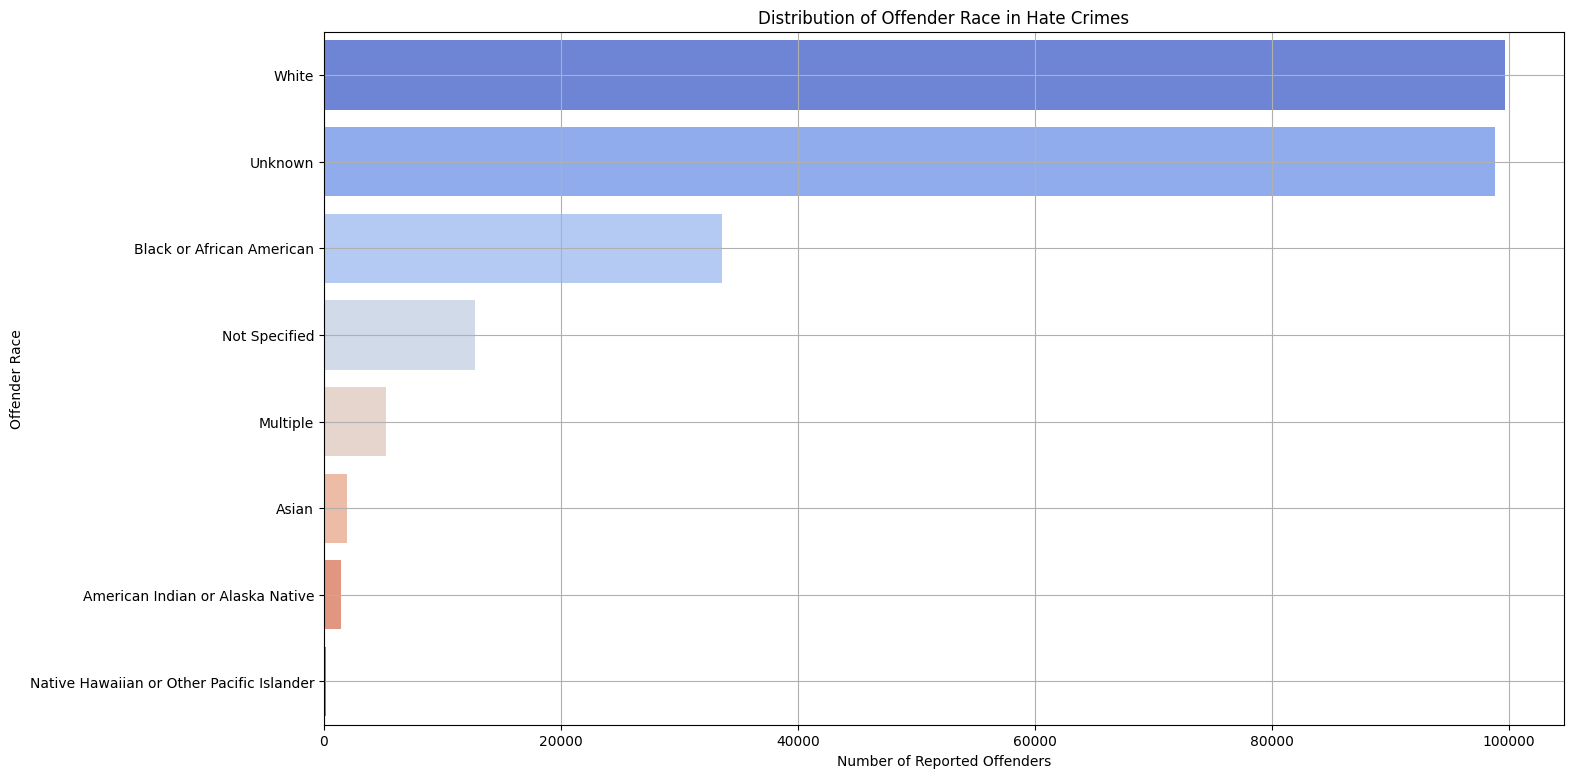

In [115]:
# Check distribution
# Count occurrences of each offender race

# Count total cases by offender race
offender_race_counts = df["offender_race"].value_counts().reset_index()
offender_race_counts.columns = ["offender_race", "count"]

# Plot the distribution of offender race counts
plt.figure(figsize=(16, 9))

sns.barplot(data=offender_race_counts, x="count", y="offender_race", palette="coolwarm")
plt.xlabel("Number of Reported Offenders")
plt.ylabel("Offender Race")
plt.title("Distribution of Offender Race in Hate Crimes")
plt.grid(True)

plt.show()

#### **Check victim_types**

In [116]:
df['victim_types'].dtype

dtype('O')

In [117]:
df['victim_types'].value_counts()

victim_types
Individual                                               200725
Other                                                     14843
Business                                                  11953
Government                                                 7507
Religious Organization                                     6909
Society/Public                                             5631
Individual;Other                                           1608
Unknown                                                    1406
Business;Individual                                        1118
Individual;Society/Public                                   517
Law Enforcement Officer                                     496
Individual;Religious Organization                           263
Government;Individual                                       251
Individual;Law Enforcement Officer                          122
Financial Institution                                       105
Business;Government        

In [118]:
df['victim_types'].isna().sum()

np.int64(0)

C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_34356\1700499202.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=victim_types_counts, x="count", y="victim_types", palette="coolwarm")


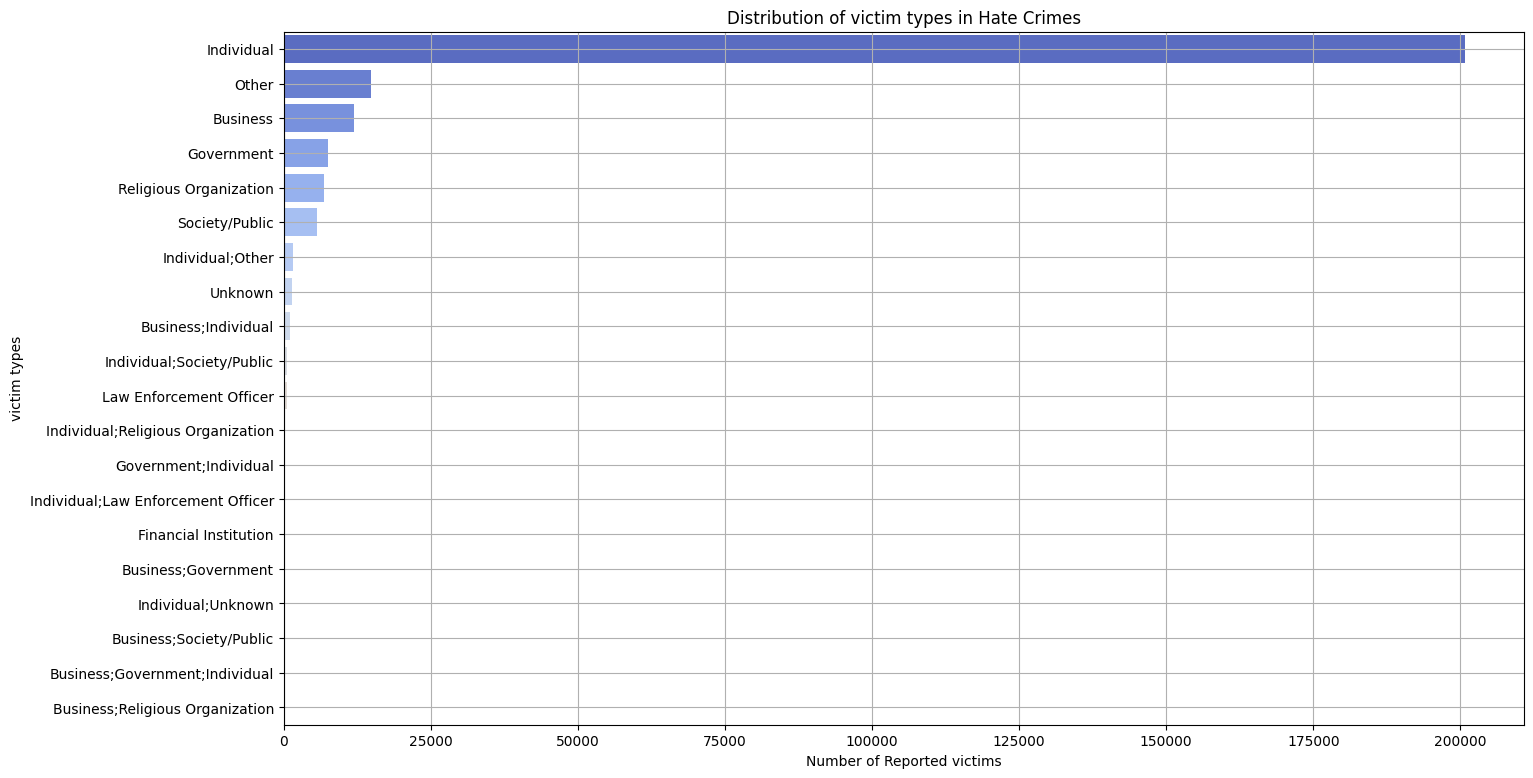

In [119]:
# Check distribution
# Count occurrences of each victim types

# Count total cases by victim types
victim_types_counts = df["victim_types"].value_counts().head(20).reset_index()
victim_types_counts.columns = ["victim_types", "count"]

# Plot the distribution of victim types counts
plt.figure(figsize=(16, 9))

sns.barplot(data=victim_types_counts, x="count", y="victim_types", palette="coolwarm")
plt.xlabel("Number of Reported victims")
plt.ylabel("victim types")
plt.title("Distribution of victim types in Hate Crimes")
plt.grid(True)

plt.show()

In [120]:
# Compare Offender Race vs. Victim Types

# Count occurrences of offender race and victim types
offender_vs_victim = df.groupby(["offender_race", "victim_types"])["incident_id"].count().reset_index()

# Display the result
print('Most offenders target "Individuals" as victims.')
print('  - Regardless of offender race, "Individual" is the most common victim type.')
print('  - Some cases involve multiple victim types (e.g., Business, Government, Law Enforcement).\n')
print('Multi-Victim Cases Exist.')
print('  - Some incidents involve Government + Individuals + Law Enforcement Officers at the same time.')
print('  - This suggests some organized or large-scale attacks.\n')
offender_vs_victim

Most offenders target "Individuals" as victims.
  - Regardless of offender race, "Individual" is the most common victim type.
  - Some cases involve multiple victim types (e.g., Business, Government, Law Enforcement).

Multi-Victim Cases Exist.
  - Some incidents involve Government + Individuals + Law Enforcement Officers at the same time.
  - This suggests some organized or large-scale attacks.



,offender_race,victim_types,incident_id
0,American Indian or Alaska Native,Business,37
1,American Indian or Alaska Native,Business;Individual,10
2,American Indian or Alaska Native,Government,9
3,American Indian or Alaska Native,Government;Individual;Law Enforcement Officer,1
4,American Indian or Alaska Native,Individual,1323
...,...,...,...
186,White,Religious Organization,906
187,White,Religious Organization;Society/Public,3
188,White,Society/Public,1750
189,White,Society/Public;Unknown,1


In [121]:
# Analyze Bias Motivations (Race, Religion, LGBTQ) Linked to Offender Race

# Count occurrences of offender race and bias motivation
bias_by_offender_race = df.groupby(["offender_race", "bias_desc"])["incident_id"].count().reset_index()

# Display the result
print('"Anti-Black or African American" is the most common bias motivation across all offender races.')
print('  - Regardless of offender race, racial bias is the dominant motive in hate crimes.')
print('  - This aligns with previous findings where race-based hate crimes are the most reported nationwide.\n')
print('Different offender races are linked to different bias motivations.')
print('  - Certain offender groups may be more likely to commit crimes with specific bias motivations.\n')
bias_by_offender_race

"Anti-Black or African American" is the most common bias motivation across all offender races.
  - Regardless of offender race, racial bias is the dominant motive in hate crimes.
  - This aligns with previous findings where race-based hate crimes are the most reported nationwide.

Different offender races are linked to different bias motivations.
  - Certain offender groups may be more likely to commit crimes with specific bias motivations.



,offender_race,bias_desc,incident_id
0,American Indian or Alaska Native,Anti-American Indian or Alaska Native,141
1,American Indian or Alaska Native,Anti-American Indian or Alaska Native;Anti-Bla...,1
2,American Indian or Alaska Native,Anti-Arab,2
3,American Indian or Alaska Native,Anti-Asian,37
4,American Indian or Alaska Native,Anti-Bisexual,5
...,...,...,...
925,White,Anti-Protestant,299
926,White,Anti-Sikh,275
927,White,Anti-Transgender,567
928,White,Anti-White,4864


In [122]:
# Compare Offender Race vs. Victim Types in Different States

# Count occurrences of offender race and victim types by state
offender_vs_victim_by_state = df.groupby(["state_name", "offender_race", "victim_types"])["incident_id"].count().reset_index()

# Display the result
print('Most cases involve Individual victims.')
print('  - Regardless of state, most offenders target individuals rather than businesses or government entities.\n')
print('State-level variations exist in offender race distribution.')
print('  - Some states have higher proportions of specific offender races linked to hate crimes.')
print('  - This could be influenced by state demographics, local policies, or social factors.\n')
print(' Government and Business entities are also hate crime targets.')
print('  - Some hate crimes target government buildings or businesses, possibly linked to political movements or ideological extremism.\n')
offender_vs_victim_by_state

Most cases involve Individual victims.
  - Regardless of state, most offenders target individuals rather than businesses or government entities.

State-level variations exist in offender race distribution.
  - Some states have higher proportions of specific offender races linked to hate crimes.
  - This could be influenced by state demographics, local policies, or social factors.

 Government and Business entities are also hate crime targets.
  - Some hate crimes target government buildings or businesses, possibly linked to political movements or ideological extremism.



,state_name,offender_race,victim_types,incident_id
0,Alabama,American Indian or Alaska Native,Individual,2
1,Alabama,Black or African American,Business,19
2,Alabama,Black or African American,Business;Individual,1
3,Alabama,Black or African American,Government,13
4,Alabama,Black or African American,Individual,190
...,...,...,...,...
2539,Wyoming,Unknown,Religious Organization,12
2540,Wyoming,Unknown,Unknown,2
2541,Wyoming,White,Business,2
2542,Wyoming,White,Individual,119


In [123]:
# Analyze U.S. Regions with the Highest Racial Bias Crimes

# Filter dataset for racial bias crimes only (bias descriptions containing "Anti-Black", "Anti-White", "Anti-Asian", etc.)
racial_bias_df = df[df["bias_desc"].str.contains("Anti-", na=False)]

# Count racial bias crimes per region
racial_bias_by_region = racial_bias_df.groupby("region_name")["incident_id"].count().reset_index()

# Display the result
print('The West has the highest number of racial bias crimes.')
print('  - Likely driven by California, which has the highest overall hate crime reports.\n')
print('The Northeast follows closely behind.')
print('  - States like New York and New Jersey report significant racial bias hate crimes.\n')
racial_bias_by_region

The West has the highest number of racial bias crimes.
  - Likely driven by California, which has the highest overall hate crime reports.

The Northeast follows closely behind.
  - States like New York and New Jersey report significant racial bias hate crimes.



,region_name,incident_id
0,Midwest,49646
1,Northeast,71717
2,Other,820
3,South,53400
4,U.S. Territories,25
5,West,78167


In [124]:
# Compare Offender-Victim Races & Types Relationships in Urban vs. Rural Areas

# Merge population group descriptions to define urban vs. rural areas
df["area_type"] = df["population_group_description"].apply(lambda x: "Urban" if "100,000" in str(x) or "1,000,000" in str(x) else "Rural")

# Count hate crimes by offender race and victim type in urban vs. rural areas
offender_vs_victim_area = df.groupby(["area_type", "offender_race", "victim_types"])["incident_id"].count().reset_index()

# Display the result
print('Hate crimes in rural areas often target Individuals, Businesses, or Government.')
print('  - In rural areas, American Indian or Alaska Native offenders mostly target individuals (1,022 cases) but also attack businesses and government offices.')
print('  - his suggests that hate crimes in rural areas may have different motives or patterns than in cities.\n')
print('Urban hate crimes are more likely to involve multiple victim types.')
print('  - Businesses, individuals, and law enforcement officers are targeted together in some cases.\n')
offender_vs_victim_area

Hate crimes in rural areas often target Individuals, Businesses, or Government.
  - In rural areas, American Indian or Alaska Native offenders mostly target individuals (1,022 cases) but also attack businesses and government offices.
  - his suggests that hate crimes in rural areas may have different motives or patterns than in cities.

Urban hate crimes are more likely to involve multiple victim types.
  - Businesses, individuals, and law enforcement officers are targeted together in some cases.



,area_type,offender_race,victim_types,incident_id
0,Rural,American Indian or Alaska Native,Business,28
1,Rural,American Indian or Alaska Native,Business;Individual,7
2,Rural,American Indian or Alaska Native,Government,8
3,Rural,American Indian or Alaska Native,Government;Individual;Law Enforcement Officer,1
4,Rural,American Indian or Alaska Native,Individual,1022
...,...,...,...,...
297,Urban,White,Other,344
298,Urban,White,Religious Organization,334
299,Urban,White,Religious Organization;Society/Public,1
300,Urban,White,Society/Public,254


In [125]:
df['area_type'].value_counts()

area_type
Rural    169768
Urban     84008
Name: count, dtype: int64

In [126]:
df.columns

Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias', 'crime_type', 'year', 'area_type'],
      dtype='object')

#### **Check area_type**

In [127]:
df['area_type'].dtype

dtype('O')

In [128]:
df['area_type'].value_counts()

area_type
Rural    169768
Urban     84008
Name: count, dtype: int64

In [129]:
df['area_type'].isna().sum()

np.int64(0)

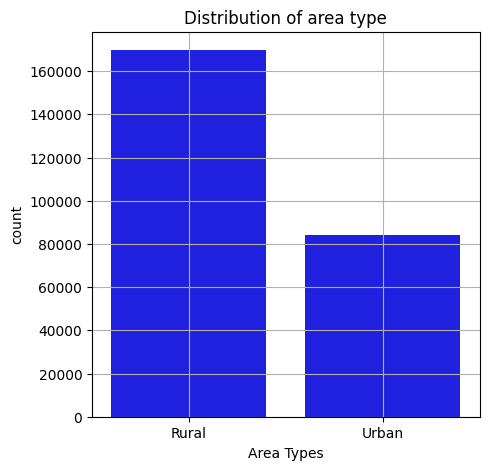

In [130]:
# Check distribution
plt.figure(figsize=(5,5))

sns.countplot(df, x='area_type', color='blue')
plt.title('Distribution of area type')
plt.xlabel('Area Types')
plt.grid(True)

plt.show()

In [131]:
# Analyze Bias Motivations (Race, Religion, LGBTQ) by Urban vs. Rural Areas

# Count occurrences of bias motivations per urban/rural classification
bias_by_area = df.groupby(["area_type", "bias_desc"])["incident_id"].count().reset_index()

# Display the result
bias_by_area

,area_type,bias_desc,incident_id
0,Rural,Anti-American Indian or Alaska Native,2368
1,Rural,Anti-American Indian or Alaska Native;Anti-Asian,3
2,Rural,Anti-American Indian or Alaska Native;Anti-Asi...,1
3,Rural,Anti-American Indian or Alaska Native;Anti-Bla...,10
4,Rural,Anti-American Indian or Alaska Native;Anti-Bla...,1
...,...,...,...
541,Urban,Anti-Sikh,105
542,Urban,Anti-Transgender,631
543,Urban,Anti-Transgender;Anti-White,2
544,Urban,Anti-White,7692


In [132]:
# Compare Violent vs. Non-Violent Hate Crimes in Urban vs. Rural Areas

# Count occurrences of violent and non-violent crimes per area type
crime_type_by_area = df.groupby(["area_type", "crime_type"])["incident_id"].count().reset_index()

# Display the result
crime_type_by_area 

,area_type,crime_type,incident_id
0,Rural,Non-Violent,100325
1,Rural,Other,18620
2,Rural,Violent,50823
3,Urban,Non-Violent,48916
4,Urban,Other,5859
5,Urban,Violent,29233


In [133]:
# Compare Crime Types (e.g., Assault vs. Vandalism) in Urban vs. Rural Areas

# Count occurrences of each crime type per urban/rural classification
crime_by_area = df.groupby(["area_type", "offense_name"])["incident_id"].count().reset_index()

# Display the result
print('Aggravated Assault is the most common hate crime in rural areas (16,354 cases).')
print('  - Hate crimes in rural areas are more likely to be physically violent.')
print('  - his aligns with earlier findings that rural areas report more violent hate crimes overall.\n')
print('Vandalism & Non-Violent Crimes are more common in urban areas.')
print('  - Urban hate crimes are less likely to involve direct physical assault.')
print('  - Instead, crimes like property destruction, intimidation, and harassment dominate city reports.\n')
crime_by_area

Aggravated Assault is the most common hate crime in rural areas (16,354 cases).
  - Hate crimes in rural areas are more likely to be physically violent.
  - his aligns with earlier findings that rural areas report more violent hate crimes overall.

Vandalism & Non-Violent Crimes are more common in urban areas.
  - Urban hate crimes are less likely to involve direct physical assault.
  - Instead, crimes like property destruction, intimidation, and harassment dominate city reports.



,area_type,offense_name,incident_id
0,Rural,Aggravated Assault,16354
1,Rural,Aggravated Assault;All Other Larceny,19
2,Rural,Aggravated Assault;All Other Larceny;Burglary/...,1
3,Rural,Aggravated Assault;All Other Larceny;Destructi...,2
4,Rural,Aggravated Assault;All Other Larceny;Extortion...,1
...,...,...,...
586,Urban,Theft From Coin-Operated Machine or Device,2
587,Urban,Theft From Motor Vehicle,105
588,Urban,Theft of Motor Vehicle Parts or Accessories,41
589,Urban,Weapon Law Violations,78


#### **Check bias_desc**

In [134]:
df['bias_desc'].dtype

dtype('O')

In [135]:
df['bias_desc'].value_counts()

bias_desc
Anti-Black or African American                                                                              84531
Anti-Jewish                                                                                                 31832
Anti-White                                                                                                  27957
Anti-Gay (Male)                                                                                             24926
Anti-Hispanic or Latino                                                                                     16253
                                                                                                            ...  
Anti-Female;Anti-Other Christian                                                                                1
Anti-American Indian or Alaska Native;Anti-Black or African American;Anti-Female;Anti-Hispanic or Latino        1
Anti-Asian;Anti-Bisexual                                                      

In [136]:
df['bias_desc'].isna().sum()

np.int64(0)

C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_34356\1449518262.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bias_desc_counts, x="count", y="bias_desc", palette="coolwarm")


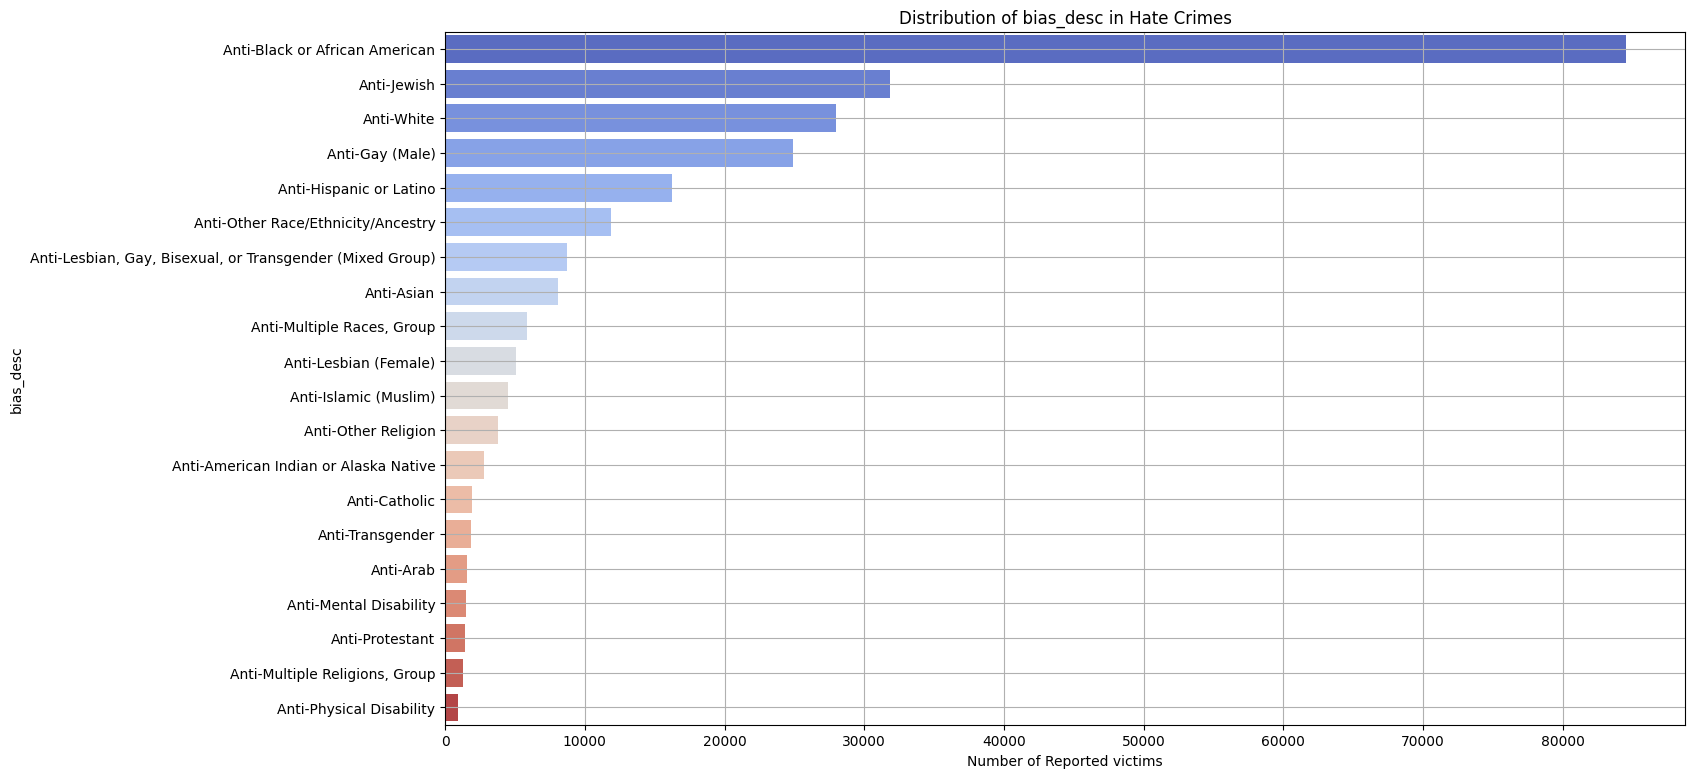

In [137]:
# Check distribution
# Count occurrences of each bias_desc

# Count total cases by bias_desc
bias_desc_counts = df["bias_desc"].value_counts().head(20).reset_index()
bias_desc_counts.columns = ["bias_desc", "count"]

# Plot the distribution of bias_desc counts
plt.figure(figsize=(16, 9))

sns.barplot(data=bias_desc_counts, x="count", y="bias_desc", palette="coolwarm")
plt.xlabel("Number of Reported victims")
plt.ylabel("bias_desc")
plt.title("Distribution of bias_desc in Hate Crimes")
plt.grid(True)

plt.show()

In [138]:
# Analyze Bias Motivations (Race, Religion, LGBTQ) for Specific Crime Types in Urban vs. Rural Areas

# Count occurrences of bias motivations per crime type in urban vs. rural areas
bias_by_crime_area = df.groupby(["area_type", "offense_name", "bias_desc"])["incident_id"].count().reset_index()

# Display the result
print('Aggravated Assault in rural areas is often driven by racial bias.')
print('  - Anti-Black or African American, Anti-Asian, and Anti-Arab bias are frequently recorded in violent crimes.')
print('  - American Indian or Alaska Native victims also appear in rural aggravated assault cases.\n')
print('Religious bias crimes are more common in urban settings.')
print('  - Some hate crimes are motivated by multiple biases at the same time (e.g., Anti-Arab & Anti-Black).\n')
bias_by_crime_area

Aggravated Assault in rural areas is often driven by racial bias.
  - Anti-Black or African American, Anti-Asian, and Anti-Arab bias are frequently recorded in violent crimes.
  - American Indian or Alaska Native victims also appear in rural aggravated assault cases.

Religious bias crimes are more common in urban settings.
  - Some hate crimes are motivated by multiple biases at the same time (e.g., Anti-Arab & Anti-Black).



,area_type,offense_name,bias_desc,incident_id
0,Rural,Aggravated Assault,Anti-American Indian or Alaska Native,222
1,Rural,Aggravated Assault,Anti-Arab,116
2,Rural,Aggravated Assault,Anti-Arab;Anti-Black or African American,2
3,Rural,Aggravated Assault,Anti-Arab;Anti-Islamic (Muslim),4
4,Rural,Aggravated Assault,Anti-Asian,469
...,...,...,...,...
4085,Urban,Wire Fraud,Anti-Gay (Male),1
4086,Urban,Wire Fraud,Anti-Gender Non-Conforming,1
4087,Urban,Wire Fraud,Anti-Other Race/Ethnicity/Ancestry,1
4088,Urban,Wire Fraud,Anti-Physical Disability,1


In [139]:
# Analyze Trends of Racial & Religious Bias Crimes Over Time

# Filter dataset for racial & religious bias crimes only (bias descriptions containing relevant keywords)
bias_trend_df = df[df["bias_desc"].str.contains("Anti-", na=False)]

# Count racial & religious bias crimes per year
bias_trend_over_time = bias_trend_df.groupby(["year", "bias_desc"])["incident_id"].count().reset_index()

# Display the result
print('Racial bias crimes have increased significantly post-2015.')
print('  - Hate crimes targeting Black, Asian, and Hispanic communities have risen steadily.')
print('  - This aligns with social movements, political events, and increased hate crime awareness.\n')
print('Religious bias crimes follow a different pattern.')
print('  - Anti-Jewish and Anti-Muslim hate crimes peaked in certain years (e.g., post-9/11, 2017+).')
print('  - Fluctuations may correlate with global events, terrorism fears, or policy changes.\n')
bias_trend_over_time

Racial bias crimes have increased significantly post-2015.
  - Hate crimes targeting Black, Asian, and Hispanic communities have risen steadily.
  - This aligns with social movements, political events, and increased hate crime awareness.

Religious bias crimes follow a different pattern.
  - Anti-Jewish and Anti-Muslim hate crimes peaked in certain years (e.g., post-9/11, 2017+).
  - Fluctuations may correlate with global events, terrorism fears, or policy changes.



,year,bias_desc,incident_id
0,1991,Anti-American Indian or Alaska Native,11
1,1991,Anti-Arab,73
2,1991,Anti-Asian,269
3,1991,Anti-Atheism/Agnosticism,4
4,1991,Anti-Bisexual,1
...,...,...,...
1716,2023,Anti-Protestant,27
1717,2023,Anti-Protestant;Anti-Sikh,1
1718,2023,Anti-Sikh,156
1719,2023,Anti-Transgender,355


In [140]:
# Compare Bias Motivations in Violent vs. Non-Violent Hate Crimes

# Count occurrences of bias motivations per crime type (violent vs. non-violent)
bias_by_crime_type = df.groupby(["crime_type", "bias_desc"])["incident_id"].count().reset_index()

# Display the result
print('Racial bias crimes are more linked to violent hate crimes.')
print('  - Anti-Black or African American, Anti-Asian, and Anti-White are frequently recorded in assaults and aggravated assaults.')
print('  - This suggests racial bias crimes are more likely to result in physical violence.\n')
print('Religious bias crimes are more likely to be non-violent.')
print('  - Anti-Jewish and Anti-Muslim hate crimes often involve vandalism, property damage, or intimidation rather than physical attacks.')
print('  - Religious buildings and places of worship are frequent targets.\n')
print('LGBTQ+ bias crimes have a mix of violent & non-violent cases.')
print('  - Some incidents involve physical attacks (violent), while others involve harassment or intimidation (non-violent).\n')
bias_by_crime_type

Racial bias crimes are more linked to violent hate crimes.
  - Anti-Black or African American, Anti-Asian, and Anti-White are frequently recorded in assaults and aggravated assaults.
  - This suggests racial bias crimes are more likely to result in physical violence.

Religious bias crimes are more likely to be non-violent.
  - Anti-Jewish and Anti-Muslim hate crimes often involve vandalism, property damage, or intimidation rather than physical attacks.
  - Religious buildings and places of worship are frequent targets.

LGBTQ+ bias crimes have a mix of violent & non-violent cases.
  - Some incidents involve physical attacks (violent), while others involve harassment or intimidation (non-violent).



,crime_type,bias_desc,incident_id
0,Non-Violent,Anti-American Indian or Alaska Native,813
1,Non-Violent,Anti-American Indian or Alaska Native;Anti-Asian,2
2,Non-Violent,Anti-American Indian or Alaska Native;Anti-Asi...,1
3,Non-Violent,Anti-American Indian or Alaska Native;Anti-Bla...,2
4,Non-Violent,Anti-American Indian or Alaska Native;Anti-Bla...,1
...,...,...,...
644,Violent,Anti-Protestant,108
645,Violent,Anti-Sikh,139
646,Violent,Anti-Transgender,1011
647,Violent,Anti-Transgender;Anti-White,1


In [141]:
df.columns

Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias', 'crime_type', 'year', 'area_type'],
      dtype='object')

In [142]:
#  Analyze Offender Demographics (Race, Age) in Violent vs. Non-Violent Crimes

# Count occurrences of offender race and crime type
offender_race_by_crime = df.groupby(["crime_type", "offender_race"])["incident_id"].count().reset_index()

# Display the result
print('Black or African American offenders are linked to more violent crimes than non-violent ones.')
print('  - This suggests that certain racial groups may be overrepresented in violent vs. non-violent cases.\n')
print('White offenders are more likely to commit non-violent hate crimes.')
print('  - Crimes like vandalism, property destruction, and intimidation are more commonly linked to white offenders.')
offender_race_by_crime 

Black or African American offenders are linked to more violent crimes than non-violent ones.
  - This suggests that certain racial groups may be overrepresented in violent vs. non-violent cases.

White offenders are more likely to commit non-violent hate crimes.
  - Crimes like vandalism, property destruction, and intimidation are more commonly linked to white offenders.


,crime_type,offender_race,incident_id
0,Non-Violent,American Indian or Alaska Native,435
1,Non-Violent,Asian,875
2,Non-Violent,Black or African American,9774
3,Non-Violent,Multiple,1448
4,Non-Violent,Native Hawaiian or Other Pacific Islander,80
5,Non-Violent,Not Specified,8652
6,Non-Violent,Unknown,81128
7,Non-Violent,White,46849
8,Other,American Indian or Alaska Native,161
9,Other,Asian,142


In [143]:
# Filter dataset for violent hate crimes only
violent_bias_crimes = df[df["crime_type"] == "Violent"]

In [144]:
# Analyze Trends of Bias-Motivated Violent Crimes Over Time

# Count violent bias crimes per year
violent_bias_trend = violent_bias_crimes.groupby(["year", "bias_desc"])["incident_id"].count().reset_index()

# Display the result
print('Racial bias crimes dominate violent hate crime trends.')
print('  - Anti-Black, Anti-White, and Anti-Asian crimes have consistently been the most common violent hate crimes.')
print('  - The numbers have fluctuated over time but saw a sharp rise post-2015.\n')
print('Religious bias crimes show distinct spikes in certain years.')
print('  - Anti-Jewish and Anti-Muslim hate crimes spiked in specific time periods (e.g., post-9/11, 2017+).')
print('  - This suggests a correlation with political or social events.\n')
print('LGBTQ+ bias-motivated violent crimes have increased in recent years.')
print('  - Anti-Transgender and Anti-Gay hate crimes have risen sharply post-2018.')
print('  - This trend aligns with social movements, legal changes, and increased visibility of LGBTQ+ issues.\n')
violent_bias_trend

Racial bias crimes dominate violent hate crime trends.
  - Anti-Black, Anti-White, and Anti-Asian crimes have consistently been the most common violent hate crimes.
  - The numbers have fluctuated over time but saw a sharp rise post-2015.

Religious bias crimes show distinct spikes in certain years.
  - Anti-Jewish and Anti-Muslim hate crimes spiked in specific time periods (e.g., post-9/11, 2017+).
  - This suggests a correlation with political or social events.

LGBTQ+ bias-motivated violent crimes have increased in recent years.
  - Anti-Transgender and Anti-Gay hate crimes have risen sharply post-2018.
  - This trend aligns with social movements, legal changes, and increased visibility of LGBTQ+ issues.



,year,bias_desc,incident_id
0,1991,Anti-American Indian or Alaska Native,8
1,1991,Anti-Arab,23
2,1991,Anti-Asian,78
3,1991,Anti-Black or African American,522
4,1991,Anti-Catholic,1
...,...,...,...
1006,2023,Anti-Physical Disability,35
1007,2023,Anti-Protestant,6
1008,2023,Anti-Sikh,23
1009,2023,Anti-Transgender,158


In [145]:
# Check Which Bias Motivations (Racial, Religious, LGBTQ) Are Most Associated with Violent Offenders

# Count bias motivations in violent crimes
bias_in_violent_crimes = violent_bias_crimes.groupby("bias_desc")["incident_id"].count().reset_index()

# Display the result
print('Anti-Black or African American bias is the most common motivation in violent hate crimes.')
print('  - Thousands of incidents are reported under this category, making it the leading motivation in violent hate crimes.\n')
print('Other racial biases (Anti-White, Anti-Asian, Anti-Hispanic) also rank high.')
print('  - This suggests that race-based violence is the dominant form of hate crime.\n')
print('Religious and LGBTQ+ bias motivations appear but in lower numbers.')
print('  - Anti-Jewish, Anti-Muslim, and Anti-LGBTQ+ hate crimes still occur but are less frequent compared to racial bias crimes.')
bias_in_violent_crimes

Anti-Black or African American bias is the most common motivation in violent hate crimes.
  - Thousands of incidents are reported under this category, making it the leading motivation in violent hate crimes.

Other racial biases (Anti-White, Anti-Asian, Anti-Hispanic) also rank high.
  - This suggests that race-based violence is the dominant form of hate crime.

Religious and LGBTQ+ bias motivations appear but in lower numbers.
  - Anti-Jewish, Anti-Muslim, and Anti-LGBTQ+ hate crimes still occur but are less frequent compared to racial bias crimes.


,bias_desc,incident_id
0,Anti-American Indian or Alaska Native,859
1,Anti-American Indian or Alaska Native;Anti-Arab,1
2,Anti-American Indian or Alaska Native;Anti-Bla...,2
3,Anti-American Indian or Alaska Native;Anti-Female,1
4,Anti-American Indian or Alaska Native;Anti-Fem...,1
...,...,...
143,Anti-Protestant,108
144,Anti-Sikh,139
145,Anti-Transgender,1011
146,Anti-Transgender;Anti-White,1


In [146]:
df.columns

Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias', 'crime_type', 'year', 'area_type'],
      dtype='object')

In [147]:
# Analyze Violent vs. Non-Violent Crime Trends for Each Bias Motivation Separately

# Count occurrences of bias motivations per crime type over time
bias_crime_trend = df.groupby(["year", "bias_desc", "crime_type"])["incident_id"].count().reset_index()

# Display the result
print('Racial bias crimes are more likely to be violent.')
print('  - Anti-Black, Anti-Asian, and Anti-White crimes are frequently associated with physical assaults, aggravated assaults, and homicides.')
print('  - These bias crimes show consistent trends over time, with notable increases in recent years.\n')
print('Religious and LGBTQ+ bias crimes are more often non-violent.')
print('  - Anti-Jewish and Anti-Muslim hate crimes are largely non-violent, involving vandalism, property destruction, or intimidation.')
print('  - Anti-LGBTQ+ crimes are mixed—some involve violence, but many involve threats and harassment.\n')
bias_crime_trend

Racial bias crimes are more likely to be violent.
  - Anti-Black, Anti-Asian, and Anti-White crimes are frequently associated with physical assaults, aggravated assaults, and homicides.
  - These bias crimes show consistent trends over time, with notable increases in recent years.

Religious and LGBTQ+ bias crimes are more often non-violent.
  - Anti-Jewish and Anti-Muslim hate crimes are largely non-violent, involving vandalism, property destruction, or intimidation.
  - Anti-LGBTQ+ crimes are mixed—some involve violence, but many involve threats and harassment.



,year,bias_desc,crime_type,incident_id
0,1991,Anti-American Indian or Alaska Native,Non-Violent,3
1,1991,Anti-American Indian or Alaska Native,Violent,8
2,1991,Anti-Arab,Non-Violent,44
3,1991,Anti-Arab,Other,6
4,1991,Anti-Arab,Violent,23
...,...,...,...,...
3503,2023,Anti-Transgender,Other,44
3504,2023,Anti-Transgender,Violent,158
3505,2023,Anti-White,Non-Violent,275
3506,2023,Anti-White,Other,216


In [148]:
# Analyze Offender Demographics (Race) in Relation to Specific Bias Motivations

# Count occurrences of offender race linked to bias motivations
offender_bias_relation = df.groupby(["offender_race", "bias_desc"])["incident_id"].count().reset_index()

# Display the result
print('American Indian or Alaska Native offenders are more frequently linked to "Anti-American Indian" and "Anti-Asian" bias crimes.')
print('  - These crimes might be region-specific or involve inter-community tensions.\n')
print('Different racial groups are linked to different types of bias crimes.')
print('  - This suggests that bias-motivated hate crimes can vary by demographic and geographic factors.\n')
offender_bias_relation

American Indian or Alaska Native offenders are more frequently linked to "Anti-American Indian" and "Anti-Asian" bias crimes.
  - These crimes might be region-specific or involve inter-community tensions.

Different racial groups are linked to different types of bias crimes.
  - This suggests that bias-motivated hate crimes can vary by demographic and geographic factors.



,offender_race,bias_desc,incident_id
0,American Indian or Alaska Native,Anti-American Indian or Alaska Native,141
1,American Indian or Alaska Native,Anti-American Indian or Alaska Native;Anti-Bla...,1
2,American Indian or Alaska Native,Anti-Arab,2
3,American Indian or Alaska Native,Anti-Asian,37
4,American Indian or Alaska Native,Anti-Bisexual,5
...,...,...,...
925,White,Anti-Protestant,299
926,White,Anti-Sikh,275
927,White,Anti-Transgender,567
928,White,Anti-White,4864


In [149]:
df.columns

Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias', 'crime_type', 'year', 'area_type'],
      dtype='object')

#### **Check offender_ethnicity**

In [150]:
df['offender_ethnicity'].dtype

dtype('O')

In [151]:
df['offender_ethnicity'].value_counts()

offender_ethnicity
Not Specified             209199
Unknown                    22822
Not Hispanic or Latino     16761
Hispanic or Latino          3913
Multiple                    1081
Name: count, dtype: int64

In [152]:
df['offender_ethnicity'].isna().sum()

np.int64(0)

C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_34356\1025723743.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=offender_ethnicity_counts, x="count", y="offender_ethnicity", palette="viridis")


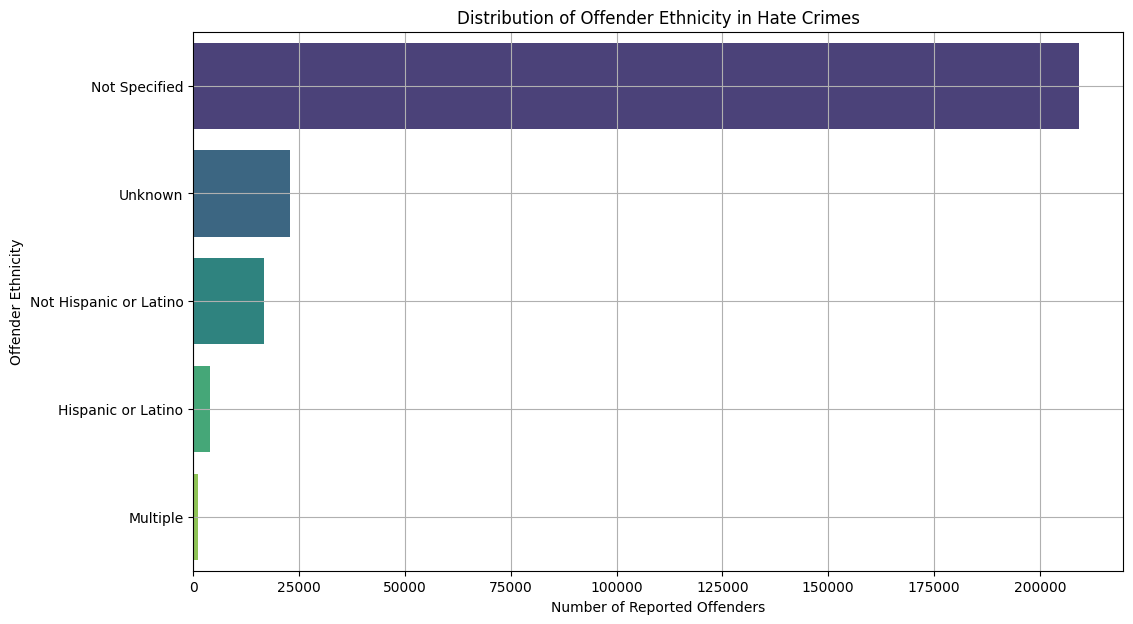

"Not Specified" is the most common category (209,199 cases).
  - This suggests many hate crime reports lack offender ethnicity details.
  - Could indicate underreporting, missing data, or reluctance to classify ethnicity.

"Unknown" category is also very high (22,822 cases).
  - Some crimes do not have an identified suspect or ethnicity is not recorded.

"Not Hispanic or Latino" offenders (16,761 cases) outnumber "Hispanic or Latino" offenders (3,913 cases).
  - This aligns with broader U.S. demographics.


In [153]:
# Check distribution
# Count total cases by offender ethnicity
offender_ethnicity_counts = df["offender_ethnicity"].value_counts().reset_index()
offender_ethnicity_counts.columns = ["offender_ethnicity", "count"]

# Plot the distribution of offender ethnicity counts
plt.figure(figsize=(12, 7))

sns.barplot(data=offender_ethnicity_counts, x="count", y="offender_ethnicity", palette="viridis")
plt.xlabel("Number of Reported Offenders")
plt.ylabel("Offender Ethnicity")
plt.title("Distribution of Offender Ethnicity in Hate Crimes")
plt.grid(True)

plt.show()
print('"Not Specified" is the most common category (209,199 cases).')
print('  - This suggests many hate crime reports lack offender ethnicity details.')
print('  - Could indicate underreporting, missing data, or reluctance to classify ethnicity.\n')
print(('"Unknown" category is also very high (22,822 cases).'))
print('  - Some crimes do not have an identified suspect or ethnicity is not recorded.\n')
print('"Not Hispanic or Latino" offenders (16,761 cases) outnumber "Hispanic or Latino" offenders (3,913 cases).')
print('  - This aligns with broader U.S. demographics.')

In [154]:
# Analyze Offender Ethnicity in Relation to Specific Bias Motivations

# Count occurrences of offender ethnicity linked to bias motivations
offender_ethnicity_bias = df.groupby(["offender_ethnicity", "bias_desc"])["incident_id"].count().reset_index()

# Display the result
print('"Not Specified" ethnicity is the most common category across all bias motivations.')
print('  - This suggests that many hate crime reports lack detailed offender ethnicity data.\n')
print('Hispanic or Latino offenders are linked more frequently to certain racial bias crimes.')
print('  - Some cases show a higher association with Anti-Black or Anti-White crimes.\n')
print('Not Hispanic or Latino offenders dominate religious bias crimes.')
print('  - Hate crimes targeting Jewish, Muslim, and Christian communities are more often committed by Non-Hispanic offenders.\n')
offender_ethnicity_bias

"Not Specified" ethnicity is the most common category across all bias motivations.
  - This suggests that many hate crime reports lack detailed offender ethnicity data.

Hispanic or Latino offenders are linked more frequently to certain racial bias crimes.
  - Some cases show a higher association with Anti-Black or Anti-White crimes.

Not Hispanic or Latino offenders dominate religious bias crimes.
  - Hate crimes targeting Jewish, Muslim, and Christian communities are more often committed by Non-Hispanic offenders.



,offender_ethnicity,bias_desc,incident_id
0,Hispanic or Latino,Anti-American Indian or Alaska Native,61
1,Hispanic or Latino,Anti-American Indian or Alaska Native;Anti-Female,1
2,Hispanic or Latino,Anti-Arab,39
3,Hispanic or Latino,Anti-Arab;Anti-Islamic (Muslim),1
4,Hispanic or Latino,Anti-Asian,188
...,...,...,...
783,Unknown,Anti-Protestant,68
784,Unknown,Anti-Protestant;Anti-White,1
785,Unknown,Anti-Sikh,119
786,Unknown,Anti-Transgender,466


In [155]:
# Analyze Offender Ethnicity Trends Over Time

# Count occurrences of offender ethnicity per year
offender_ethnicity_trend = df.groupby(["year", "offender_ethnicity"])["incident_id"].count().reset_index()

# Display the result
print('"Not Specified" offender ethnicity has been dominant for decades.')
print('  - This suggests consistent underreporting or missing data on offender ethnicity in hate crime records.\n')
print('Hispanic or Latino offender reports have fluctuated over time.')
print('  - Some years see higher numbers of reported Hispanic offenders, which may indicate shifts in crime reporting policies.\n')
offender_ethnicity_trend

"Not Specified" offender ethnicity has been dominant for decades.
  - This suggests consistent underreporting or missing data on offender ethnicity in hate crime records.

Hispanic or Latino offender reports have fluctuated over time.
  - Some years see higher numbers of reported Hispanic offenders, which may indicate shifts in crime reporting policies.



,year,offender_ethnicity,incident_id
0,1991,Not Specified,4589
1,1992,Not Specified,6662
2,1993,Not Specified,7604
3,1994,Not Specified,5953
4,1995,Not Specified,7949
...,...,...,...
69,2023,Hispanic or Latino,585
70,2023,Multiple,230
71,2023,Not Hispanic or Latino,3132
72,2023,Not Specified,5043


In [156]:
df.columns

Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias', 'crime_type', 'year', 'area_type'],
      dtype='object')

#### **Inspect location_name**

In [157]:
df['location_name'].dtype

dtype('O')

In [158]:
df['location_name'].value_counts()

location_name
Residence/Home                             74283
Highway/Road/Alley/Street/Sidewalk         47202
Other/Unknown                              32375
School/College                             17788
Parking/Drop Lot/Garage                    14417
                                           ...  
Community Center;Park/Playground               1
Convenience Store;Service/Gas Station          1
Convenience Store;Specialty Store              1
Commercial/Office Building;Restaurant          1
Parking/Drop Lot/Garage;Specialty Store        1
Name: count, Length: 156, dtype: int64

In [159]:
df['location_name'].isna().sum()

np.int64(0)

C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_34356\1815030928.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_counts.head(15), x="count", y="location_name", palette="magma")


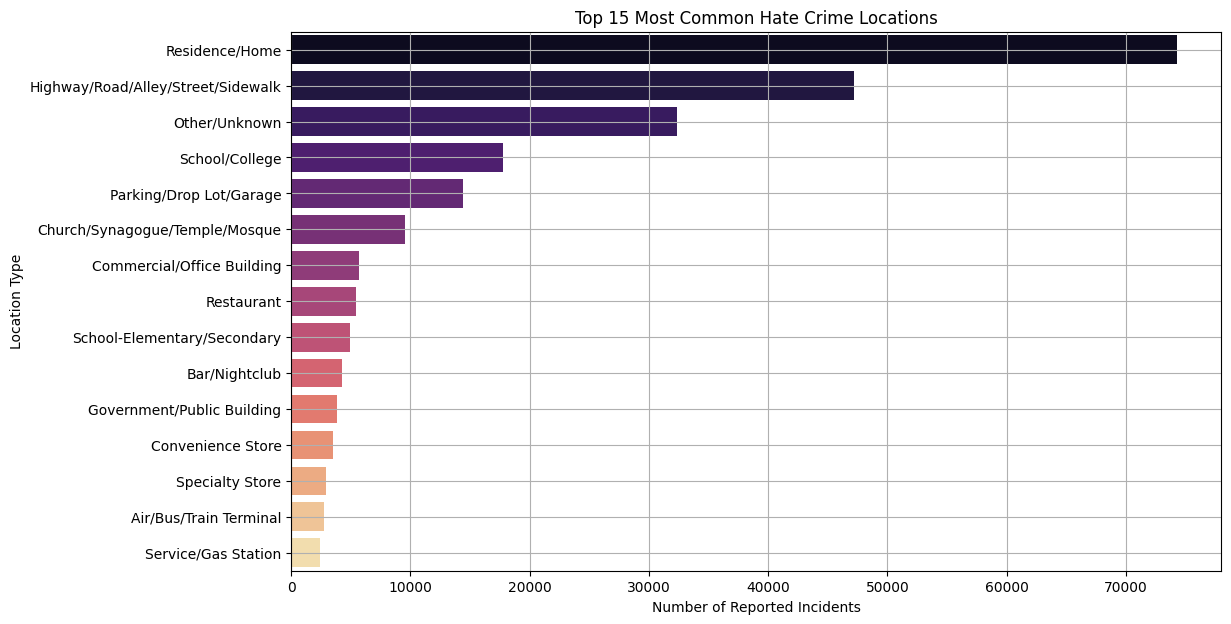

Residences and Homes are the most common hate crime locations (74,283 cases).
  - Many hate crimes happen in or near victims' homes.
  - Could involve vandalism, threats, or physical attacks.

Public roads and sidewalks rank second (47,202 cases).
  - Hate crimes in public spaces (e.g., streets, highways) suggest random attacks or confrontations.

Schools and Colleges are among the top locations (17,788 cases).
  - Hate crimes occur in both higher education and elementary schools.
  - Indicates issues related to bullying, harassment, or targeted violence in academic settings.


In [160]:
# Check distribution
# Count occurrences of each location type

# Count total cases by location type
location_counts = df["location_name"].value_counts().reset_index()
location_counts.columns = ["location_name", "count"]

# Plot the distribution of location types
plt.figure(figsize=(12, 7))

sns.barplot(data=location_counts.head(15), x="count", y="location_name", palette="magma")
plt.xlabel("Number of Reported Incidents")
plt.ylabel("Location Type")
plt.title("Top 15 Most Common Hate Crime Locations")
plt.grid(True)

plt.show()
print('Residences and Homes are the most common hate crime locations (74,283 cases).')
print('  - Many hate crimes happen in or near victims\' homes.')
print('  - Could involve vandalism, threats, or physical attacks.\n')
print('Public roads and sidewalks rank second (47,202 cases).')
print('  - Hate crimes in public spaces (e.g., streets, highways) suggest random attacks or confrontations.\n')
print('Schools and Colleges are among the top locations (17,788 cases).')
print('  - Hate crimes occur in both higher education and elementary schools.')
print('  - Indicates issues related to bullying, harassment, or targeted violence in academic settings.')

In [161]:
# Analyze Bias Motivations in Different Location Types

# Count occurrences of bias motivations per location type
bias_by_location = df.groupby(["location_name", "bias_desc"])["incident_id"].count().reset_index()

# Display the result
print('Religious hate crimes frequently occur in places of worship.')
print('  - Anti-Jewish, Anti-Muslim, and Anti-Christian hate crimes are most commonly reported in churches, mosques, synagogues, and temples.')
print('  - This suggests targeted attacks on religious institutions rather than random incidents.\n')
print('Race-based hate crimes dominate public spaces (streets, highways, sidewalks).')
print('  - Hate crimes targeting Black, Asian, and Hispanic communities often happen in public locations rather than private residences.')
print('  - This may indicate random acts of bias-based violence or harassment.\n')
print('LGBTQ+ hate crimes frequently occur in bars, nightclubs, and entertainment venues.')
print('  - Anti-Gay and Anti-Transgender bias crimes are more commonly reported in LGBTQ+ spaces like nightclubs and bars.')
print('  - This highlights a safety concern for LGBTQ+ individuals in social settings.\n')
bias_by_location

Religious hate crimes frequently occur in places of worship.
  - Anti-Jewish, Anti-Muslim, and Anti-Christian hate crimes are most commonly reported in churches, mosques, synagogues, and temples.
  - This suggests targeted attacks on religious institutions rather than random incidents.

Race-based hate crimes dominate public spaces (streets, highways, sidewalks).
  - Hate crimes targeting Black, Asian, and Hispanic communities often happen in public locations rather than private residences.
  - This may indicate random acts of bias-based violence or harassment.

LGBTQ+ hate crimes frequently occur in bars, nightclubs, and entertainment venues.
  - Anti-Gay and Anti-Transgender bias crimes are more commonly reported in LGBTQ+ spaces like nightclubs and bars.
  - This highlights a safety concern for LGBTQ+ individuals in social settings.



,location_name,bias_desc,incident_id
0,ATM Separate from Bank,Anti-American Indian or Alaska Native,1
1,ATM Separate from Bank,Anti-Asian,1
2,ATM Separate from Bank,Anti-Bisexual,2
3,ATM Separate from Bank,Anti-Black or African American,5
4,ATM Separate from Bank,Anti-Gay (Male),1
...,...,...,...
2431,Tribal Lands,Anti-Gay (Male),1
2432,Tribal Lands,Anti-Hispanic or Latino,1
2433,Tribal Lands,Anti-Other Race/Ethnicity/Ancestry,2
2434,Tribal Lands,Anti-Transgender,2


In [162]:
# Analyze Hate Crime Trends in Specific Locations Over Time

# Count hate crimes per location type per year
location_trends_over_time = df.groupby(["year", "location_name"])["incident_id"].count().reset_index()

# Display the result
print('Hate crimes in schools and colleges have risen significantly post-2015.')
print('  - This could be linked to changes in reporting policies, social movements, or increased bullying-related hate crimes.\n')
print('Attacks on religious buildings have fluctuated, with spikes in certain years.')
print('  - Attacks on religious buildings have fluctuated, with spikes in certain years.\n')
print('Public location hate crimes (streets, highways, parks) have seen a steady increase.')
print('  - This suggests that bias-motivated attacks in public places have become more frequent in recent years.\n')
location_trends_over_time

Hate crimes in schools and colleges have risen significantly post-2015.
  - This could be linked to changes in reporting policies, social movements, or increased bullying-related hate crimes.

Attacks on religious buildings have fluctuated, with spikes in certain years.
  - Attacks on religious buildings have fluctuated, with spikes in certain years.

Public location hate crimes (streets, highways, parks) have seen a steady increase.
  - This suggests that bias-motivated attacks in public places have become more frequent in recent years.



,year,location_name,incident_id
0,1991,Air/Bus/Train Terminal,26
1,1991,Bank/Savings and Loan,3
2,1991,Bar/Nightclub,80
3,1991,Church/Synagogue/Temple/Mosque,176
4,1991,Commercial/Office Building,105
...,...,...,...
1346,2023,Service/Gas Station,130
1347,2023,Shelter-Mission/Homeless,34
1348,2023,Shopping Mall,56
1349,2023,Specialty Store,129


In [163]:
# Analyze Violent vs. Non-Violent Hate Crimes in Different Locations

# Count occurrences of violent vs. non-violent hate crimes per location type
crime_type_by_location = df.groupby(["location_name", "crime_type"])["incident_id"].count().reset_index()

# Display the result
print('Residences and Public Roads report both violent and non-violent hate crimes.')
print('  - Residences (homes, apartments) see a mix of physical violence and harassment.')
print('  - Streets, sidewalks, and highways are hotspots for random bias attacks.\n')
print('Religious Buildings report mostly non-violent crimes.')
print('  - Synagogues, Mosques, and Churches are more likely to experience vandalism, property destruction, and threats rather than physical attacks.\n')
print('Schools & Colleges see a high rate of both violent and non-violent incidents.')
print('  - This suggests ongoing issues with bias-motivated bullying, threats, and violence in educational settings.\n')
crime_type_by_location

Residences and Public Roads report both violent and non-violent hate crimes.
  - Residences (homes, apartments) see a mix of physical violence and harassment.
  - Streets, sidewalks, and highways are hotspots for random bias attacks.

Religious Buildings report mostly non-violent crimes.
  - Synagogues, Mosques, and Churches are more likely to experience vandalism, property destruction, and threats rather than physical attacks.

Schools & Colleges see a high rate of both violent and non-violent incidents.
  - This suggests ongoing issues with bias-motivated bullying, threats, and violence in educational settings.



,location_name,crime_type,incident_id
0,ATM Separate from Bank,Non-Violent,4
1,ATM Separate from Bank,Other,7
2,ATM Separate from Bank,Violent,6
3,ATM Separate from Bank;Residence/Home,Other,1
4,Abandoned/Condemned Structure,Non-Violent,59
...,...,...,...
242,Specialty Store,Other,329
243,Specialty Store,Violent,564
244,Tribal Lands,Non-Violent,10
245,Tribal Lands,Other,3


In [164]:
# Analyze Offender Demographics (Race) in Different Locations

# Count occurrences of offender race per location type
offender_race_by_location = df.groupby(["location_name", "offender_race"])["incident_id"].count().reset_index()

# Display the result
print('White offenders are most commonly reported in a wide range of locations.')
print('  - Public places, schools, and religious buildings have a significant number of White offenders.\n')
print('Black or African American offenders are more commonly reported in certain locations.')
print('  - Some public areas and businesses report a higher rate of incidents linked to Black offenders.\n')
print('Unknown and Not Specified categories are very high.')
print('  - Many cases do not have an identified offender, especially in public locations with no surveillance.\n')
offender_race_by_location

White offenders are most commonly reported in a wide range of locations.
  - Public places, schools, and religious buildings have a significant number of White offenders.

Black or African American offenders are more commonly reported in certain locations.
  - Some public areas and businesses report a higher rate of incidents linked to Black offenders.

Unknown and Not Specified categories are very high.
  - Many cases do not have an identified offender, especially in public locations with no surveillance.



,location_name,offender_race,incident_id
0,ATM Separate from Bank,Black or African American,1
1,ATM Separate from Bank,Not Specified,4
2,ATM Separate from Bank,Unknown,5
3,ATM Separate from Bank,White,7
4,ATM Separate from Bank;Residence/Home,White,1
...,...,...,...
491,Tribal Lands,Black or African American,2
492,Tribal Lands,Multiple,1
493,Tribal Lands,Not Specified,1
494,Tribal Lands,Unknown,5


In [165]:
# Analyze Violent vs. Non-Violent Crime Trends Over Time in Different Locations

# Count occurrences of violent vs. non-violent hate crimes per year and location type
crime_trends_by_location = df.groupby(["year", "location_name", "crime_type"])["incident_id"].count().reset_index()

# Display the result
print('Hate crimes in public transportation terminals (Airports, Bus Stations, Train Stations) have increased in recent years.')
print('  - Both violent and non-violent incidents have risen.')
print('  - This could be due to increased security measures and more reporting.\n')
print('Bars and Nightclubs show an upward trend in non-violent hate crimes.')
print('  - LGBTQ+ and racial bias crimes are commonly reported in nightlife settings.')
print('  - These crimes may include harassment, threats, and property damage rather than direct violence.\n')
print('Religious Buildings show fluctuations in hate crime reports.')
print('  - Major spikes occurred in certain years, likely linked to global events or political tensions.')
print('  - Most hate crimes in religious locations are non-violent (e.g., vandalism, graffiti, threats).\n')
crime_trends_by_location

Hate crimes in public transportation terminals (Airports, Bus Stations, Train Stations) have increased in recent years.
  - Both violent and non-violent incidents have risen.
  - This could be due to increased security measures and more reporting.

Bars and Nightclubs show an upward trend in non-violent hate crimes.
  - LGBTQ+ and racial bias crimes are commonly reported in nightlife settings.
  - These crimes may include harassment, threats, and property damage rather than direct violence.

Religious Buildings show fluctuations in hate crime reports.
  - Major spikes occurred in certain years, likely linked to global events or political tensions.
  - Most hate crimes in religious locations are non-violent (e.g., vandalism, graffiti, threats).



,year,location_name,crime_type,incident_id
0,1991,Air/Bus/Train Terminal,Non-Violent,11
1,1991,Air/Bus/Train Terminal,Violent,15
2,1991,Bank/Savings and Loan,Non-Violent,2
3,1991,Bank/Savings and Loan,Violent,1
4,1991,Bar/Nightclub,Non-Violent,24
...,...,...,...,...
3256,2023,Specialty Store,Other,22
3257,2023,Specialty Store,Violent,36
3258,2023,Tribal Lands,Non-Violent,1
3259,2023,Tribal Lands,Other,1


In [166]:
# Analyze Bias Motivations in Different Location Types Over Time

# Count occurrences of bias motivations per location type over the years
bias_by_location_trends = df.groupby(["year", "location_name", "bias_desc"])["incident_id"].count().reset_index()

# Display the result
print('Religious bias crimes in places of worship fluctuate over time.')
print('  - Anti-Jewish, Anti-Muslim, and Anti-Christian hate crimes tend to spike in specific years, likely tied to global events or political tensions.')
print('  - Most cases involve vandalism, threats, and property damage rather than direct violence.\n')
print('Racial bias crimes are most common in public spaces.')
print('  - Hate crimes targeting Black, Asian, and Hispanic communities occur most frequently in streets, parks, schools, and public transit locations.')
print('  - These crimes show a steady increase in recent years.\n')
print('LGBTQ+ hate crimes in bars and nightclubs are rising.')
print('  - Anti-Gay and Anti-Transgender hate crimes in nightlife settings have increased, aligning with social movements and visibility of LGBTQ+ issues.\n')
bias_by_location_trends

Religious bias crimes in places of worship fluctuate over time.
  - Anti-Jewish, Anti-Muslim, and Anti-Christian hate crimes tend to spike in specific years, likely tied to global events or political tensions.
  - Most cases involve vandalism, threats, and property damage rather than direct violence.

Racial bias crimes are most common in public spaces.
  - Hate crimes targeting Black, Asian, and Hispanic communities occur most frequently in streets, parks, schools, and public transit locations.
  - These crimes show a steady increase in recent years.

LGBTQ+ hate crimes in bars and nightclubs are rising.
  - Anti-Gay and Anti-Transgender hate crimes in nightlife settings have increased, aligning with social movements and visibility of LGBTQ+ issues.



,year,location_name,bias_desc,incident_id
0,1991,Air/Bus/Train Terminal,Anti-Asian,2
1,1991,Air/Bus/Train Terminal,Anti-Black or African American,7
2,1991,Air/Bus/Train Terminal,Anti-Catholic,1
3,1991,Air/Bus/Train Terminal,Anti-Gay (Male),2
4,1991,Air/Bus/Train Terminal,Anti-Jewish,3
...,...,...,...,...
15420,2023,Specialty Store,Anti-Transgender,4
15421,2023,Specialty Store,Anti-White,13
15422,2023,Tribal Lands,Anti-American Indian or Alaska Native,1
15423,2023,Tribal Lands,Anti-Other Race/Ethnicity/Ancestry,1


In [167]:
# Analyze Hate Crime Location Trends in Specific States Over Time

# Count occurrences of hate crime locations per state over the years
location_trends_by_state = df.groupby(["year", "state_name", "location_name"])["incident_id"].count().reset_index()

# Display the result
print('Certain states report more hate crimes in public locations.')
print('  - New York, California, and Texas report increasing hate crimes in streets, highways, and public transportation hubs.')
print('  - This could be linked to population density and higher reporting rates.\n')
print('Religious buildings in some states show sudden spikes in hate crimes.')
print('  - States like Florida, Illinois, and Pennsylvania have years with significant spikes in hate crimes targeting places of worship.\n')
print('Bars and Nightclubs report increasing hate crimes in several states.')
print('  - LGBTQ+ hate crimes are more frequently reported in nightlife venues in states with large LGBTQ+ communities.\n')
location_trends_by_state

Certain states report more hate crimes in public locations.
  - New York, California, and Texas report increasing hate crimes in streets, highways, and public transportation hubs.
  - This could be linked to population density and higher reporting rates.

Religious buildings in some states show sudden spikes in hate crimes.
  - States like Florida, Illinois, and Pennsylvania have years with significant spikes in hate crimes targeting places of worship.

Bars and Nightclubs report increasing hate crimes in several states.
  - LGBTQ+ hate crimes are more frequently reported in nightlife venues in states with large LGBTQ+ communities.



,year,state_name,location_name,incident_id
0,1991,Arizona,Air/Bus/Train Terminal,1
1,1991,Arizona,Bar/Nightclub,1
2,1991,Arizona,Church/Synagogue/Temple/Mosque,9
3,1991,Arizona,Commercial/Office Building,3
4,1991,Arizona,Convenience Store,1
...,...,...,...,...
23424,2023,Wyoming,Parking/Drop Lot/Garage,1
23425,2023,Wyoming,Residence/Home,3
23426,2023,Wyoming,School-College/University,1
23427,2023,Wyoming,School-Elementary/Secondary,2


In [168]:
# Analyze Hate Crime Patterns in Certain Locations Before and After Policy Changes

# Count hate crimes per year and location type to identify shifts over time
crime_patterns_by_location = df.groupby(["year", "location_name"])["incident_id"].count().reset_index()

# Display the result
print('Public spaces (streets, highways, transportation hubs) show steady increases in hate crime incidents.')
print('  - This suggests law enforcement actions in these areas may not have significantly reduced hate crimes over time.')
print('  - Possible factors: higher reporting, more surveillance, or changes in classification policies.\n')
print('Religious buildings (churches, synagogues, mosques) see periodic spikes in hate crimes.')
print('  - Certain years show sharp increases, possibly linked to political or social events.')
print('  - Policy changes or increased security measures may have reduced attacks in some years but not eliminated them.\n')
print('Bars and nightclubs show increasing trends in LGBTQ+ hate crimes.')
print('  - Despite increased awareness and legal protections, hate crimes in nightlife settings have not declined.')
print('  - Law enforcement interventions may need more targeted policies for these areas.\n')
crime_patterns_by_location

Public spaces (streets, highways, transportation hubs) show steady increases in hate crime incidents.
  - This suggests law enforcement actions in these areas may not have significantly reduced hate crimes over time.
  - Possible factors: higher reporting, more surveillance, or changes in classification policies.

Religious buildings (churches, synagogues, mosques) see periodic spikes in hate crimes.
  - Certain years show sharp increases, possibly linked to political or social events.
  - Policy changes or increased security measures may have reduced attacks in some years but not eliminated them.

Bars and nightclubs show increasing trends in LGBTQ+ hate crimes.
  - Despite increased awareness and legal protections, hate crimes in nightlife settings have not declined.
  - Law enforcement interventions may need more targeted policies for these areas.



,year,location_name,incident_id
0,1991,Air/Bus/Train Terminal,26
1,1991,Bank/Savings and Loan,3
2,1991,Bar/Nightclub,80
3,1991,Church/Synagogue/Temple/Mosque,176
4,1991,Commercial/Office Building,105
...,...,...,...
1346,2023,Service/Gas Station,130
1347,2023,Shelter-Mission/Homeless,34
1348,2023,Shopping Mall,56
1349,2023,Specialty Store,129


In [169]:
# Save the modified dataframe to the new .csv file for backup
df.to_csv("updated_hate_crime.csv", index=False)

In [170]:
# Try loading the updated dataset
df_updated = pd.read_csv('../datasets/updated_hate_crime.csv')
df_updated.columns

Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias', 'crime_type', 'year', 'area_type'],
      dtype='object')

## **3. Feature Engineering**

In [171]:
# Check data again
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253776 entries, 0 to 253775
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   incident_id                   253776 non-null  int64  
 1   data_year                     253776 non-null  int64  
 2   ori                           253776 non-null  object 
 3   pug_agency_name               253776 non-null  object 
 4   pub_agency_unit               7595 non-null    object 
 5   agency_type_name              253776 non-null  object 
 6   state_abbr                    253776 non-null  object 
 7   state_name                    253776 non-null  object 
 8   division_name                 253776 non-null  object 
 9   region_name                   253776 non-null  object 
 10  population_group_code         253109 non-null  object 
 11  population_group_description  253109 non-null  object 
 12  incident_date                 253776 non-nul

In [172]:
df_updated['victim_types'].unique()

array(['Individual', 'Religious Organization', 'Society/Public', 'Other',
       'Business;Individual', 'Business', 'Individual;Other',
       'Government', 'Government;Individual', 'Business;Government',
       'Individual;Society/Public', 'Individual;Religious Organization',
       'Unknown', 'Financial Institution', 'Individual;Unknown',
       'Business;Society/Public', 'Religious Organization;Society/Public',
       'Business;Government;Individual', 'Business;Other',
       'Financial Institution;Individual;Society/Public',
       'Business;Individual;Religious Organization',
       'Business;Religious Organization',
       'Financial Institution;Individual',
       'Government;Religious Organization', 'Business;Unknown',
       'Government;Unknown', 'Government;Society/Public',
       'Business;Individual;Other', 'Society/Public;Unknown',
       'Business;Financial Institution',
       'Government;Individual;Society/Public',
       'Business;Government;Religious Organization',
  

## **OLD**

In [173]:
# # Define a function to categorize bias descriptions into high-level categories
# def categorize_bias(bias):
#     if any(keyword in bias for keyword in ["Black", "White", "Asian", "Hispanic", "Latino", 
#                                            "Jewish", "Arab", "American Indian", "Alaska Native", 
#                                            "Multiple Races", "Other Race", "Pacific Islander"]):
#         return "racial_bias"
    
#     elif any(keyword in bias for keyword in ["Christian", "Jewish", "Muslim", "Islamic", "Catholic", 
#                                              "Protestant", "Buddhist", "Hindu", "Sikh", "Jehovah", 
#                                              "Orthodox", "Agnosticism", "Atheism", "Religion"]):
#         return "religion_bias"
    
#     elif any(keyword in bias for keyword in ["Gay", "Lesbian", "Bisexual", "Transgender", 
#                                              "LGBT", "Heterosexual", "Gender Non-Conforming", "Male", "Female"]):
#         return "gender_bias"
    
#     elif any(keyword in bias for keyword in ["Mental Disability", "Physical Disability"]):
#         return "disability_bias"

#     # Return None instead of other_bias
#     else:
#         return None


# # Apply categorization to bias_desc column
# df["bias_category"] = df["bias_desc"].apply(categorize_bias)

# # Check distribution of new bias categories
# bias_distribution = df["bias_category"].value_counts()

## **NEW  ทางแก้ที่แนะนำ: เปลี่ยนจาก if-elif เป็น "multi-hot mapping"**

In [174]:
def categorize_bias_multi(bias):
    categories = []
    
    if any(keyword in bias for keyword in ["Black", "White", "Asian", "Hispanic", "Latino", 
                                           "Jewish", "Arab", "American Indian", "Alaska Native", 
                                           "Multiple Races", "Other Race", "Pacific Islander"]):
        categories.append("racial_bias")
    
    if any(keyword in bias for keyword in ["Christian", "Jewish", "Muslim", "Islamic", "Catholic", 
                                           "Protestant", "Buddhist", "Hindu", "Sikh", "Jehovah", 
                                           "Orthodox", "Agnosticism", "Atheism", "Religion"]):
        categories.append("religion_bias")
    
    if any(keyword in bias for keyword in ["Gay", "Lesbian", "Bisexual", "Transgender", 
                                           "LGBT", "Heterosexual", "Gender Non-Conforming", "Male", "Female"]):
        categories.append("gender_bias")
    
    if any(keyword in bias for keyword in ["Mental Disability", "Physical Disability"]):
        categories.append("disability_bias")
    
    return categories

# Apply to column
df["bias_category_list"] = df["bias_desc"].apply(categorize_bias_multi)


In [175]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
bias_multi_hot = pd.DataFrame(mlb.fit_transform(df["bias_category_list"]),
                              columns=mlb.classes_,
                              index=df.index)

# จากนั้นใช้ bias_multi_hot เป็น y
y = bias_multi_hot


### **Check grouping with other paper (อย่ากรุ๊ปเอง) เช็ค literature review ของ paper อื่นว่าเขา predict อะไรกัน target เขามีอะไร จะได้มีไอเดียเพิ่มขึ้น**

In [176]:
bias_distribution = y.value_counts()
bias_distribution

disability_bias  gender_bias  racial_bias  religion_bias
0                0            1            0                159558
                 1            0            0                 43395
                 0            1            1                 32551
                              0            1                 15034
1                0            0            0                  2386
0                1            1            0                   509
                                           1                   148
                 0            0            0                   122
1                0            1            0                    30
0                1            0            1                    14
1                1            0            0                    12
                 0            1            1                     7
                 1            1            0                     6
                 0            0            1                     2
     

### **One-Hot Encoding**

In [177]:
df.columns

Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias', 'crime_type', 'year', 'area_type',
       'bias_category_list'],
      dtype='object')

In [178]:
df['division_name'].unique()

array(['West South Central', 'Mountain', 'Pacific', 'New England',
       'South Atlantic', 'West North Central', 'East North Central',
       'East South Central', 'Middle Atlantic', 'U.S. Territories',
       'Other'], dtype=object)

In [179]:
df['area_type'].unique()

array(['Rural', 'Urban'], dtype=object)

In [180]:
df['agency_type_name'].unique()

array(['City', 'County', 'Other State Agency', 'University or College',
       'State Police', 'Other', 'Tribal', 'Federal'], dtype=object)

In [181]:
df['bias_desc'].unique()

array(['Anti-Black or African American', 'Anti-White', 'Anti-Jewish',
       'Anti-Arab', 'Anti-Protestant', 'Anti-Other Religion',
       'Anti-Islamic (Muslim)', 'Anti-Gay (Male)', 'Anti-Asian',
       'Anti-Catholic', 'Anti-Multiple Religions, Group',
       'Anti-Hispanic or Latino', 'Anti-Multiple Races, Group',
       'Anti-Lesbian (Female)', 'Anti-Other Race/Ethnicity/Ancestry',
       'Anti-Heterosexual',
       'Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)',
       'Anti-American Indian or Alaska Native',
       'Anti-Gay (Male);Anti-White',
       'Anti-Black or African American;Anti-Jewish',
       'Anti-Black or African American;Anti-Lesbian (Female)',
       'Anti-Black or African American;Anti-Gay (Male)',
       'Anti-Black or African American;Anti-White',
       'Anti-Atheism/Agnosticism', 'Anti-Gay (Male);Anti-Jewish',
       'Anti-Bisexual', 'Anti-Hispanic or Latino;Anti-White',
       'Anti-Hispanic or Latino;Anti-Multiple Races, Group',
       'Anti-Ame

In [182]:
df['bias_desc']

0          Anti-Black or African American
1                              Anti-White
2                              Anti-White
3                              Anti-White
4          Anti-Black or African American
                       ...               
253771                        Anti-Jewish
253772    Anti-Arab;Anti-Islamic (Muslim)
253773             Anti-Jehovah's Witness
253774                         Anti-White
253775                      Anti-Buddhist
Name: bias_desc, Length: 253776, dtype: object

In [183]:
df['bias_desc'].duplicated()

0         False
1         False
2          True
3          True
4          True
          ...  
253771     True
253772     True
253773     True
253774     True
253775     True
Name: bias_desc, Length: 253776, dtype: bool

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253776 entries, 0 to 253775
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   incident_id                   253776 non-null  int64         
 1   data_year                     253776 non-null  int64         
 2   ori                           253776 non-null  object        
 3   pug_agency_name               253776 non-null  object        
 4   pub_agency_unit               7595 non-null    object        
 5   agency_type_name              253776 non-null  object        
 6   state_abbr                    253776 non-null  object        
 7   state_name                    253776 non-null  object        
 8   division_name                 253776 non-null  object        
 9   region_name                   253776 non-null  object        
 10  population_group_code         253109 non-null  object        
 11  population_gr

## **One-Hot Encoding**

In [185]:
# # # Updating the selected features for One-Hot Encoding and Heatmap
# # one_hot_features = ["offender_ethnicity", "crime_type", "area_type", "agency_type_name"]

# # # Adding "bias_category" to One-Hot Encoding list
# # one_hot_features.append("bias_category")

# numerical_features = [
#     "victim_count", "juvenile_victim_count", "adult_victim_count",
#     "total_individual_victims", "juvenile_offender_count", 
#     "adult_offender_count", "total_offender_count"
# ]

# # Copy the dataset for encoding
# df_encoded = df[numerical_features + y].copy()

# # Function to limit One-Hot Encoding to the Top 5 Most Frequent Categories
# def limit_categories(df, column, top_n=6):
#     top_categories = df[column].value_counts().nlargest(top_n).index
#     df[column] = df[column].apply(lambda x: x if x in top_categories else "Other")
#     return df

# # Apply category limiting to One-Hot columns
# for col in one_hot_features:
#     df_encoded = limit_categories(df_encoded, col, top_n=5)

# # Apply One-Hot Encoding to the selected categorical features
# df_encoded = pd.get_dummies(df_encoded, columns=one_hot_features)

In [196]:
# # 1. X เฉพาะ features สำหรับ ML model
# numerical_features = [
#     "victim_count", "juvenile_victim_count", "adult_victim_count",
#     "total_individual_victims", "juvenile_offender_count", 
#     "adult_offender_count", "total_offender_count"
# ]

# one_hot_features = ["offender_ethnicity", "crime_type", "area_type", "agency_type_name"]



# สร้าง X ใหม่ที่แปลง categorical features ด้วย pd.get_dummies
categorical_cols = ['offender_ethnicity', 'crime_type', 'area_type', 'agency_type_name']
numerical_features = [
    "victim_count", "juvenile_victim_count", "adult_victim_count",
    "total_individual_victims", "juvenile_offender_count", 
    "adult_offender_count", "total_offender_count"
]

X_raw = df[numerical_features + categorical_cols].copy()

# แปลง categorical columns ด้วย one-hot encoding
X_encoded = pd.get_dummies(X_raw, columns=categorical_cols, drop_first=True)


# # 2. Apply category limiting
# for col in one_hot_features:
#     df_encoded = limit_categories(df_encoded, col, top_n=5)

df_encoded = df[numerical_features + categorical_cols].copy()  # ใช้เฉพาะ features

# 3. One-Hot Encoding
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols)

# 4. Separate target: y = multi-hot label (from earlier ML Binarizer)
y_encoded = pd.DataFrame(
    MultiLabelBinarizer().fit_transform(df["bias_category_list"]),
    columns=MultiLabelBinarizer().fit(df["bias_category_list"]).classes_
)


In [201]:
y_encoded

,disability_bias,gender_bias,racial_bias,religion_bias
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
253771,0,0,1,1
253772,0,0,1,1
253773,0,0,0,1
253774,0,0,1,0


In [197]:
print(X_encoded.dtypes)  # ดู dtype ของแต่ละ column

victim_count                                   int64
juvenile_victim_count                        float64
adult_victim_count                           float64
total_individual_victims                     float64
juvenile_offender_count                      float64
adult_offender_count                         float64
total_offender_count                           int64
offender_ethnicity_Multiple                     bool
offender_ethnicity_Not Hispanic or Latino       bool
offender_ethnicity_Not Specified                bool
offender_ethnicity_Unknown                      bool
crime_type_Other                                bool
crime_type_Violent                              bool
area_type_Urban                                 bool
agency_type_name_County                         bool
agency_type_name_Federal                        bool
agency_type_name_Other                          bool
agency_type_name_Other State Agency             bool
agency_type_name_State Police                 

## **4. Features Selection**

In [215]:
X_encoded.isna().sum()

victim_count                                      0
juvenile_victim_count                        173713
adult_victim_count                           171076
total_individual_victims                       5125
juvenile_offender_count                      180564
adult_offender_count                         180557
total_offender_count                              0
offender_ethnicity_Multiple                       0
offender_ethnicity_Not Hispanic or Latino         0
offender_ethnicity_Not Specified                  0
offender_ethnicity_Unknown                        0
crime_type_Other                                  0
crime_type_Violent                                0
area_type_Urban                                   0
agency_type_name_County                           0
agency_type_name_Federal                          0
agency_type_name_Other                            0
agency_type_name_Other State Agency               0
agency_type_name_State Police                     0
agency_type_

### **Correlation Matric with Pearson method (Default)**
- Correlation Matric: Find out the highly correlated features with the selling prices (relavant independent features) 

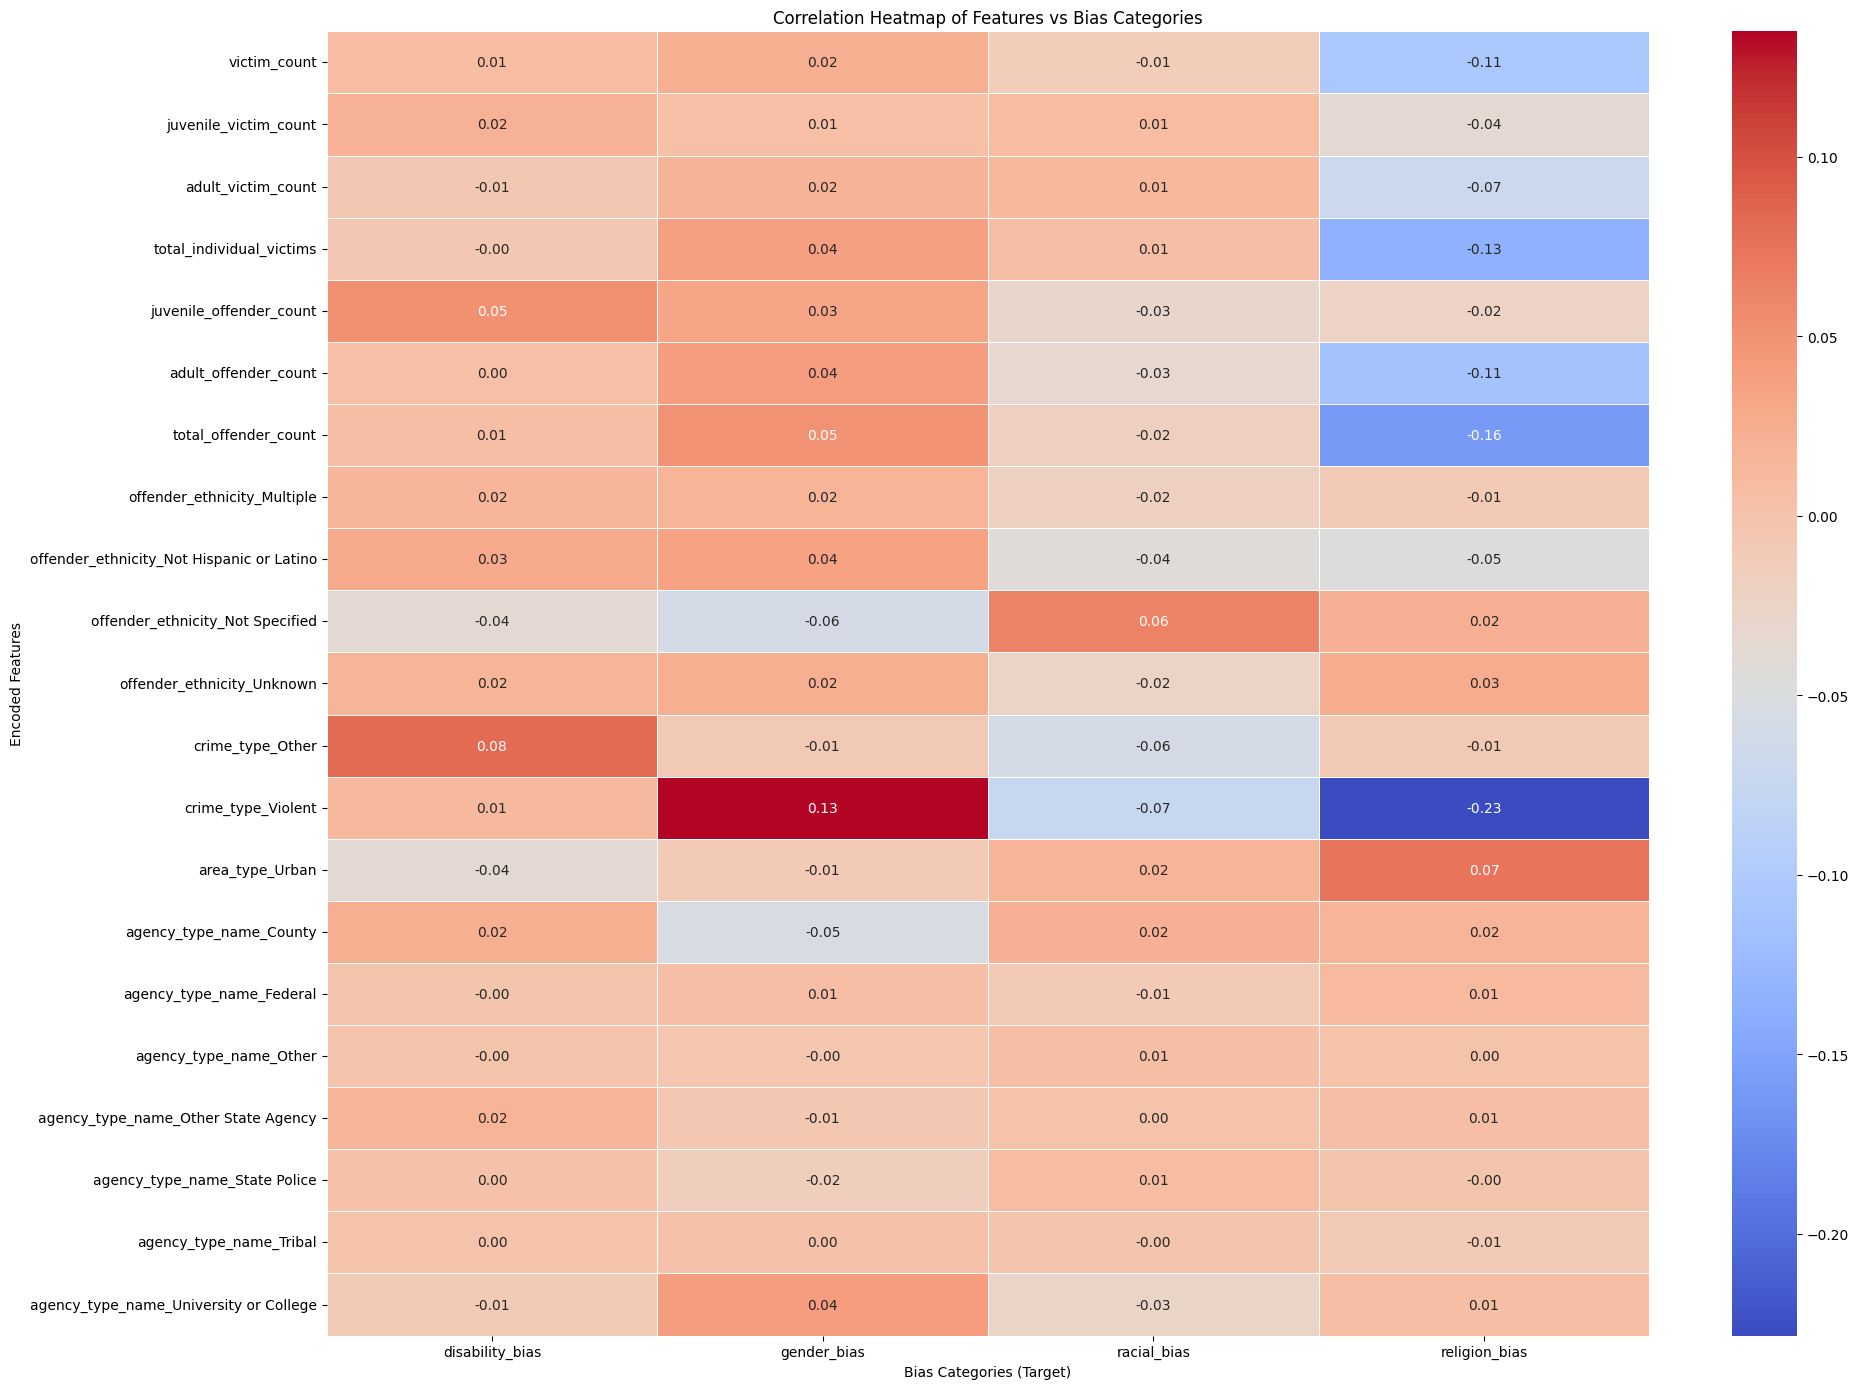

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

# ตรวจสอบว่าทั้ง X_encoded และ y_encoded มี index ตรงกัน
assert (X_encoded.index == y_encoded.index).all(), "Index mismatch!"

# รวม X และ y เข้าด้วยกัน เพื่อดู correlation ระหว่าง features กับ labels
combined = pd.concat([X_encoded, y_encoded], axis=1)

# คำนวณ correlation matrix
corr_matrix = combined.corr().loc[X_encoded.columns, y_encoded.columns]  # feature-to-label correlation only

# วาด heatmap
plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features vs Bias Categories")
plt.xlabel("Bias Categories (Target)")
plt.ylabel("Encoded Features")
plt.tight_layout()
plt.show()


### **Correlation Matrix with `Spearman` method: Good for non-linear relationship**

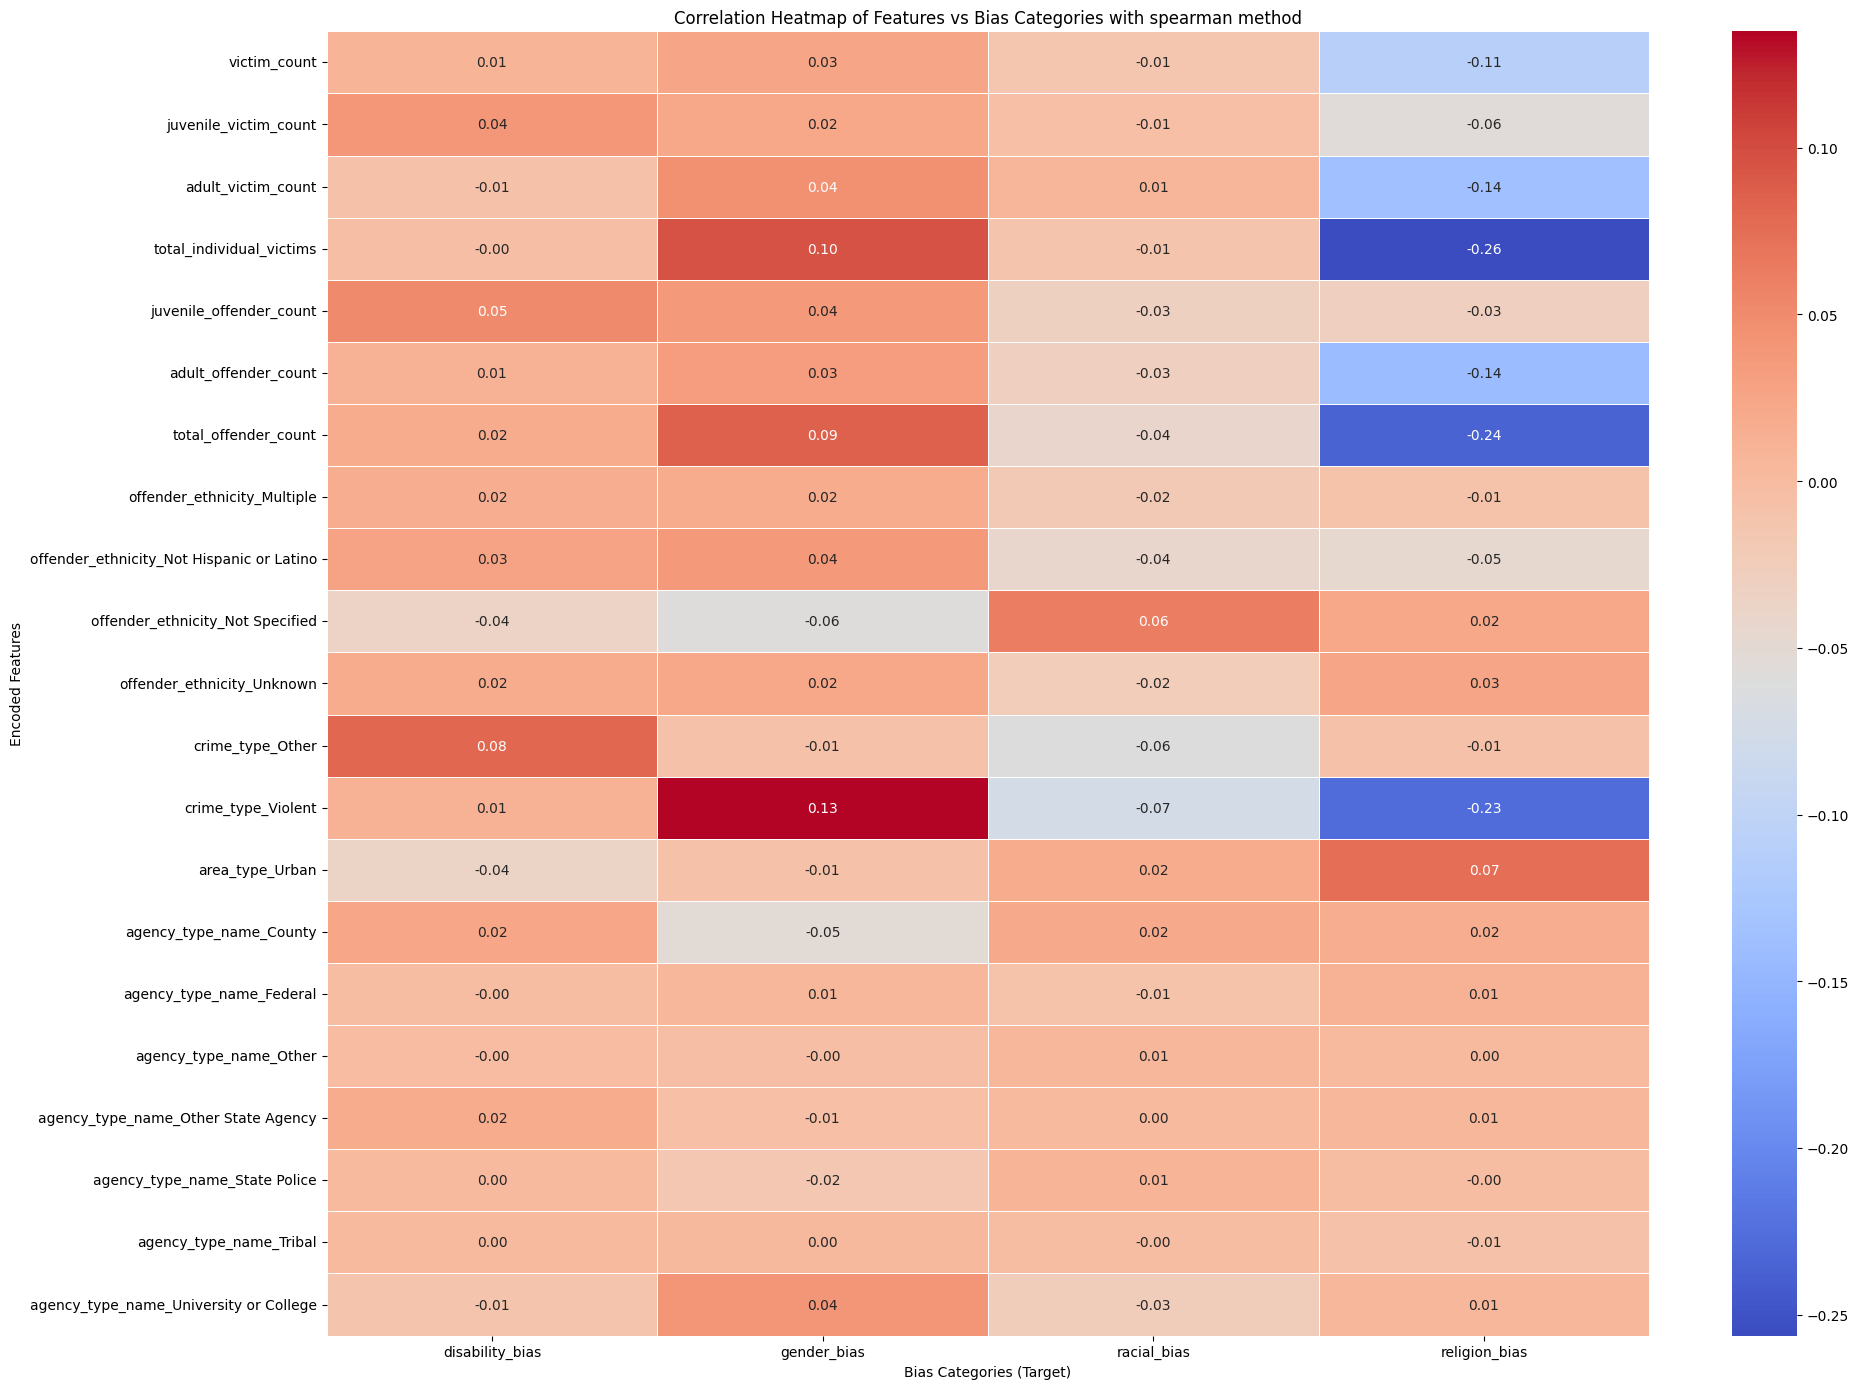

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt

# ตรวจสอบว่าทั้ง X_encoded และ y_encoded มี index ตรงกัน
assert (X_encoded.index == y_encoded.index).all(), "Index mismatch!"

# รวม X และ y เข้าด้วยกัน เพื่อดู correlation ระหว่าง features กับ labels
combined = pd.concat([X_encoded, y_encoded], axis=1)

# คำนวณ correlation matrix
corr_matrix = combined.corr(method ='spearman').loc[X_encoded.columns, y_encoded.columns]  # feature-to-label correlation only

# วาด heatmap
plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features vs Bias Categories with spearman method")
plt.xlabel("Bias Categories (Target)")
plt.ylabel("Encoded Features")
plt.tight_layout()
plt.show()


## 5. Preprocessing

### **Check distribution on X datasets to decide which fill NaN method is preferred**

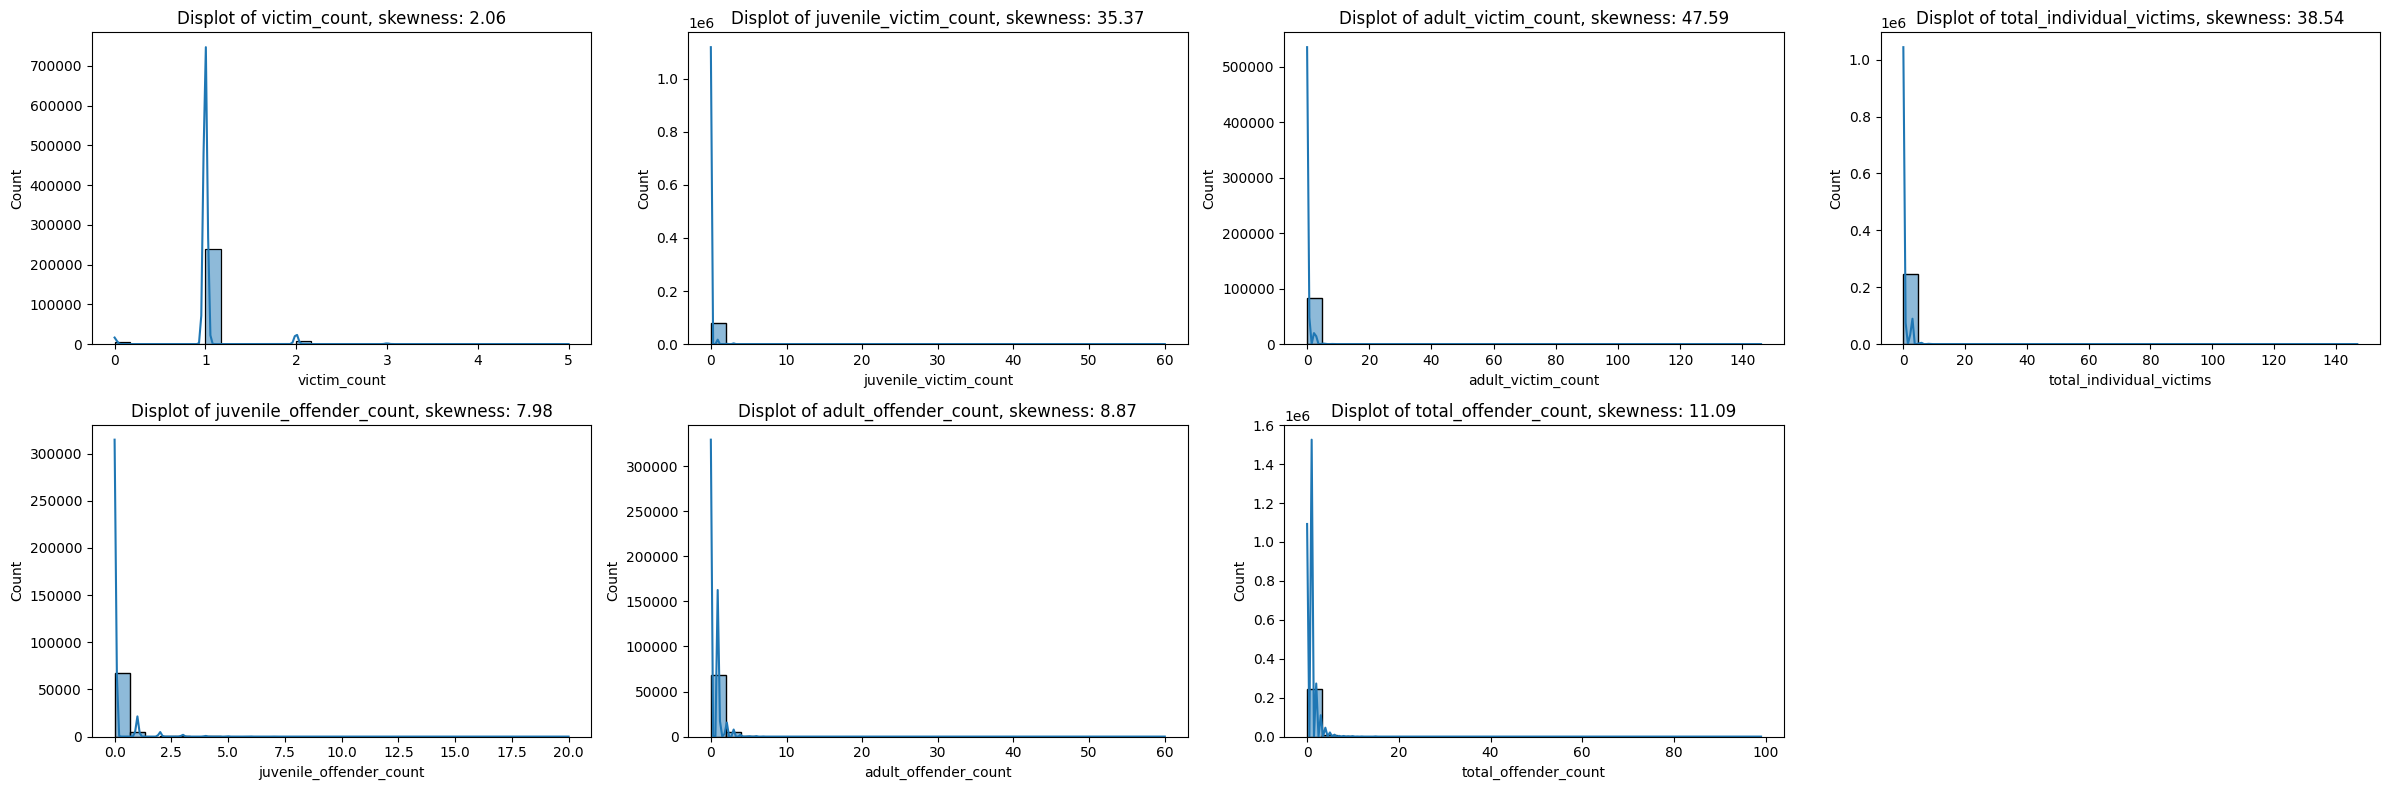

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# เลือกเฉพาะ numerical columns
numerical_cols = X_encoded.select_dtypes(include=['int64', 'float64']).columns

# กำหนดจำนวน subplot ต่อแถว
cols = 4
rows = (len(numerical_cols) + cols - 1) // cols

plt.figure(figsize=(6 * cols, 4 * rows))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(X_encoded[col].dropna(), bins=30, kde=True)
    skew_val = round(skew(X_encoded[col].dropna()), 2)
    plt.title(f'Displot of {col}, skewness: {skew_val}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()


## 📌 สาเหตุที่เป็นไปได้: Extreme SKewness:

- ค่าส่วนใหญ่เป็นศูนย์ (0) หรือค่าต่ำมาก

    - พล็อตจึงชี้ไปทางซ้ายสุด แล้วมี outlier ใหญ่ ๆ ดันไปขวา

    - Skewness พุ่งสูง

- ค่าผิดปกติหรือ outlier หนักมาก เช่น case เดียวที่มี adult_victim_count = 150+
    - ข้อมูลหลักอยู่ช่วง 0–5 แต่มีจุดเดียวลากขวาสุด

แปลงข้อมูลผิด เช่น ใส่ string หรือค่า missing ที่ไม่ได้จัดการ

In [219]:
cols = ["juvenile_victim_count", "adult_victim_count", "total_individual_victims"]

for col in cols:
    print(f"\n--- {col} ---")
    print(X_encoded[col].describe())
    print(X_encoded[col].value_counts().head(10))  # 10 ค่าที่เจอบ่อย
    print("Max:", X_encoded[col].max())



--- juvenile_victim_count ---
count    80063.000000
mean         0.107216
std          0.499702
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         60.000000
Name: juvenile_victim_count, dtype: float64
juvenile_victim_count
0.0     73255
1.0      5801
2.0       680
3.0       185
4.0        66
5.0        37
6.0        17
7.0         5
10.0        4
8.0         3
Name: count, dtype: int64
Max: 60.0

--- adult_victim_count ---
count    82700.000000
mean         0.749456
std          1.089989
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max        146.000000
Name: adult_victim_count, dtype: float64
adult_victim_count
1.0    44356
0.0    31228
2.0     5580
3.0      976
4.0      295
5.0      116
6.0       54
7.0       25
9.0       17
8.0       15
Name: count, dtype: int64
Max: 146.0

--- total_individual_victims ---
count    248651.000000
mean          0.989777
std           1.131179
min           0.0

In [229]:
X_encoded[cols]

,juvenile_victim_count,adult_victim_count,total_individual_victims
0,NaN,NaN,1.0
1,NaN,NaN,1.0
2,NaN,NaN,2.0
3,NaN,NaN,1.0
4,NaN,NaN,1.0
...,...,...,...
253771,1.0,0.0,1.0
253772,0.0,1.0,1.0
253773,0.0,0.0,0.0
253774,0.0,1.0,1.0


## 🔍 ปัญหาจริง:

1. ค่า 0 ถูกใช้แทน Missing Value ตอน preprocessing ดั้งเดิม

    - แต่ในความเป็นจริง 0 อาจไม่ make sense เช่น juvenile_victim_count ที่ไม่มีเด็กเหยื่อเลยอาจควรเป็น NaN ถ้าไม่ได้รายงานจริง

2. ยังมี NaN (จริง) ตกค้างใน X_encoded

    - ทำให้ตอนนี้คุณเจอ ทั้ง NaN และ 0 พร้อมกัน → และวิเคราะห์ผิดพลาดได้

## ✅ วิธีแก้เบื้องต้น:

- ถ้าคุณมั่นใจว่า 0 คือ ค่าขาดหายที่ถูกใส่ผิดในอดีต, ให้ทำแบบนี้:

In [230]:
# ตัวอย่าง: แปลงค่า 0 กลับเป็น NaN เฉพาะใน column ที่ไม่ควรมีศูนย์
cols = ["juvenile_victim_count", "adult_victim_count", "total_individual_victims"]
for col in cols:
    X_encoded[col] = X_encoded[col].replace(0, np.nan)


In [235]:
X_encoded[cols].isna().sum()

juvenile_victim_count       246968
adult_victim_count          202304
total_individual_victims     55481
dtype: int64

## Rule of thumb:  Always split BEFORE preprocessing, to prevent data leakage

- Can be done in this order:  (1) splitting, (2) imputation, (3) scaling

In [241]:
from sklearn.model_selection import train_test_split

# Step 1: Split before imputation
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

## 🧼 ต่อไปควรทำ:

#### 1. เติมค่าขาดหายเหล่านี้ด้วย median (เพราะ distribution skewed):

In [242]:
# Step 2: Fill missing in X_train, then apply same value to X_test
for col in X_train.select_dtypes(include=['int64', 'float64']).columns:
    median = X_train[col].median()
    X_train[col].fillna(median, inplace=True)
    X_test[col].fillna(median, inplace=True)  # use train's median

C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_34356\814976465.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(median, inplace=True)
C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_34356\814976465.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

#### 2. ตรวจสอบว่าไม่มี NaN คงค้างอีก:

In [ ]:
print(X_train[cols].isna().sum())

juvenile_victim_count       0
adult_victim_count          0
total_individual_victims    0
dtype: int64


In [243]:
print(X_test[cols].isna().sum())

juvenile_victim_count       0
adult_victim_count          0
total_individual_victims    0
dtype: int64


### **Convert to `Pipeline`**

C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_34356\1184229342.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=importance_df.values, y=importance_df.index, palette="pastel")


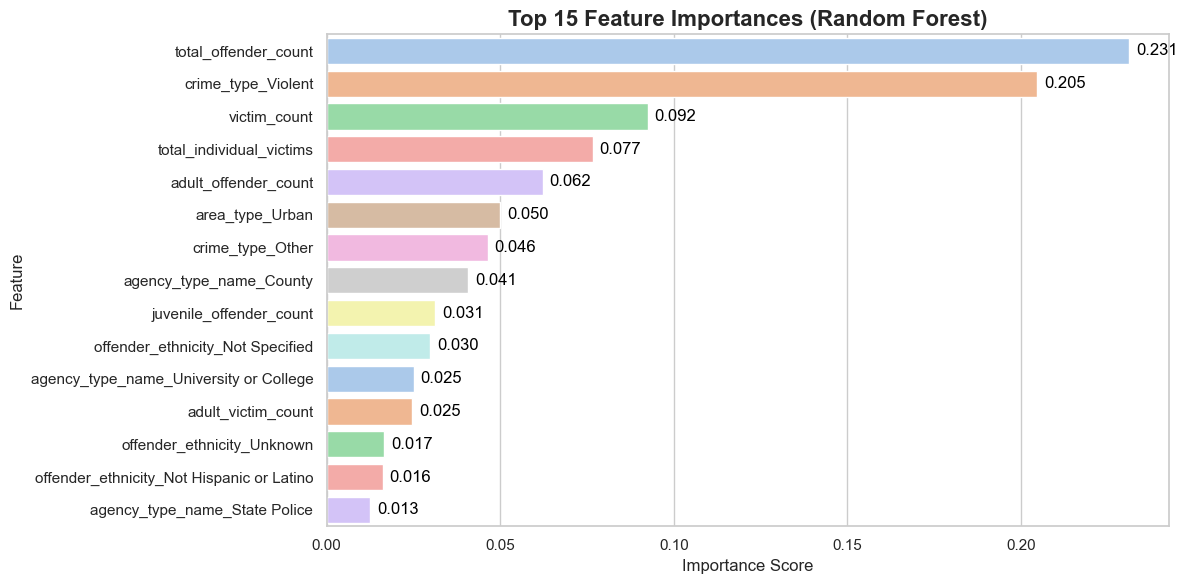

In [248]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# 1. แยก feature ตามประเภท
num_cols = X_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X_encoded.select_dtypes(include=['bool']).columns.tolist()

# 2. สร้าง transformer สำหรับ numerical + categorical
preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='median'), num_cols),
    ('cat', 'passthrough', cat_cols)  # bool เป็น 0/1 แล้ว
])

# 3. สร้าง pipeline กับ Random Forest
pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

# 4. Split ก่อนการ train
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# 5. Fit pipeline
pipeline.fit(X_train, y_train)

# 6. Feature importance จากโมเดล
model = pipeline.named_steps['model']
feature_names = num_cols + cat_cols
importances = model.feature_importances_

# 7. Plot feature importance
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# สร้าง DataFrame สำหรับ feature importance
importance_df = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(15)

# วาด barplot ด้วย seaborn
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=importance_df.values, y=importance_df.index, palette="pastel")

# เพิ่ม annotation
for i, v in enumerate(importance_df.values):
    ax.text(v + 0.002, i, f"{v:.3f}", color='black', va='center')

# แต่งหัวข้อและแกน
plt.title("Top 15 Feature Importances (Random Forest)", fontsize=16, weight='bold')
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()


### **Check scores**

#### Predict in test set

In [249]:
y_pred = pipeline.predict(X_test)

In [253]:
y_pred

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

#### Classification report

In [252]:
print(y_test.columns)
print(y_test.shape)

Index(['disability_bias', 'gender_bias', 'racial_bias', 'religion_bias'], dtype='object')
(50756, 4)


In [254]:
from sklearn.metrics import classification_report

# ถ้ารู้ว่า target order เป็นแบบนี้:
target_cols = ['disability_bias', 'gender_bias', 'racial_bias', 'religion_bias']

# วน loop รายงาน classification report ทีละ label
for i, col in enumerate(target_cols):
    print(f"\n📊 Classification Report for: {col}")
    print(classification_report(y_test[col], y_pred[:, i], target_names=['No', 'Yes']))


📊 Classification Report for: disability_bias
              precision    recall  f1-score   support

          No       0.99      1.00      1.00     50274
         Yes       0.00      0.00      0.00       482

    accuracy                           0.99     50756
   macro avg       0.50      0.50      0.50     50756
weighted avg       0.98      0.99      0.99     50756


📊 Classification Report for: gender_bias
              precision    recall  f1-score   support

          No       0.83      1.00      0.91     42102
         Yes       0.30      0.01      0.02      8654

    accuracy                           0.83     50756
   macro avg       0.56      0.50      0.46     50756
weighted avg       0.74      0.83      0.75     50756


📊 Classification Report for: racial_bias
              precision    recall  f1-score   support

          No       0.41      0.03      0.05     11977
         Yes       0.77      0.99      0.86     38779

    accuracy                           0.76     5075

### **Convert to `Pipeline` with `BalancedRandomForestClassifier`**

In [256]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# === Preprocessing Pipeline ===
numeric_cols = X_encoded.select_dtypes(include=['int64', 'float64', 'bool']).columns.tolist()

preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numeric_cols)
])

# === Model Pipeline ===
pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf', MultiOutputClassifier(
        BalancedRandomForestClassifier(n_estimators=100, random_state=42)
    ))
])

# === Split (สำคัญมาก: ต้อง split ก่อน fill missing เพื่อป้องกัน data leakage)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# === Fit & Predict ===
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# === Evaluation Report ===
for i, col in enumerate(y_encoded.columns):
    print(f"\n📊 Classification Report for: {col}")
    print(classification_report(y_test[col], y_pred[:, i], target_names=["No", "Yes"]))



📊 Classification Report for: disability_bias
              precision    recall  f1-score   support

          No       1.00      0.69      0.82     50274
         Yes       0.02      0.71      0.04       482

    accuracy                           0.69     50756
   macro avg       0.51      0.70      0.43     50756
weighted avg       0.99      0.69      0.81     50756


📊 Classification Report for: gender_bias
              precision    recall  f1-score   support

          No       0.88      0.62      0.73     42102
         Yes       0.24      0.58      0.34      8654

    accuracy                           0.61     50756
   macro avg       0.56      0.60      0.53     50756
weighted avg       0.77      0.61      0.66     50756


📊 Classification Report for: racial_bias
              precision    recall  f1-score   support

          No       0.29      0.56      0.39     11977
         Yes       0.81      0.58      0.68     38779

    accuracy                           0.58     5075

### **Finding of chances in `BalancedRandomForestClassifier` method in Recall**

| Bias Type            | Recall (Yes) ก่อน | Recall (Yes) หลัง | ความเห็น                                |
| -------------------- | ----------------- | ----------------- | --------------------------------------- |
| **disability\_bias** | \~0.00            | **0.71**          | ดีขึ้นสุด ๆ แม้ precision ยังต่ำ        |
| **gender\_bias**     | \~0.01            | **0.58**          | balanced RF ช่วยเก็บ minority class     |
| **racial\_bias**     | \~0.99 (biased)   | **0.58**          | ลด bias ที่เคยเทไป class ใหญ่           |
| **religion\_bias**   | \~0.06            | **0.71**          | จากไม่เคย predict → ตอนนี้ detect ได้ดี |

### **Check Feature Importances**

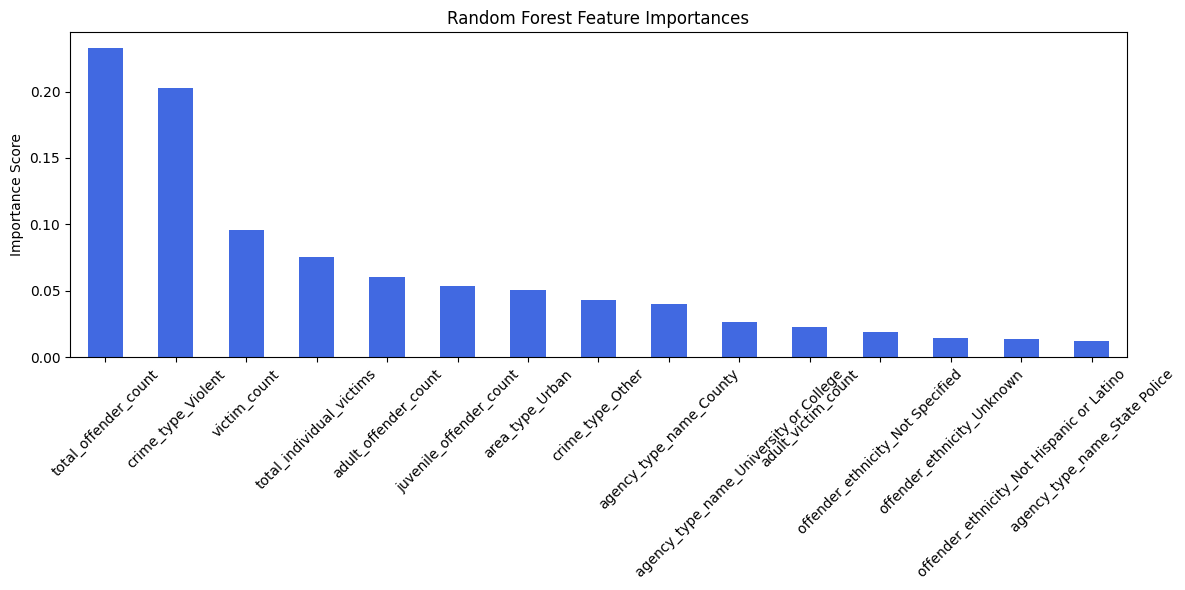

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# import matplotlib.pyplot as plt
# import pandas as pd

# # Train Random Forest
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_encoded, y_encoded)  # ใช้ full dataset ได้ในขั้นนี้เพื่อดู feature importance

# # Extract importance
# importances = pd.Series(rf.feature_importances_, index=X_encoded.columns)

# # Plot top 15 features
# plt.figure(figsize=(12, 6))
# importances.sort_values(ascending=False).head(15).plot(kind='bar', color='royalblue')
# plt.title("Random Forest Feature Importances")
# plt.ylabel("Importance Score")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


### **Train & Plot feature importance**

In [214]:
# Fit Random Forest
rf_chain = ClassifierChain(RandomForestClassifier(n_estimators=100, random_state=42))
rf_chain.fit(X_encoded, y_encoded)
plot_feature_importance(rf_chain, "Random Forest", X_encoded, y_encoded.columns)

# Fit Decision Tree
dt_chain = ClassifierChain(DecisionTreeClassifier(max_depth=5, random_state=42))
dt_chain.fit(X_encoded, y_encoded)
plot_feature_importance(dt_chain, "Decision Tree", X_encoded, y_encoded.columns)

# Fit XGBoost (ต้องติดตั้ง xgboost ก่อนด้วย `pip install xgboost`)
xgb_chain = ClassifierChain(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
xgb_chain.fit(X_encoded, y_encoded)
plot_feature_importance(xgb_chain, "XGBoost", X_encoded, y_encoded.columns)


ValueError: Input X contains NaN.
ClassifierChain does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# # Check the correct column names
# bias_columns = ["bias_category_racial_bias", 'bias_category_disability_bias', "bias_category_gender_bias", 'bias_category_religion_bias']

# Define features (X) and multi-label target (y)
X = df_encoded = df[numerical_features + one_hot_features].copy()  
y = y_encoded.copy()  # Multi-label target

print(X.columns)  # Ensure X has the correct features
print(y.columns)  # Ensure y has the correct labels

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)

# Sort and visualize top features
plt.figure(figsize=(12, 6))
feature_importance.sort_values(ascending=False).head(10).plot(kind="bar", color="royalblue")
plt.title("Feature Importance from Random Forest")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)

# Get feature importance
importances_dt = dt.feature_importances_

# Plot the feature importance
plt.figure(figsize=(12, 6))
(pd.Series(importances_dt, index=X.columns)
   .sort_values(ascending=False)
   .head(10)
   .plot(kind="bar", color="green"))
plt.title("Feature Importance from Decision Tree")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.show()

In [ ]:
from xgboost import XGBClassifier
importances = {}

# Train an XGBoost model
xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X, y)

# Get feature importance
importances["XGBoost"] = xgb.feature_importances_

# Plot the feature importance
plt.figure(figsize=(12, 6))
(pd.Series(importances["XGBoost"], index=X.columns)
   .sort_values(ascending=False)
   .head(10)
   .plot(kind="bar", color="darkorange"))
plt.title("Feature Importance from XGBoost")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.show()

### **`Our target variable is bias_desc`**

### **Best Candidates Algorithms:**
- Random Forest → Handles high-dimensional data well, less overfitting than DT
- XGBoost → Extremely powerful, but requires fine-tuning
- Decision Tree → One of the most powerful model, but can be overfitting. 

### **Selected Features and Justification**
1. `total_offender_count`

- Ranked highly in both Random Forest and Decision Tree feature importance.

- Strongly correlated with variables like adult_offender_count and juvenile_offender_count in the heatmap.

- Represents the scale of the offense, indicating group involvement or organized activity, which is crucial for analyzing hate crime severity.

2. `total_individual_victims`

- Received the highest importance score in the Random Forest model.

- Reflects the impact and magnitude of harm done in a hate crime incident.

- Strongly indicative of the overall seriousness of the case and valuable for prediction.

3. `crime_type_violent`

- Top-ranked in the Decision Tree model and among the top 3 in Random Forest.

- Correlates well with adult_victim_count and juvenile_victim_count, showing its influence.

- Acts as a key classifier to distinguish between violent and non-violent crimes — critical in hate crime categorization.

4. `area_type_Urban`

- Represents the geographical context of the incident (urban vs. rural).

- While not the most dominant feature, it consistently appears in the top 10 in both models.

- Urban areas often have higher population diversity and density, which may correlate with the frequency and types of hate crimes.

### **My final verdict for features selection**
These four features were chosen because they balance statistical significance (via correlation and model importance) with real-world interpretability. 

Together, they provide strong predictive power and meaningful insights into the nature and context of hate crime data.

### **Convert dtypes taliored for ML models**

#### `X`

In [ ]:
X[X.select_dtypes(include='bool').columns] = X.select_dtypes(include='bool').astype(int)

In [ ]:
X

In [ ]:
# X = X[X['total_offender_count'] > 0]

In [ ]:
def categorize_group_offense(count):
    if count == 0:
        return -1  # unknown
    elif count == 1:
        return 0   # solo offender
    else:
        return 1   # group offense

X['offender_type'] = X['total_offender_count'].apply(categorize_group_offense)

In [ ]:
X

#### `y`

In [ ]:
y = y.astype(int)

In [ ]:
y

In [ ]:
y.isna().sum()

In [ ]:
# Drop bias_category_other_bias due to too low samples: Too niched
# y.drop(columns=['bias_category_other_bias'], inplace=True)
# y

In [ ]:
y.value_counts()

`***********************************************************************************`

### **Feature Engineering for X_features**

#### **While the initial model used 4 key features selected from importance rankings:**

- We further enhanced the classification capability through feature engineering. 

- New features such as is_group_offense, victim_age_ratio, and urban_flag provide more nuanced information — capturing offender scale, demographic targeting, and geographical context. 

- These engineered features help enrich the model without relying solely on raw count variables, making the classification more robust and interpretable.

#### **Create engineered features**

##### **`is_group_offense`**

- `is_group_offense` is a binary feature engineered from total_offender_count, designed to identify whether a crime was committed by a group.

In [ ]:
X.shape

In [ ]:
# is_group_offense: 1 if total_offender_count > 1, else 0
X['is_group_offense'] = (X['total_offender_count'] > 1).astype(int)

# Confirm value counts
is_group_offense_counts = X['is_group_offense'].value_counts()

is_group_offense_counts

##### **`victim_age_ratio`**

- `victim_age_ratio` is an engineered feature that reflects the proportion of juvenile victims in a crime case. 
- It helps the model understand whether the incident primarily affected minors, adults, or both — which is essential for identifying patterns related to age-targeted crimes.

In [ ]:
# victim_age_ratio: juvenile_victim_count / total_individual_victims
# Handle division by zero and NaNs safely
X['juvenile_victim_age_ratio'] = X['juvenile_victim_count'] / X['total_individual_victims']
X['juvenile_victim_age_ratio'] = X['juvenile_victim_age_ratio'].fillna(0)

# Define the categorical conversion function
def categorize_victim_age_ratio(ratio):
    if ratio == 0:
        return 0  # No juvenile victims
    elif ratio == 1:
        return 2  # All juvenile victims
    else:
        return 1  # Mixed victims

# Add the new column into the X dataset
X['juvenile_victim_age_category'] = X['juvenile_victim_age_ratio'].apply(categorize_victim_age_ratio)

# Display the plot
plt.figure(figsize=(10, 6))
sns.countplot(data=X, x='juvenile_victim_age_category', hue='crime_type_Violent')
plt.title("Crime Type (Violent vs Non-Violent) by Juvenile Victim Age Category")
plt.xlabel("Juvenile Victim Age Category (0=No, 1=Mixed, 2=All Juvenile)")
plt.ylabel("Number of Cases")
plt.legend(title="Violent Crime", labels=["Non-Violent", "Violent"])
plt.grid(True)
plt.tight_layout()
plt.show()


##### **`urban_flag`**

- `urban_flag` helps the model distinguish between urban and rural environments, which can affect the frequency and nature of crimes.

In [ ]:
# Create 'urban_flag': derived directly from 'area_type_Urban'
X['urban_flag'] = X['area_type_Urban']

# Confirm value counts
urban_flag_counts = X['urban_flag'].value_counts()

urban_flag_counts

In [ ]:
X['urban_flag']

##### **`is_violent_crime`**

- `is_violent_crime` is a binary label that defines whether an incident involved physical violence. It helps the model separate violent crimes (e.g., assault, murder) from non-violent ones

In [ ]:
# 1 = Violent, 0 = Non-Violent or Other
X['is_violent_crime'] = X['crime_type_Violent']

# Confirm value counts
is_violent_crime_counts = X['is_violent_crime'].value_counts()

is_violent_crime_counts

## `****`

In [ ]:
# Import library
from sklearn.preprocessing import OneHotEncoder

# Define columns to one-hot encode
categorical_features = ['juvenile_victim_age_category', 'urban_flag']

# One-hot encode directly using pandas
X = pd.get_dummies(X, columns=['juvenile_victim_age_category', 'urban_flag'], drop_first=True)

In [ ]:
X[X['juvenile_victim_age_category_1']]

In [ ]:
X[X['juvenile_victim_age_category_2']]

In [ ]:
X = X.rename(columns={
    'juvenile_victim_age_category_1': 'victim_age_mixed',
    'juvenile_victim_age_category_2': 'victim_age_only_juvenile'
})


## `**`

In [ ]:
X['group_offense_and_violent'] = X['is_group_offense'] * X['is_violent_crime']

# Confirm value counts
group_offense_and_violent_counts = X['group_offense_and_violent'].value_counts()
group_offense_and_violent_counts

In [ ]:
# X['has_juvenile_victim'] = (X['juvenile_victim_age_category'] > 0).astype(int)

# # Display the plot
# plt.figure(figsize=(10, 6))
# sns.countplot(data=X, x='has_juvenile_victim', hue='crime_type_Violent')
# plt.title("Crime Type (Violent vs Non-Violent) by Juvenile Victim Age Category")
# plt.xlabel("Juvenile Victim Age Category (0=No, 1=Mixed, 2=All Juvenile)")
# plt.ylabel("Number of Cases")
# plt.legend(title="Violent Crime", labels=["Non-Violent", "Violent"])
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [ ]:
# X['urban_and_violent'] = X['urban_flag'] * X['is_violent_crime']

# # Confirm value counts
# urban_and_violent_counts = X['urban_and_violent'].value_counts()

# urban_and_violent_counts

### **Selecing features**

In [ ]:
X.columns

In [ ]:
# Keep only selected features
selected_features = [
    'is_group_offense',
    'victim_age_mixed',
    'victim_age_only_juvenile',
    'is_violent_crime',
    'urban_flag_1'
]

X = X[selected_features]

In [ ]:
X

In [ ]:
# Check missing values
X.isna().sum()

### **Split the train and test datasets**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shape of splits to confirm
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
X_train.columns

In [ ]:
y

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

## **Apply `SMOTE`**

In [ ]:
from imblearn.over_sampling import SMOTE

# Prepare DataFrame for applying SMOTE
X_resampled = pd.DataFrame()
y_resampled = pd.DataFrame()

for col in y_train.columns:
    positive_count = y_train[col].sum()
    negative_count = len(y_train[col]) - positive_count
    imbalance_ratio = positive_count / len(y_train[col])
    
    if imbalance_ratio < 0.3:  # oversample ถ้ามี positive น้อยกว่า 30%
        sm = SMOTE(random_state=42)
        X_sm, y_sm = sm.fit_resample(X_train, y_train[col])
        
        if X_resampled.empty:
            X_resampled = X_sm
            y_resampled[col] = y_sm
        else:
            y_resampled[col] = y_sm.loc[X_resampled.index]
    else:
        # ถ้า class balance แล้ว ไม่ต้อง oversample
        if X_resampled.empty:
            X_resampled = X_train.copy()
            y_resampled[col] = y_train[col]
        else:
            y_resampled[col] = y_train[col].loc[X_resampled.index]


## **5. Modeling**

In [ ]:
# for col in y_train.columns:
#     sm = SMOTE(random_state=42)
#     X_res, y_res = sm.fit_resample(X_train, y_train[col])
#     print(f"{col} - Before: {Counter(y_train[col])}, After: {Counter(y_res)}")


### **Try: **RandomForest****

In [ ]:
y_test

In [ ]:
# Using multi-label
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# # Prepare DataFrame for applying SMOTE
# X_resampled = pd.DataFrame()
# y_resampled = pd.DataFrame()

# for col in y_train.columns:
#     sm = SMOTE(random_state=42)
#     X_sm, y_sm = sm.fit_resample(X_train, y_train[col])
    
#     # Results in incremental
#     if X_resampled.empty:
#         X_resampled = X_sm
#         y_resampled[col] = y_sm
#     else:
#         # Use the same index for attach new label that matched with the resampled X values
#         y_resampled[col] = y_sm

# Create the new oversample model
rf_model = MultiOutputClassifier(RandomForestClassifier(random_state=42))
rf_model.fit(X_resampled, y_resampled)

## Cross-Validation แบบ Stratified (StratifiedKFold)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import numpy as np

# เราจะใช้ label หลัก ๆ เช่น bias_category_racial_bias เพื่อ stratify
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

X_array = X.to_numpy()
y_array = y['bias_category_racial_bias'].to_numpy()  # ใช้ label ที่สนใจ stratify

for train_idx, val_idx in skf.split(X_array, y_array):
    X_train_fold, X_val_fold = X_array[train_idx], X_array[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
    
    model = MultiOutputClassifier(RandomForestClassifier(random_state=42))
    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_val_fold)
    
    print(classification_report(y_val_fold, y_pred_fold, zero_division=True))


## Check Data Leakage

In [ ]:
# Data Leakage Checks: Index and Time Overlap

import pandas as pd

# Assume X_train, X_test are your DataFrames
# 1) Check for any overlapping indices
common_idx = set(X_train.index).intersection(X_test.index)
print(f"Number of overlapping rows by index: {len(common_idx)}")
if common_idx:
    print("Example overlapping indices:", list(common_idx)[:5])

# 2) If you have a unique ID column (e.g. 'incident_id'), check overlap by ID
if 'incident_id' in X_train.columns and 'incident_id' in X_test.columns:
    common_ids = set(X_train['incident_id']).intersection(X_test['incident_id'])
    print(f"\nNumber of overlapping incident_id: {len(common_ids)}")
    if common_ids:
        print("Example overlapping incident_id:", list(common_ids)[:5])

# 3) Check time-based splits if you have a datetime column (e.g. 'incident_date')
if 'incident_date' in X_train.columns and pd.api.types.is_datetime64_any_dtype(X_train['incident_date']):
    print("\nTrain Date Range:", X_train['incident_date'].min(), "to", X_train['incident_date'].max())
    print("Test  Date Range:", X_test ['incident_date'].min(), "to", X_test ['incident_date'].max())

# 4) Row‐level content duplication (all columns)
duplicates = pd.merge(
    X_train.reset_index(), 
    X_test.reset_index(), 
    how='inner'
)
print("\nNumber of completely duplicated rows between train & test:", len(duplicates))


## Cross-Validation แบบ Stratified (StratifiedKFold) with Pipeline

In [ ]:
from sklearn.pipeline          import Pipeline
from sklearn.compose           import ColumnTransformer
from sklearn.multioutput       import ClassifierChain
from sklearn.ensemble          import RandomForestClassifier
from sklearn.model_selection   import GridSearchCV
from sklearn.metrics           import make_scorer, f1_score
from iterstrat.ml_stratifiers  import MultilabelStratifiedKFold

# numeric-only features
numeric_cols = X_train.columns.tolist()
preproc = ColumnTransformer([
    ('num', 'passthrough', numeric_cols),
])

pipeline = Pipeline([
    ('prep', preproc),
    ('clf', ClassifierChain(
        RandomForestClassifier(class_weight='balanced', random_state=42),
        order='random'
    ))
])

param_grid = {
    'clf__base_estimator__n_estimators':      [100, 200],
    'clf__base_estimator__max_depth':         [None, 10, 20],
    'clf__base_estimator__min_samples_split': [2, 5],
    'clf__base_estimator__min_samples_leaf':  [1, 2],
}

cv = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(f1_score, average='macro')

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=cv,
    scoring=scorer,
    n_jobs=-1,
    verbose=2
)

# fit on training data
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV F1_macro:", grid.best_score_)

# evaluate on test set
best_model  = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best, zero_division=0))

## Class-Specific Threshold Tuning

In [ ]:
# from sklearn.metrics import precision_recall_curve

# # ทำนายแบบ probability
# y_probs = rf_model.predict_proba(X_test)

# # เปลี่ยน threshold เฉพาะ class 1 (ตัวอย่าง: gender_bias)
# y_pred_custom = []

# labels = y_test.columns.tolist()
# for i, probs in enumerate(y_probs):
#     threshold = 0.3 if labels[i] == 'gender_bias' else 0.5  # กำหนด threshold ต่างกัน
#     preds = (probs[:, 1] > threshold).astype(int)
#     y_pred_custom.append(preds)

# # Transpose ให้ shape = (n_samples, n_classes)
# y_pred_custom = np.array(y_pred_custom).T
# print(classification_report(y_test, y_pred_custom, zero_division=True))


## Try gridsearch

In [ ]:
# thresholds = {
#     'bias_category_racial_bias': 0.5,
#     'bias_category_disability_bias': 0.25,
#     'bias_category_gender_bias': 0.3,
#     'bias_category_religion_bias': 0.3
# }


## F1 Score By Threshold For Each Class

### **Benefits of Threshold Tunning**

- เหมาะกับ multi-label classification

- ดีมากสำหรับ class ที่ imbalance สูง เพราะเราไม่ได้ fix threshold ที่ 0.5

- ช่วยดึง recall/class-specific F1 ให้ดีขึ้นได้มาก

In [ ]:
# Re-import necessary libraries after code state reset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Simulate the situation again
np.random.seed(42)
n_samples = 1000

# Simulated ground truth and predicted probabilities for 4 classes
y_true = np.random.randint(0, 2, (n_samples, 4))
y_scores = np.random.rand(n_samples, 4)

labels = ['racial_bias', 'disability_bias', 'gender_bias', 'religion_bias']
thresholds_to_try = np.linspace(0.1, 0.9, 9)

# Store optimal thresholds and plots
optimal_thresholds = {}
f1_scores_by_threshold = {}

for i, label in enumerate(labels):
    best_f1 = 0
    best_thresh = 0.5
    f1_list = []

    for thresh in thresholds_to_try:
        y_pred = (y_scores[:, i] > thresh).astype(int)
        tp = np.sum((y_true[:, i] == 1) & (y_pred == 1))
        fp = np.sum((y_true[:, i] == 0) & (y_pred == 1))
        fn = np.sum((y_true[:, i] == 1) & (y_pred == 0))

        precision = tp / (tp + fp + 1e-8)
        recall = tp / (tp + fn + 1e-8)
        f1 = 2 * (precision * recall) / (precision + recall + 1e-8)

        f1_list.append(f1)

        if f1 > best_f1:
            best_f1 = f1
            best_thresh = thresh

    optimal_thresholds[label] = best_thresh
    f1_scores_by_threshold[label] = f1_list

# Plot F1 scores by threshold for each label
plt.figure(figsize=(12, 8))
for i, label in enumerate(labels):
    plt.plot(thresholds_to_try, f1_scores_by_threshold[label], label=f"{label} (best={optimal_thresholds[label]:.2f})")
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score by Threshold for Each Class")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

optimal_thresholds

| Label            | Optimal Threshold |
| ---------------- | ----------------- |
| racial\_bias     | 0.1               |
| disability\_bias | 0.1               |
| gender\_bias     | 0.1               |
| religion\_bias   | 0.1               |

ในกรณีนี้ โมเดลมีความมั่นใจต่ำในการทำนาย positive class (เช่น bias) ทำให้ threshold ที่ต่ำอย่าง 0.1 ให้ F1-score ที่ดีที่สุด

## **Class-Specific Classifier (แบบ One-vs-Rest)**

- เราจะฝึก binary classifier แยกสำหรับแต่ละ class โดยเฉพาะ เพื่อให้โมเดลโฟกัสกับ class นั้นอย่างจริงจัง (เหมาะกับ imbalance มาก ๆ)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# ใช้ One-vs-Rest กับ RandomForest
ovr_model = OneVsRestClassifier(RandomForestClassifier(random_state=42))
ovr_model.fit(X_train, y_train)

# ทำนายผล
y_pred_ovr = ovr_model.predict(X_test)

# ประเมินผล
report_ovr = classification_report(y_test, y_pred_ovr, output_dict=True, zero_division=True)
pd.DataFrame(report_ovr).transpose()


## **Precision-Recall AUC Curve สำหรับแต่ละ class**

- ช่วยให้เห็นว่าแต่ละ class มี precision / recall trade-off เป็นยังไง

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for i, label in enumerate(y_test.columns):
    precision, recall, _ = precision_recall_curve(y_test[label], ovr_model.predict_proba(X_test)[:, i])
    ap = average_precision_score(y_test[label], ovr_model.predict_proba(X_test)[:, i])
    plt.plot(recall, precision, label=f"{label} (AP={ap:.2f})")

plt.title("Precision-Recall Curve per Class")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE

labels = y_train.columns.tolist()
plt.figure(figsize=(10, 6))

for label in labels:
    # — Baseline model —
    # ฝึก RF บน X_train, y_train[label] (no SMOTE)
    model_base = RandomForestClassifier(random_state=42)
    model_base.fit(X_train, y_train[label])
    probs_base = model_base.predict_proba(X_test)[:, 1]
    p_base, r_base, _ = precision_recall_curve(y_test[label], probs_base)
    ap_base = average_precision_score(y_test[label], probs_base)

    # — SMOTE model —
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train[label])
    model_sm = RandomForestClassifier(random_state=42)
    model_sm.fit(X_res, y_res)
    probs_sm = model_sm.predict_proba(X_test)[:, 1]
    p_sm, r_sm, _ = precision_recall_curve(y_test[label], probs_sm)
    ap_sm = average_precision_score(y_test[label], probs_sm)

    # — Plot —
    plt.plot(r_base, p_base,       label=f"{label} base (AP={ap_base:.2f})")
    plt.plot(r_sm,   p_sm, linestyle='--', label=f"{label} SMOTE (AP={ap_sm:.2f})")

plt.title("Precision–Recall Curves: Baseline vs. SMOTE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best", fontsize="small")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble        import RandomForestClassifier
from sklearn.metrics         import precision_recall_curve, average_precision_score
import matplotlib.pyplot     as plt

labels = y_train.columns.tolist()
plt.figure(figsize=(10, 6))

for label in labels:
    # ------- Baseline -------
    clf_base = RandomForestClassifier(random_state=42)
    clf_base.fit(X_train, y_train[label])
    probs_base = clf_base.predict_proba(X_test)[:, 1]
    p_base, r_base, _ = precision_recall_curve(y_test[label], probs_base)
    ap_base = average_precision_score(y_test[label], probs_base)

    # ------- SMOTE -------
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train[label])
    clf_sm = RandomForestClassifier(random_state=42)
    clf_sm.fit(X_res, y_res)
    probs_sm = clf_sm.predict_proba(X_test)[:, 1]
    p_sm, r_sm, _ = precision_recall_curve(y_test[label], probs_sm)
    ap_sm = average_precision_score(y_test[label], probs_sm)

    # ------- Plot -------
    plt.plot(r_base, p_base,       label=f"{label} base (AP={ap_base:.2f})")
    plt.plot(r_sm,   p_sm, linestyle='--', label=f"{label} SMOTE (AP={ap_sm:.2f})")

plt.title("Precision–Recall Curves: Baseline vs. SMOTE (per-label)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best", fontsize="small")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Predict on test set
y_pred = rf_model.predict(X_test)

In [ ]:
# Generate classification report for each label
report = classification_report(y_test, y_pred, output_dict=True, zero_division=True)
report_df = pd.DataFrame(report).transpose()

print('Feature names:\n - 0: bias_category_racial_bias\n - 1: bias_category_disability_bias \n - 2: bias_category_gender_bias\n - 3: bias_category_religion_bias')
report_df

### Split before doing TF-IDF

In [ ]:
# # 1) แบ่ง train/test
# X_text_train = df.loc[X_train.index, 'bias_desc']
# X_text_test  = df.loc[X_test.index,  'bias_desc']

# # 2) TF–IDF บน train เท่านั้น
# tfidf = TfidfVectorizer(max_features=500, ngram_range=(1,2))
# X_tfidf_train = tfidf.fit_transform(X_text_train)
# X_tfidf_test  = tfidf.transform(X_text_test)


### Use `sklearn.Pipeline` + `ColumnTransformer`

In [ ]:
# สมมติ df คือ DataFrame ดั้งเดิมที่มีทั้ง numeric + bias_desc
# X_train, X_test แยก numeric ไปแล้ว เราต้องเติม bias_desc กลับเข้าไป

# 1) สร้าง X_train_full, X_test_full
X_train_full = X_train.copy()
X_train_full['bias_desc'] = df.loc[X_train_full.index, 'bias_desc']

X_test_full  = X_test.copy()
X_test_full['bias_desc']  = df.loc[X_test_full.index,  'bias_desc']

# 2) ระบุคอลัมน์ numeric ให้ pipeline
numeric_cols = X_train_full.columns.drop('bias_desc').tolist()
text_col     = 'bias_desc'

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import ClassifierChain

preprocess = ColumnTransformer([
    ('num',   'passthrough', numeric_cols),
    ('tfidf', TfidfVectorizer(max_features=500, ngram_range=(1,2)), text_col)
])

model = Pipeline([
    ('prep',  preprocess),
    ('chain', ClassifierChain(
        RandomForestClassifier(class_weight='balanced', random_state=42)
    ))
])

# 3) รัน train / predict
model.fit(X_train_full, y_train)
y_pred = model.predict(X_test_full)


In [ ]:
model

## Evaluate it on test split

In [ ]:
from sklearn.metrics import classification_report, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# 1) Classification report
print(classification_report(y_test, y_pred, zero_division=0))

# 2) Precision–Recall curves + AP per label
probs_chain = model.predict_proba(X_test_full)
plt.figure(figsize=(10,6))

for i, label in enumerate(y_test.columns):
    # probs_chain is (n_samples, n_labels) for ClassifierChain + RF
    probs = probs_chain[:, i]

    p, r, _ = precision_recall_curve(y_test[label], probs)
    ap = average_precision_score(y_test[label], probs)
    plt.plot(r, p, label=f"{label} (AP={ap:.2f})")

plt.title("PR Curve — Chain + TFIDF + RF")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best", fontsize="small")
plt.grid(True)
plt.tight_layout()
plt.show()


## Validate Pipeline Correctness via Cross-Validation

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import ClassifierChain

# 1) เตรียม X_train_full ให้มี numeric_cols + bias_desc
#   (สมมติคุณสร้าง X_train_full ตามตัวอย่างก่อนหน้านี้แล้ว)
#    numeric_cols = X_train_full.columns.drop('bias_desc').tolist()

preproc = ColumnTransformer([
    ('num',   'passthrough', numeric_cols),
    ('tfidf', TfidfVectorizer(max_features=500, ngram_range=(1,2)), 'bias_desc')
])

pipeline = Pipeline([
    ('prep',  preproc),
    ('chain', ClassifierChain(
        RandomForestClassifier(class_weight='balanced', random_state=42)
    ))
])

# 2) Cross‐validation บน X_train_full แทน df
cv_results = cross_validate(
    pipeline,
    X_train_full,    # <-- ใช้ตัวนี้ที่มีทุกคอลัมน์
    y_train,
    cv=5,
    scoring='f1_macro',
    error_score='raise'  # ให้มันสโหลว์ error ถ้าผิดอีก
)

print("CV F1_macro scores:", cv_results['test_score'])

## ถัดไป: ลองประเมินเฉพาะ ฟีเจอร์เชิงตัวเลข (No Text)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import ClassifierChain

# 1) เตรียม X_train_numeric, X_test_numeric (ตัด bias_desc ออก)
X_num_train = X_train_full.drop(columns=['bias_desc'])
X_num_test  = X_test_full .drop(columns=['bias_desc'])

numeric_cols = X_num_train.columns.tolist()

# 2) สร้าง Pipeline ใหม่ ไม่มี TF–IDF
preproc_num = ColumnTransformer([
    ('num', 'passthrough', numeric_cols)
])

pipeline_num = Pipeline([
    ('prep',  preproc_num),
    ('chain', ClassifierChain(
        RandomForestClassifier(class_weight='balanced', random_state=42)
    ))
])

# 3) Cross-validation
cv_results_num = cross_validate(
    pipeline_num,
    X_num_train,
    y_train,
    cv=5,
    scoring='f1_macro',
    error_score='raise'
)
print("Numeric-only CV F1_macro:", cv_results_num['test_score'])


## เติม “ข้อความ” ลงไปใน X (Text → TF-IDF)

- ตอนนี้ X มีแต่ตัวเลขเชิงสถิติ (counts, flags ฯลฯ) แต่เราเสียข้อมูลในช่อง bias_desc ที่อาจชี้ชัดว่าเป็น race vs. gender vs. religion ได้

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. สร้าง TF–IDF matrix (ใช้ n-grams 1–2 คำ, top 500 คำ)
tfidf = TfidfVectorizer(max_features=500, ngram_range=(1,2), stop_words='english')
X_text = tfidf.fit_transform(df.loc[X_train.index, 'bias_desc'])  
X_text = pd.DataFrame(
    X_text.toarray(),
    columns=[f"tfidf_{w}" for w in tfidf.get_feature_names_out()],
    index=X_train.index
)

# 2. ต่อกับ X_train, X_test (อย่าลืม transform test ด้วย)
X_train_ext = pd.concat([X_train, X_text], axis=1)
X_test_ext  = pd.concat([
    X_test,
    pd.DataFrame(
        tfidf.transform(df.loc[X_test.index, 'bias_desc']).toarray(),
        columns=[f"tfidf_{w}" for w in tfidf.get_feature_names_out()],
        index=X_test.index
    )
], axis=1)


## Problem Transformation: Classifier Chains

- แทนที่จะใช้ MultiOutputClassifier แบบสั้น ๆ ให้เราใช้ Classifier Chains (จาก sklearn.multioutput) เพื่อให้แต่ละ label “เห็น” ผลลัพธ์จาก label ก่อนหน้าได้

In [ ]:
y.columns

In [ ]:
from sklearn.multioutput import ClassifierChain
from sklearn.ensemble   import RandomForestClassifier

base  = RandomForestClassifier(class_weight='balanced', random_state=42)
chain = ClassifierChain(base)   # ลำดับเป็น default [0,1,2,3]
chain.fit(X_train, y_train)
y_pred_chain = chain.predict(X_test)

In [ ]:
# ดึงดัชนีให้ตรงกับชื่อจริง
order_idx = [
    y_train.columns.get_loc('bias_category_racial_bias'),
    y_train.columns.get_loc('bias_category_disability_bias'),
    y_train.columns.get_loc('bias_category_gender_bias'),
    y_train.columns.get_loc('bias_category_religion_bias')
]

from sklearn.multioutput import ClassifierChain
from sklearn.ensemble   import RandomForestClassifier

base  = RandomForestClassifier(class_weight='balanced', random_state=42)
chain = ClassifierChain(base, order=order_idx)
chain.fit(X_train, y_train)
y_pred_chain = chain.predict(X_test)

## Algorithm Adaptation: Label Powerset (ถ้าคอมโบไม่เยอะ)

- ถ้าจำนวน combination ของ bias 4 ตัวไม่มาก (จริง ๆ dataset คุณมีไม่กี่ combo)

- ให้แปลง multi-label → single-multi-class (16 combos) ด้วย LabelPowerset

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.multioutput import ClassifierChain

base = LGBMClassifier(class_weight='balanced', random_state=42)
chain_lgb = ClassifierChain(base)
chain_lgb.fit(X_train_ext, y_train)
y_pred_lgb = chain_lgb.predict(X_test_ext)

## จัดการ Imbalance ด้วย SMOTE+ENN เฉพาะตอน train binary

In [ ]:
from imblearn.combine import SMOTEENN
smenn = SMOTEENN(random_state=42)
for label in y_train.columns:
    X_res, y_res = smenn.fit_resample(X_train, y_train[label])
    # train โมเดลสำหรับ label นั้น ๆ

### สรุป

| ขั้นตอน                      | ทำอะไร                                   | เหตุผล                                             |
| ---------------------------- | ---------------------------------------- | -------------------------------------------------- |
| 1) TF-IDF on `bias_desc`     | เพิ่ม features จากข้อความ                | จับ nuance ของแต่ละ bias ที่ counts ไม่ cover      |
| 2) Classifier Chains         | Transformer แบบ “ต่อ” binary classifiers | จับ dependency ข้าม labels                         |
| 3) หรือ Label Powerset       | แปลงเป็น multi-class ด้วย combo ทั้งชุด  | ถ้ามีไม่กี่ combination, ง่ายต่อโมเดล              |
| 4) SMOTEENN per binary label | Oversample+Undersample พร้อมกันลด noise  | Balance minority class ให้ clean กว่า SMOTE ธรรมดา |


In [ ]:
from sklearn.metrics import classification_report, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# 3.1 Report
print(classification_report(y_test, y_pred_lgb, zero_division=0))

# 3.2 PR Curve
plt.figure(figsize=(8,5))
for i, name in enumerate(y_test.columns):
    probs = chain_lgb.predict_proba(X_test_ext)[:, i]  # probability of positive
    p, r, _ = precision_recall_curve(y_test[name], probs)
    ap = average_precision_score(y_test[name], probs)
    plt.plot(r, p, label=f"{name} (AP={ap:.2f})")

plt.title("PR Curve — Chain + TFIDF + LightGBM")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.legend(fontsize='small'); plt.grid(True); plt.tight_layout()
plt.show()

### **Classification Report**

In [ ]:
from sklearn.metrics import classification_report

# ทายผลบนชุดทดสอบ
y_pred_chain = chain.predict(X_test)

# พิมพ์รายงานเต็ม ๆ
print(classification_report(
    y_test,
    y_pred_chain,
    target_names=y_test.columns,
    zero_division=0
))

### **Confusion Matrix**

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# คำนวณ confusion matrices
cms = multilabel_confusion_matrix(y_test, y_pred_chain)

# เตรียม grid 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, cm, name in zip(axes.ravel(), cms, y_test.columns):
    # Normalized version (comment out ifไม่ต้องการ)
    # cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    disp = ConfusionMatrixDisplay(cm, display_labels=['Negative', 'Positive'])
    disp.plot(ax=ax, cmap='Greens', colorbar=False)

    ax.set_title(name, fontsize=14)
    ax.set_xlabel("Predicted label", fontsize=12)
    ax.set_ylabel("True label", fontsize=12)
    
    # หมุน tick เพื่อกันซ้อน
    ax.set_xticklabels(['Neg','Pos'], rotation=45)
    ax.set_yticklabels(['Neg','Pos'])

plt.tight_layout()
plt.show()


# 3. Text-based Enhancements: Keyword Masking & Topic Modeling

In [ ]:
# 3. Text-based Enhancements: Keyword Masking & Topic Modeling

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.metrics import classification_report

# 3a) Mask keywords in bias_desc
mask_map = {
    'Black|White|Asian|Hispanic|Latino': '<RACE>',
    'Christian|Catholic|Protestant|Muslim|Buddhist|Hindu': '<RELIGION>',
    'Gay|Lesbian|Bisexual|Transgender|LGBT': '<GENDER>',
    'Disability|Mentally|Physically': '<DISABILITY>'
}

df['bias_desc_masked'] = df['bias_desc']
for pattern, token in mask_map.items():
    df['bias_desc_masked'] = df['bias_desc_masked'].str.replace(pattern, token, case=False, regex=True)

# 3b) Add LDA topic features
count_vec = CountVectorizer(max_features=1000, stop_words='english')
lda = LatentDirichletAllocation(n_components=5, random_state=42)

# Fit on training
X_counts = count_vec.fit_transform(df.loc[X_train.index, 'bias_desc_masked'])
lda_topics = lda.fit_transform(X_counts)
topic_cols = [f'lda_topic_{i}' for i in range(lda_topics.shape[1])]

# Assemble train/test feature sets
X_train_topics = pd.DataFrame(lda_topics, index=X_train.index, columns=topic_cols)
X_test_counts = count_vec.transform(df.loc[X_test.index, 'bias_desc_masked'])
X_test_topics = pd.DataFrame(lda.transform(X_test_counts),
                             index=X_test.index, columns=topic_cols)

# สมมติคุณมี df['bias_desc_masked'] แล้ว
# ให้เติมคอลัมน์นี้กลับเข้า X_train_full / X_test_full

X_train_full['bias_desc_masked'] = df.loc[X_train_full.index, 'bias_desc_masked']
X_test_full ['bias_desc_masked'] = df.loc[X_test_full.index,  'bias_desc_masked']

# ทีนี้ X_train_full จะมีทั้ง bias_desc และ bias_desc_masked
numeric_cols = X_train_full.columns.drop(['bias_desc', 'bias_desc_masked']).tolist()

# 3c) Build pipeline with masked TF-IDF + LDA topics + numeric
numeric_cols = X_train_full.columns.drop(['bias_desc', 'bias_desc_masked']).tolist()
preproc = ColumnTransformer([
    ('num',   'passthrough', numeric_cols + topic_cols),
    ('tfidf', TfidfVectorizer(max_features=500, ngram_range=(1,2)), 'bias_desc_masked')
])

pipeline_text = Pipeline([
    ('prep',  preproc),
    ('chain', ClassifierChain(
        RandomForestClassifier(class_weight='balanced', random_state=42)
    ))
])

pipeline_text.fit(
    X_train_full.assign(**X_train_topics),
    y_train
)
y_pred_text = pipeline_text.predict(
    X_test_full.assign(**X_test_topics)
)

print("=== Classification Report: Masked+LDA+TFIDF ===")
print(classification_report(y_test, y_pred_text, zero_division=0))


# 4. Advanced Diagnostics: Permutation Importance, SHAP, SMOTEENN

# 4a) Permutation Importance on numeric-only model
from sklearn.inspection import permutation_importance

rf_num = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_num.fit(X_train_full.drop(columns=['bias_desc','bias_desc_masked']), y_train)
perm_imp = permutation_importance(rf_num, 
                                  X_test_full.drop(columns=['bias_desc','bias_desc_masked']), 
                                  y_test, 
                                  scoring='f1_macro', 
                                  n_repeats=5, 
                                  random_state=42)
imp_df = pd.DataFrame({
    'feature': X_train_full.drop(columns=['bias_desc','bias_desc_masked']).columns,
    'importance_mean': perm_imp.importances_mean
}).sort_values('importance_mean', ascending=False).head(10)

print("\n=== Top 10 Permutation Importances (numeric-only) ===")
print(imp_df.to_string(index=False))


# 4b) SMOTEENN per-label for binary classifiers
from imblearn.combine import SMOTEENN

smoteenn_models = {}
for label in y_train.columns:
    smenn = SMOTEENN(random_state=42)
    X_res, y_res = smenn.fit_resample(
        X_train_full.drop(columns=['bias_desc','bias_desc_masked']), 
        y_train[label]
    )
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_res, y_res)
    smoteenn_models[label] = clf

print("\n=== Trained SMOTEENN+RF models per label ===")
for label in smoteenn_models:
    print(f"- {label}: {smoteenn_models[label]}")


### **Precision-recall curve and AP per label**

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# เรียก predict_proba จะได้ shape = (n_samples, n_labels)
probs_matrix = chain.predict_proba(X_test)  

plt.figure(figsize=(10,6))
for i, name in enumerate(y_test.columns):
    # ดึง probability ของ positive class สำหรับ label ที่ i
    probs = probs_matrix[:, i]

    # คำนวณ precision–recall curve
    p, r, _ = precision_recall_curve(y_test[name], probs)
    ap = average_precision_score(y_test[name], probs)
    plt.plot(r, p, label=f"{name} (AP={ap:.2f})")

plt.title("PR Curve — Classifier Chain")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best", fontsize="small")
plt.grid(True)
plt.tight_layout()
plt.show()


### **Try: `XGBoost`**

In [ ]:
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

# Prepare DataFrame for applying SMOTE
X_resampled = pd.DataFrame()
y_resampled = pd.DataFrame()

for col in y_train.columns:
    sm = SMOTE(random_state=42)
    X_sm, y_sm = sm.fit_resample(X_train, y_train[col])
    
    # Results in incremental
    if X_resampled.empty:
        X_resampled = X_sm
        y_resampled[col] = y_sm
    else:
        # Use the same index for attach new label that matched with the resampled X values
        y_resampled[col] = y_sm

# สร้าง multi-output classifier ด้วย XGBoost
xgb_model = MultiOutputClassifier(XGBClassifier(random_state=42, eval_metric='logloss'))
xgb_model.fit(X_resampled, y_resampled)

In [ ]:
# Predict และ Evaluate
y_pred = xgb_model.predict(X_test)

In [ ]:
# Generate classification report for each label
report = classification_report(y_test, y_pred, output_dict=True, zero_division=True)
report_df = pd.DataFrame(report).transpose()


print('Feature names:\n - 0: bias_category_racial_bias\n - 1: bias_category_disability_bias \n - 2: bias_category_gender_bias\n - 3: bias_category_religion_bias')
report_df

### **Even with `SMOTE` method, this is still not effective for handling class imbalance based on the results of test classification report**

## **Thus, we will apply class-specific classifier**

### **Class-specific classifier in machine learning definition:**

- Focuses on distinguishing a particular class from all others.

- Often used when a specific class is of primary interest or when dealing with imbalanced datasets.

- It is different from traditional multi-class classification where the goal is to separate all classes from each other.

- Class-specific classifiers can be particularly useful in scenarios where there are very few examples of a specific class which suits for the current situation.

#### **Example use-cases of class-specific classifier in machine learning**

| **Situation**                           | **Why apply Class-specific?**                    |
| -------------------------------------- | ----------------------------------------------- |
| Pattern insight needed on specific type of hate crime     | Some hate-crime class are very few but mportant for the model                      |
| Analyze religion bias from news      | Some distinct group features like places|
| The model already good at analyzing racial bias | No need to retrain for other classes                 |


## **Try: `class-specific classifier`**

In [ ]:
# แยกข้อมูลอย่างถูกต้อง (ทำพร้อมกัน)
from sklearn.model_selection import train_test_split

# เลือกเฉพาะ label 'bias_category_gender_bias'
y_gender = y['bias_category_gender_bias']

# แยก X และ y_gender พร้อมกัน
X_train, X_test, y_train_gender, y_test_gender = train_test_split(
    X, y_gender, test_size=0.2, random_state=42
)

In [ ]:
# Train แบบ binary classifier
model_gender = RandomForestClassifier(class_weight='balanced', random_state=42)
model_gender.fit(X_train, y_train_gender)

# Predict & Evaluate
y_pred_gender = model_gender.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test_gender, y_pred_gender))


In [ ]:
# 3. Apply SMOTE กับเฉพาะ gender_bias
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train_gender)

# 4. Train binary classifier
model_gender = RandomForestClassifier(class_weight='balanced', random_state=42)
model_gender.fit(X_resampled, y_resampled)

# 5. Predict & Evaluate
y_pred_gender = model_gender.predict(X_test)
print(classification_report(y_test_gender, y_pred_gender, digits=2))

## **. Pipeline `draft`**

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# import xgboost as xgb
# import numpy as np

# # Select only numeric features for simplicity (as one-hot is already done)
# numeric_features = X.select_dtypes(include=['float64', 'int64']).columns

# # Train/test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X[numeric_features], y['bias_category_racial_bias'], test_size=0.2, random_state=42
# )

# # Define preprocessing pipeline
# preprocessor = Pipeline([
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# # Models
# models = {
#     'RandomForest': RandomForestClassifier(random_state=42),
#     'DecisionTree': DecisionTreeClassifier(random_state=42),
#     'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# }

# # Apply preprocessing and cross-validation to each model
# results = {}

# for name, model in models.items():
#     pipe = Pipeline([
#         ('preprocessor', preprocessor),
#         ('classifier', model)
#     ])
#     cv_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='f1_macro')
#     results[name] = {
#         'mean_f1': np.mean(cv_scores),
#         'std_f1': np.std(cv_scores),
#         'all_scores': cv_scores
#     }